# Set Up Environment

## Setup Node

In [ ]:
!pwd

/content


In [ ]:
!ls

sample_data


In [ ]:
!rm -r node

rm: cannot remove 'node': No such file or directory


In [ ]:
!git clone https://github.com/jasonjabbour/node.git

Cloning into 'node'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 53 (delta 19), reused 20 (delta 13), pack-reused 22
Unpacking objects: 100% (53/53), done.


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
%cd node

/content/node


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/facebookresearch/qhoptim/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


**Restart Runtime**

In [ ]:
%cd ../content/node
!ls

[Errno 2] No such file or directory: '../content/node'
/content/node
images	lib  LICENSE.md  notebooks  README.md  requirements.txt


In [ ]:
import lib

In [ ]:
%cd ..
!ls

/content
drive  node  sample_data


## Setup Pandas Profile


In [ ]:
!pip install -U --force-reinstall matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached Pillow-9.3.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.1 MB)
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.4.0
    Uninst

**Restart Runtime**

In [ ]:
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


## Import Dependencies

In [177]:
import os
import gc
import pandas as pd
import pickle
import joblib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch, torch.nn as nn
import torch.nn.functional as F
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

Mount Google Drive where Data is Stored

In [178]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [179]:
!cd /content/drive/Shareddrives/Arch-gym/proxy_model/
%cd /content/drive/Shareddrives/Arch-gym/proxy_model/

/content/drive/Shareddrives/Arch-gym/proxy_model


In [180]:
!ls

 captures
 data
 Error_Test_Data_Latency_1000000.html
 Error_Test_Data_Latency_1000000_RefreshPolicy_Removed.html
 logs
 No_Error_Test_Data_Latency_1000000.html
'Proxy Model Data Generation'
 proxy_model_data_subset.csv
 saved_proxy_models
 trail_2.tar.gz


Declare Global Variables

In [181]:
DATASET_FILENAME = 'proxy_model_data_subset.csv'
PROXY_MODEL_DIRECTORY = 'saved_proxy_models'
SEED = 7
ALGORITHMS = ['bo','ga','random','aco']
DEBUG = False

Read Dataset

In [182]:
df = pd.read_csv(DATASET_FILENAME)

In [183]:
df.head()

Reward  Arbiter  MaxActiveTransactions    PagePolicy  \
0  1.424116  Reorder                     21          Open   
1  1.424116  Reorder                     21          Open   
2  1.446927   Simple                    112  OpenAdaptive   
3  1.446927   Simple                    112  OpenAdaptive   
4  1.425862     Fifo                     92  OpenAdaptive   

   RefreshMaxPostponed  RefreshMaxPulledin RefreshPolicy  RequestBufferSize  \
0                    4                   3       AllBank                  6   
1                    4                   3       AllBank                  6   
2                    8                   1     NoRefresh                  4   
3                    8                   1     NoRefresh                  4   
4                    6                   4     NoRefresh                  8   

  RespQueue Scheduler SchedulerBuffer    Energy    Power   Latency Algorithm  
0   Reorder    FrFcfs       ReadWrite  0.085620  1.70219  0.000050        bo  
1   Reorder    FrFcfs       ReadWrite  0.085620  1.70219  0.000050        bo  
2   Reorder      Fifo       ReadWrite  0.085349  1.69112  0.050469        bo  
3   Reorder      Fifo       ReadWrite  0.085349  1.69112  0.050469        bo  
4   Reorder      Fifo       ReadWrite  0.085109  1.70133  0.000050        bo

In [184]:
df.describe(include='all')

Reward  Arbiter  MaxActiveTransactions PagePolicy  \
count   8.485833e+06  8485833           8.485833e+06    8485833   
unique           NaN        3                    NaN          4   
top              NaN  Reorder                    NaN     Closed   
freq             NaN  3370053                    NaN    2597329   
mean    6.041996e+02      NaN           3.958260e+01        NaN   
std     2.059379e+03      NaN           4.439976e+01        NaN   
min     2.626240e-01      NaN           1.000000e+00        NaN   
25%     1.425417e+00      NaN           4.000000e+00        NaN   
50%     2.038217e+00      NaN           1.600000e+01        NaN   
75%     7.615721e+00      NaN           6.400000e+01        NaN   
max     2.009096e+04      NaN           1.280000e+02        NaN   

        RefreshMaxPostponed  RefreshMaxPulledin RefreshPolicy  \
count          8.485833e+06        8.485833e+06       8485833   
unique                  NaN                 NaN             2   
top                     NaN                 NaN     NoRefresh   
freq                    NaN                 NaN       4751861   
mean           4.322036e+00        4.750953e+00           NaN   
std            2.291533e+00        2.468936e+00           NaN   
min            1.000000e+00        1.000000e+00           NaN   
25%            2.000000e+00        3.000000e+00           NaN   
50%            4.000000e+00        4.000000e+00           NaN   
75%            6.000000e+00        7.000000e+00           NaN   
max            8.000000e+00        8.000000e+00           NaN   

        RequestBufferSize RespQueue Scheduler SchedulerBuffer        Energy  \
count        8.485833e+06   8485833   8485833         8485833  8.485833e+06   
unique                NaN         2         3               3           NaN   
top                   NaN   Reorder    FrFcfs          Shared           NaN   
freq                  NaN   4617745   3764438         3211570           NaN   
mean         5.093215e+00       NaN       NaN             NaN  2.232438e-01   
std          2.474934e+00       NaN       NaN             NaN  1.691269e-01   
min          1.000000e+00       NaN       NaN             NaN  8.510925e-02   
25%          3.000000e+00       NaN       NaN             NaN  8.541037e-02   
50%          5.000000e+00       NaN       NaN             NaN  1.063609e-01   
75%          8.000000e+00       NaN       NaN             NaN  4.533424e-01   
max          8.000000e+00       NaN       NaN             NaN  4.691746e-01   

               Power       Latency Algorithm  
count   8.485833e+06  8.485833e+06   8485833  
unique           NaN           NaN         4  
top              NaN           NaN       aco  
freq             NaN           NaN   4695741  
mean    1.369082e+00  7.031242e-02       NaN  
std     3.319431e-01  1.331200e-01       NaN  
min     8.684600e-01  5.002500e-05       NaN  
25%     1.000410e+00  8.938000e-05       NaN  
50%     1.329080e+00  4.686450e-04       NaN  
75%     1.696760e+00  5.169250e-02       NaN  
max     1.703830e+00  4.807725e-01       NaN

In [185]:
df.shape

(8485833, 15)

# Helper Functions

Get Random Sample

In [186]:
def get_random_sample(algo, size, data_to_sample):
  '''Randomly sample and return a dataframe
     with data from a specific algorithm.

     Parameters
      algo: Algorithm name
      size: sample size

     Returns:
      dataframe
  '''
  if algo not in ALGORITHMS:
    raise Exception('Algorithm not valid.')

  # Get rows for this algorithm
  algo_subset_df = data_to_sample.loc[data_to_sample['Algorithm'] == algo]

  # If size is greater than available data,
  # no need to sample just return all the data
  if size > algo_subset_df.shape[0]:
    print(f'Size of {size} is larger than the number of rows {algo_subset_df.shape[0]} for: {algo}.')
    return algo_subset_df
  
  # Return random sample of dataframe for this algorithm
  return algo_subset_df.sample(n=size, random_state=SEED)


# EDA

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8485833 entries, 0 to 8485832
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Reward                 float64
 1   Arbiter                object 
 2   MaxActiveTransactions  int64  
 3   PagePolicy             object 
 4   RefreshMaxPostponed    int64  
 5   RefreshMaxPulledin     int64  
 6   RefreshPolicy          object 
 7   RequestBufferSize      int64  
 8   RespQueue              object 
 9   Scheduler              object 
 10  SchedulerBuffer        object 
 11  Energy                 float64
 12  Power                  float64
 13  Latency                float64
 14  Algorithm              object 
dtypes: float64(4), int64(4), object(7)
memory usage: 971.1+ MB


In [188]:
print(df['Arbiter'].unique())
print(df['PagePolicy'].unique())
print(df['RefreshPolicy'].unique())
print(df['RespQueue'].unique())
print(df['Scheduler'].unique())
print(df['SchedulerBuffer'].unique())
print(df['MaxActiveTransactions'].unique())
print(df['RefreshMaxPostponed'].unique())
print(df['RefreshMaxPulledin'].unique())
print(df['RequestBufferSize'].unique())

['Reorder' 'Simple' 'Fifo']
['Open' 'OpenAdaptive' 'ClosedAdaptive' 'Closed']
['AllBank' 'NoRefresh']
['Reorder' 'Fifo']
['FrFcfs' 'Fifo' 'FrFcfsGrp']
['ReadWrite' 'Bankwise' 'Shared']
[ 21 112  92  77   2  54  25  29 105 128  58 115   1 121 124 123 114  67
 108  76  93  99 107  94  95  88  89  90  86  62  73  96  55  83  80  81
  71  84  69  70  72  82 109 106  91 113  97  87  79 101  78 103 102  51
 100 118  63 110  50 104  60  59  49  14  26  38  85  40  98 117  74 116
  37  56  47  48  75  34  32  61 119  65  30  36  57  44  42  23  64  19
  52  68  66  46  16  41  28  45  33 120  53   7  15  22 122  20  17  43
  39   8  27  10  12  24  18  35 125  13 111   9  11   6   4   3 127 126
  31   5]
[4 8 6 7 2 1 5 3]
[3 1 4 7 6 8 5 2]
[6 4 8 3 1 7 5 2]


Even though, MaxActiveTransactions, RefreshMaxPostponed, RefreshMaxPulledin, RequestBufferSize are integer values, the order still matters. They have inherent ordering. I will keep these variables as numberical variables instead of converting them to categorical variables

In [189]:
# Get column names
col_names_raw = df.columns

In [190]:
# Separate Categorical Variable from Numerical Variabels
categorical_variables = ['Arbiter','PagePolicy','RefreshPolicy', 'RespQueue', 'Scheduler','SchedulerBuffer']
numerical_variables = ['MaxActiveTransactions', 'RefreshMaxPostponed', 'RefreshMaxPulledin', 'RequestBufferSize']

# Clean Data

In [191]:
# Remove Reward
df = df.drop(columns=['Reward'])

In [192]:
# Check for missing values
df.isnull().sum()

Arbiter                  0
MaxActiveTransactions    0
PagePolicy               0
RefreshMaxPostponed      0
RefreshMaxPulledin       0
RefreshPolicy            0
RequestBufferSize        0
RespQueue                0
Scheduler                0
SchedulerBuffer          0
Energy                   0
Power                    0
Latency                  0
Algorithm                0
dtype: int64

no missing values

# Data Engineering and Preparation

Drop Duplicate Rows

In [193]:
print(f'{df.duplicated().sum()} Duplicate Rows out of {df.shape[0]} rows')

7276074 Duplicate Rows out of 8485833 rows


In [194]:
df = df.drop_duplicates(subset=categorical_variables+numerical_variables)

In [195]:
print(f'{df.duplicated().sum()} Duplicate Rows out of {df.shape[0]} rows')

0 Duplicate Rows out of 1075709 rows


Get Samples

In [196]:
data_sample_sizes_per_algorithm = [10000, 50000, 100000, 250000, 1000000,
                                   40000, 132855, 232855, 401125]
algorithms_in_each_sample = [['all'], ['all'], ['all'], ['all'], ['all'],
                             ['aco'], ['aco'], ['aco'], ['aco']]
dataframe_samples = []
algo_breakdown = []
algo_size_breakdown = []
total_size_breakdown = []

# Sample for each sample size
for sample_size, chosen_algos in zip(data_sample_sizes_per_algorithm, algorithms_in_each_sample):
  # Initialize empty dataframe
  sampled_dataframe = pd.DataFrame()

  # Choose algorithms to sample
  algorithms_used = []
  for algo in chosen_algos:
    if algo == 'all':
      algorithms_used = ALGORITHMS
    else:
      algorithms_used.append(algo)

  # Get sample for each algorithm
  for algo in algorithms_used:
    # Sample 
    temp_df = get_random_sample(algo, sample_size, df)
    # Add sample to dataframe
    sampled_dataframe = sampled_dataframe.append([temp_df], ignore_index=True)

    # Keep track of breakdown
    algo_breakdown.append(algo)
    algo_size_breakdown.append(temp_df.shape[0])
  total_size = [sampled_dataframe.shape[0]]*len(algorithms_used)
  total_size_breakdown = total_size_breakdown + total_size

  # New dataset at a specific sample size has been created. Store it.
  dataframe_samples.append(sampled_dataframe)  

# Save breakdown
sample_breakdown_df = pd.DataFrame({'Algo':algo_breakdown, 
                                   'Algo Size':algo_size_breakdown, 
                                   'Total Size':total_size_breakdown})


Size of 50000 is larger than the number of rows 11547 for: bo.
Size of 50000 is larger than the number of rows 21308 for: random.
Size of 100000 is larger than the number of rows 11547 for: bo.
Size of 100000 is larger than the number of rows 21308 for: random.
Size of 250000 is larger than the number of rows 11547 for: bo.
Size of 250000 is larger than the number of rows 118270 for: ga.
Size of 250000 is larger than the number of rows 21308 for: random.
Size of 1000000 is larger than the number of rows 11547 for: bo.
Size of 1000000 is larger than the number of rows 118270 for: ga.
Size of 1000000 is larger than the number of rows 21308 for: random.
Size of 1000000 is larger than the number of rows 924584 for: aco.


Data Samples Breakdown

In [197]:
sample_breakdown_df

Algo  Algo Size  Total Size
0       bo      10000       40000
1       ga      10000       40000
2   random      10000       40000
3      aco      10000       40000
4       bo      11547      132855
5       ga      50000      132855
6   random      21308      132855
7      aco      50000      132855
8       bo      11547      232855
9       ga     100000      232855
10  random      21308      232855
11     aco     100000      232855
12      bo      11547      401125
13      ga     118270      401125
14  random      21308      401125
15     aco     250000      401125
16      bo      11547     1075709
17      ga     118270     1075709
18  random      21308     1075709
19     aco     924584     1075709
20     aco      40000       40000
21     aco     132855      132855
22     aco     232855      232855
23     aco     401125      401125

In [198]:
print('Your dataframe sizes are:')
for i, data in enumerate(dataframe_samples):
  print(f'\t [{i}] -->', data.shape[0])

Your dataframe sizes are:
	 [0] --> 40000
	 [1] --> 132855
	 [2] --> 232855
	 [3] --> 401125
	 [4] --> 1075709
	 [5] --> 40000
	 [6] --> 132855
	 [7] --> 232855
	 [8] --> 401125


In [199]:
dataframe_samples[2].shape

(232855, 14)

Visualize Data using Pandas Profiler

In [200]:
%matplotlib inline

In [201]:
create_profile = False
profile = None
if create_profile:
  profile = ProfileReport(dataframe_samples[0], html={'style':{'full_width':True}})
profile

Global Settings

In [202]:
# Set ONE or NONE to true
NORMALIZE_NUMERICAL_DATA = False
STANDARDIZE_NUMERICAL_DATA = True

In [203]:
# Set ONE to true
ONE_HOT_ENCODE_DATA = False
LABEL_ENCODE_DATA = True

In [204]:
BOX_COX_TRANSFORM = True

Numerical Features for each Sampled Dataframe

In [205]:
numerical_features_samples = []

for dataframe_sample in dataframe_samples:
  # Get Numerical Features and Remove Reward
  numerical_features_samples.append(dataframe_sample[numerical_variables[:4]])

Targets for each Sampled Dataframe

In [206]:
targets_samples = []
target_names = ['Energy', 'Power', 'Latency']

# Get Targets
for dataframe_sample in dataframe_samples:
  targets_samples.append(dataframe_sample[target_names])

Normalize Numerical Data (Range 0-1)

In [207]:
if NORMALIZE_NUMERICAL_DATA:
  temp_numerical_features = []
  for numerical_feature_sample in numerical_features_samples:
    # Normalize Features from 0-1
    normalize_feature_transformer = MinMaxScaler(feature_range=(0,1))
    normalized_numerical_features = normalize_feature_transformer.fit_transform(numerical_feature_sample)
    # Convert to a Dataframe
    normalized_numerical_features = pd.DataFrame(normalized_numerical_features, columns=[numerical_feature_sample.columns])
    # Add normalized features of this dataset to list
    temp_numerical_features.append(normalized_numerical_features)

  # Replace dataset of numerical features with the normalized version
  numerical_features_samples = temp_numerical_features
  print("Normalized Features.")

In [208]:
if NORMALIZE_NUMERICAL_DATA:
  temp_targets = []
  for target_sample in targets_samples:
    # Normalize Targets from 0-1
    normalize_target_transformer = MinMaxScaler(feature_range=(0,1))
    normalized_targets = normalize_target_transformer.fit_transform(target_sample)
    # Convert to a Dataframe
    normalized_targets = pd.DataFrame(normalized_targets, columns=target_names)
    # Add normalized targets of this dataset to list
    temp_targets.append(normalized_targets)

  # Replace dataset of numerical features with the normalized version
  targets_samples = temp_targets
  print("Normalized Targets.")

One Hot Encode Categorical Variables

In [209]:
categorical_variables_samples = []
dummy_variables = None

if ONE_HOT_ENCODE_DATA:
  # Use one hot encoding instead to save memory
  enc = OneHotEncoder(handle_unknown='ignore')
  enc.fit(dataframe_samples[0][categorical_variables]) 
  path = os.path.join(PROXY_MODEL_DIRECTORY, 'onehotencoding.pkl')
  with open(path, 'wb') as output_file:
          pickle.dump(enc, output_file)

  # Get dummy variable column names
  dummy_column_names = pd.get_dummies(dataframe_sample[categorical_variables]).columns

  # One Hot Encode each sample
  for dataframe_sample in dataframe_samples:
    dummy_variables = enc.transform(dataframe_sample[categorical_variables]).toarray()
    dummy_variables = pd.DataFrame(dummy_variables, columns=dummy_column_names)
    categorical_variables_samples.append(dummy_variables)
  print("One Hot Encoded Data")
  
dummy_variables

Label Encode Categorical Variables

In [210]:
categorical_variables_samples = []
label_encoded_variables = None

if LABEL_ENCODE_DATA:

  # One Hot Encode each sample
  for dataframe_sample in dataframe_samples:
    label_encoded_variables_df = pd.DataFrame()
    # Encode each categorical variable separately
    for categorical_variable in categorical_variables:
      # Label Encoder
      enc = LabelEncoder()
      # Fit Label Encoder on Categorical Variable
      enc.fit(dataframe_sample[categorical_variable])
      # Save Label Encoder for Cateogical Variable
      path = os.path.join(PROXY_MODEL_DIRECTORY, categorical_variable + 'label_encoder.pkl')
      with open(path, 'wb') as output_file:
              pickle.dump(enc, output_file)
      # Transform Categorical Variable
      label_encoded_variable = enc.transform(dataframe_sample[categorical_variable])

      # Add transformed column to dataframe
      label_encoded_variables_df[categorical_variable] = label_encoded_variable.tolist()

    # Add label encoded variable dataframe to other sample dataframes
    categorical_variables_samples.append(label_encoded_variables_df)
  print("Label Encoded Data")

label_encoded_variables_df

Label Encoded Data


Arbiter  PagePolicy  RefreshPolicy  RespQueue  Scheduler  \
0             2           1              1          1          0   
1             1           0              0          0          2   
2             2           1              1          1          2   
3             0           2              0          1          0   
4             0           1              0          1          2   
...         ...         ...            ...        ...        ...   
401120        1           3              1          1          2   
401121        2           3              1          1          2   
401122        0           3              1          1          2   
401123        1           1              1          0          1   
401124        2           0              0          0          0   

        SchedulerBuffer  
0                     0  
1                     2  
2                     1  
3                     2  
4                     1  
...                 ...  
401120                1  
401121                0  
401122                1  
401123                0  
401124                2  

[401125 rows x 6 columns]

**Latency** Box-Cox Transformation to make a more even distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibil

Latency Lambda value used for Transformation in 10000 Sample: -0.11928141471529818
Latency Lambda value used for Transformation in 50000 Sample: -0.10093138387270577
Latency Lambda value used for Transformation in 100000 Sample: -0.08580490079708046
Latency Lambda value used for Transformation in 250000 Sample: -0.08756824731385078
Latency Lambda value used for Transformation in 1000000 Sample: -0.09342084285733812
Latency Lambda value used for Transformation in 40000 Sample: -0.09447910580881029
Latency Lambda value used for Transformation in 132855 Sample: -0.09557825125411638
Latency Lambda value used for Transformation in 232855 Sample: -0.0972652273026135
Latency Lambda value used for Transformation in 401125 Sample: -0.09716689388671154


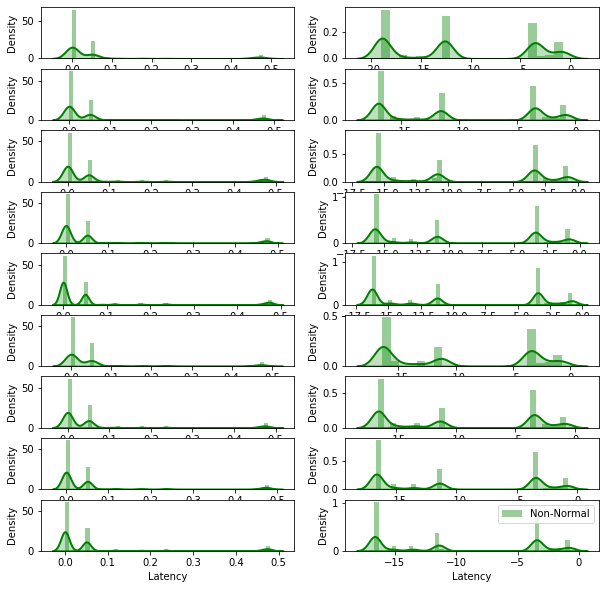

In [211]:
if BOX_COX_TRANSFORM:
  fig, ax = plt.subplots(len(targets_samples), 2)
  latency_lambda_values = []

  # Tranform Target Variable in Each Sample
  for i in range(len(targets_samples)):
    plt_num = (i*2)-1
    # Plot Original Distribution
    sns.distplot(targets_samples[i]['Latency'], hist = True, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2},
                label = "Non-Normal", color ="green", ax = ax[i,0])
    
    # Find Lambda and Transform Data
    fitted_latency_data, fitted_latency_lambda = stats.boxcox(targets_samples[i]['Latency'])
    targets_samples[i]['Latency'] = fitted_latency_data

    # Plot Transformed Distribution
    plt_num = i+1
    sns.distplot(targets_samples[i]['Latency'], hist = True, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2},
                label = "Non-Normal", color ="green", ax = ax[i,1])
    
    latency_lambda_values.append(fitted_latency_lambda)

  for i in range(len(latency_lambda_values)):
    print(f'Latency Lambda value used for Transformation in {data_sample_sizes_per_algorithm[i]} Sample: {latency_lambda_values[i]}')
  
  plt.legend(loc = "upper right")

  # rescaling the subplots
  fig.set_figheight(10)
  fig.set_figwidth(10)

Visualize Data

In [212]:
create_profile = False
profile = None
if create_profile:
  temp1 = targets_samples[0]
  temp2 = numerical_features_samples[0]
  temp3 = categorical_variables_samples[0]
  temp3 = temp3.join(temp2)
  temp3 = temp3.join(temp1)
  profile = ProfileReport(temp3, html={'style':{'full_width':True}})
profile

# Splitting and Standardizing Samples

In [213]:
TRAIN_SPLIT_SIZE = .8

Standardize Training Data (Numerical Features and Targets) 

In [214]:
def standardize_data(X_train, X_test, y_train, y_test,
                     sample_num, algo_in_sample_list): 
  scaler = None
  if STANDARDIZE_NUMERICAL_DATA:
    # Get sample size
    sample_size = str(X_train.shape[0] + X_test.shape[0])

    # Numerical Variables
    scaler_numerical_variables = StandardScaler()
    # Standardize only on the Training Data (predend like you don't know the testing data)
    scaler_numerical_variables.fit(X_train[numerical_variables])
    # Transform both Test and Training Data
    X_train[numerical_variables] = scaler_numerical_variables.transform(X_train[numerical_variables]) 
    X_test[numerical_variables] = scaler_numerical_variables.transform(X_test[numerical_variables]) 
    # Save scale transformer
    path = os.path.join(PROXY_MODEL_DIRECTORY, 'standard_scaler_numerical_variables_' + sample_size + '_' + algo_in_sample_list[0] + '_samples.save')
    joblib.dump(scaler_numerical_variables, path)

    # Targets
    scaler_targets = StandardScaler()
    # Standardize only on the Training Data (predent like you don't know the test data)
    scaler_targets.fit(y_train[target_names])
    # Transform both Test and Training Data
    y_train[target_names] = scaler_targets.transform(y_train[target_names])
    y_test[target_names] = scaler_targets.transform(y_test[target_names])
    # Save scale transformer
    path = os.path.join(PROXY_MODEL_DIRECTORY, 'standard_scaler_targets_' + sample_size + '_' + algo_in_sample_list[0] + '_samples.save')
    joblib.dump(scaler_targets, path)
    print(f'Numerical Data and Targets Standardized for {sample_size} Sample Dataframe')

    return X_train, X_test, y_train, y_test

Split and Store the Train Test Split for Each Sample Size

In [215]:
X_train_samples = []
X_test_samples = []
y_train_samples = []
y_test_samples = []

# Train Test Split
for sample_num in range(len(targets_samples)):
  # Targets of the smallest sample sized dataframe
  y = targets_samples[sample_num]
  # Numerical and Categorical Encoded Features
  current_numerical_features_sample = numerical_features_samples[sample_num]
  current_categorical_variables_sample = categorical_variables_samples[sample_num]
  X = current_numerical_features_sample.join(current_categorical_variables_sample)
  # Split to training and test set for this sample
  X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=TRAIN_SPLIT_SIZE, random_state=SEED)

  #Standardize the Train and Test Data if needed
  X_train, X_test, y_train, y_test = standardize_data(X_train, X_test, y_train, y_test,
                                                      sample_num, algorithms_in_each_sample[sample_num])
  
  # Save
  X_train_samples.append(X_train)
  X_test_samples.append(X_test)
  y_train_samples.append(y_train)
  y_test_samples.append(y_test)

Numerical Data and Targets Standardized for 40000 Sample Dataframe
Numerical Data and Targets Standardized for 132855 Sample Dataframe
Numerical Data and Targets Standardized for 232855 Sample Dataframe
Numerical Data and Targets Standardized for 401125 Sample Dataframe
Numerical Data and Targets Standardized for 1075709 Sample Dataframe
Numerical Data and Targets Standardized for 40000 Sample Dataframe
Numerical Data and Targets Standardized for 132855 Sample Dataframe
Numerical Data and Targets Standardized for 232855 Sample Dataframe
Numerical Data and Targets Standardized for 401125 Sample Dataframe


In [216]:
# Reset Index of Test Set
y_test_reset_index_samples = []
for y_test in y_test_samples:
   y_test_reset_index_samples.append(y_test.reset_index(drop=True))

### Debugging

In [41]:
create_profile = False
profile = None
if create_profile:
  temp = X_train.join(y_train)
  profile = ProfileReport(temp, html={'style':{'full_width':True}})
profile

In [42]:
create_profile = False
profile = None
if create_profile:
  temp = X_test.join(y_test)
  profile = ProfileReport(temp, html={'style':{'full_width':True}})
profile

In [43]:
if DEBUG:
  fig = plt.figure(figsize=(6,6))
  ax = Axes3D(fig, auto_add_to_figure=False)
  fig.add_axes(ax)

  cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())


  sc = ax.scatter(X_train_samples[0]['PagePolicy'], X_train_samples[0]['RefreshPolicy'],
                  y_train_samples[0]['Latency'], s=40, marker='o',
                  cmap=cmap, alpha=.01, c='green')

  sc = ax.scatter(X_test_samples[0]['PagePolicy'], X_test_samples[0]['RefreshPolicy'],
                  y_test_samples[0]['Latency'], s=40, marker='x',
                  cmap=cmap, alpha=.01, c='red')

  ax.set_xlabel('PagePolicy')
  ax.set_ylabel('RefreshPolicy')
  ax.set_zlabel('Latency')
  plt.show()

In [44]:
if DEBUG:
  for i in range(4):
    d = X_train_samples[i].duplicated().sum()
    total = X_train_samples[i].shape[0]
    print(f'{d} Duplicate Rows out of {total} rows')

# Single Model Building


## Building a model from a small number of samples

### Linear Regression Model

In [ ]:
# Choose Sample Size Index
sample_size = 0 #(the smallest sample size)

In [ ]:
# Train Baseline Linear Regression Model
linear = LinearRegression()
linear.fit(X_train_samples[sample_size], y_train_samples[sample_size])

y_train_pred_linear = linear.predict(X_train_samples[sample_size])
y_test_pred_linear = linear.predict(X_test_samples[sample_size])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
# Score Linear Regression Model
print(f'Mean Squared Error for Train: {round(mse(y_train_samples[sample_size], y_train_pred_linear),5)}')
print(f'Mean Squared Error for Test: {round(mse(y_test_samples[sample_size], y_test_pred_linear),5)}')

Mean Squared Error for Train: 0.39774
Mean Squared Error for Test: 0.38653


In [ ]:
sns.displot(y_test_samples[sample_size] - y_test_pred_linear)

Visualize Linear Regression Results

In [ ]:
# Make Predictions into a Dataframe
y_test_pred_linear_df = pd.DataFrame(y_test_pred_linear, columns=['Energy Predicted', 'Power Predicted', 'Latency Predicted'])

In [ ]:
# Place test set and predicted set in the same dataset
linear_evaluation_df = y_test_pred_linear_df.join(y_test_reset_index_samples[sample_size])
linear_evaluation_df

Energy Predicted  Power Predicted  Latency Predicted    Energy  \
0             1.048323        -0.959058           0.152980  1.057686   
1            -0.921735         0.691445          -0.285774 -0.998153   
2            -1.035681         0.917935          -0.480292 -0.999494   
3             1.023208        -0.850509           0.062076  1.057686   
4            -0.821636         0.603493          -0.133947 -0.994750   
...                ...              ...                ...       ...   
7995         -1.021647         0.753703          -0.497817 -0.994455   
7996          0.941551        -0.571162          -0.239244  1.055497   
7997         -1.069026         0.875607          -0.557728 -0.999494   
7998         -0.714784         0.620009          -0.299077 -0.999322   
7999          1.240961        -1.229432           0.593710  1.067943   

         Power   Latency  
0    -0.944073 -0.487767  
1     1.104323 -0.132860  
2     1.134582 -0.490625  
3    -0.944073 -0.487767  
4     1.029875 -0.490614  
...        ...       ...  
7995  1.023563 -0.124176  
7996 -0.945525  2.720500  
7997  1.134582 -0.490625  
7998  1.136271 -0.490625  
7999 -1.055537 -0.487628  

[8000 rows x 6 columns]

In [ ]:
# Linear Regression Graph

fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("Linear Regression Actual vs Predicted")
plt.subplot(1,3,1)
ax0 = sns.scatterplot(x='Energy', y='Energy Predicted', data=linear_evaluation_df)
sns.regplot(x='Energy', y='Energy Predicted',
            scatter=False, data=linear_evaluation_df,
            ax=ax0, color="orange")

plt.subplot(1,3,2)
ax1 = sns.scatterplot(x='Power', y='Power Predicted', data=linear_evaluation_df)
sns.regplot(x='Power', y='Power Predicted',
            scatter=False, data=linear_evaluation_df,
            ax=ax1, color="orange")

plt.subplot(1,3,3)
ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=linear_evaluation_df)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=linear_evaluation_df,
            ax=ax2, color="orange")

### Random Forest Model

In [ ]:
# Sample Size Index
sample_size = 0 #(the smallest sample size)

In [ ]:
# Random Forst Model

n_estimators = [int(x) for x in np.linspace(start = 20, stop = 1200, num = 15)]
max_features = ['auto', 'sqrt']
max_depth = [i for i in range(2,11,2)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]


# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(param_grid)

{'n_estimators': [20, 104, 188, 272, 357, 441, 525, 610, 694, 778, 862, 947, 1031, 1115, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


Hyperparameter search (This block takes a long time to execute. Values have been loaded in the next block)

In [ ]:
# Cross Validation to find best parameters

rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,scoring = 'neg_mean_squared_error',random_state =100)

grid_rf.fit(X_train_samples[sample_size],y_train_samples[sample_size])


Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: ignored

In [ ]:
# Best Parameters
grid_rf.best_params_ 

AttributeError: ignored

In [ ]:
#Model with Best parameters
if NORMALIZE_NUMERICAL_DATA:
  print("Normalized Hyperparameters")
  rf = RandomForestRegressor(n_estimators=862,
                            criterion='mse', 
                            max_depth=8, min_samples_split=15,
                            min_samples_leaf=2, min_weight_fraction_leaf=0.0,
                            max_features='auto', bootstrap=True,n_jobs=-1, 
                            random_state=100, verbose=0)
elif STANDARDIZE_NUMERICAL_DATA:
  print("Standardized Hyperparameters")
  rf = RandomForestRegressor(n_estimators=20,
                            criterion='mse', 
                            max_depth=8, min_samples_split=5,
                            min_samples_leaf=2, min_weight_fraction_leaf=0.0,
                            max_features='auto', bootstrap=True,n_jobs=-1, 
                            random_state=100, verbose=0)
else:
  rf = RandomForestRegressor(n_estimators=610,
                            criterion='mse', 
                            max_depth=8, min_samples_split=5,
                            min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                            max_features='auto', bootstrap=True,n_jobs=-1, 
                            random_state=100, verbose=0)
rf.fit(X_train_samples[sample_size],y_train_samples[sample_size])

Standardized Hyperparameters


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=8, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=20, n_jobs=-1,
                      random_state=100)

Evaluate Random Forest Model

In [ ]:
# Prediction
y_train_pred_rf = rf.predict(X_train_samples[sample_size])
y_test_pred_rf = rf.predict(X_test_samples[sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size],y_train_pred_rf),5)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[sample_size],y_test_pred_rf),5)))


Mean Squared Error for train : 0.01162
Mean Squared Error for test : 0.01471


In [ ]:
#Checking error distribution
sns.displot(y_test_samples[sample_size]-y_test_pred_rf)

Visualize Random Forest Regression Results

In [ ]:
# Make Predictions into a Dataframe
y_test_pred_rf_df = pd.DataFrame(y_test_pred_rf, columns=['Energy Predicted', 'Power Predicted', 'Latency Predicted'])


In [ ]:
# Place test set and predicted set in the same dataset
rf_evaluation_df = y_test_pred_rf_df.join(y_test_reset_index_samples[sample_size])

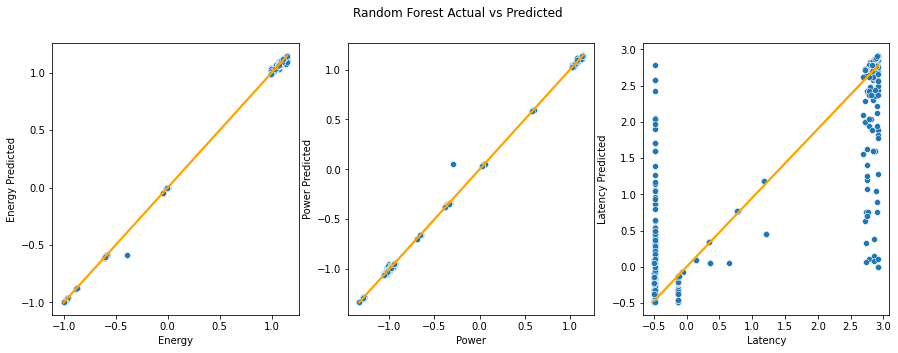

In [ ]:
# Random Forest Graph
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("Random Forest Actual vs Predicted")
plt.subplot(1,3,1)
ax0 = sns.scatterplot(x='Energy', y='Energy Predicted', data=rf_evaluation_df)
sns.regplot(x='Energy', y='Energy Predicted',
            scatter=False, data=rf_evaluation_df,
            ax=ax0, color="orange")

plt.subplot(1,3,2)
ax1 = sns.scatterplot(x='Power', y='Power Predicted', data=rf_evaluation_df)
sns.regplot(x='Power', y='Power Predicted',
            scatter=False, data=rf_evaluation_df,
            ax=ax1, color="orange")

plt.subplot(1,3,3)
ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=rf_evaluation_df)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=rf_evaluation_df,
            ax=ax2, color="orange")

# Random Forest Regression Single Target

Train 3 Models

*   Energy Random Forest Regression Model
*   Power Random Forest Regression Model
*   Latency Random Forest Regression Model



HyperParameters

In [ ]:
# Random Forst Model

n_estimators = [int(x) for x in np.linspace(start = 20, stop = 3000, num = 15)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [i for i in range(2,22,2)]
min_samples_split = [2, 5, 10, 15, 30, 35, 40, 50, 100]
min_samples_leaf = [1, 2, 5, 10]


# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(param_grid)

{'n_estimators': [20, 232, 445, 658, 871, 1084, 1297, 1510, 1722, 1935, 2148, 2361, 2574, 2787, 3000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'min_samples_split': [2, 5, 10, 15, 30, 35, 40, 50, 100], 'min_samples_leaf': [1, 2, 5, 10]}


## 10,000 Samples Per Algorithm

In [ ]:
# Sample Size Index
sample_size = 0

Search for Best Hyperparameters for **Energy** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_energy = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, n_iter = 5,
                          scoring = 'neg_mean_squared_error',random_state =100)

grid_rf_energy.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Energy'])

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='mse',
                                                   max_depth=10,
                                                   min_samples_split=10,
                                                   n_jobs=-1,
                                                   random_state=100),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [20, 104, 188, 272, 357,
                                                         441, 525, 610, 694,
                                                         778, 862, 947, 103

Search for best hyperparameters for **Power** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_power = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, n_iter = 5,
                          scoring = 'neg_mean_squared_error',random_state =100)

grid_rf_power.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Power'])

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='mse',
                                                   max_depth=10,
                                                   min_samples_split=10,
                                                   n_jobs=-1,
                                                   random_state=100),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [20, 104, 188, 272, 357,
                                                         441, 525, 610, 694,
                                                         778, 862, 947, 103

Search for Best Hyperparameters for **Latency** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_latency = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, n_iter = 5,
                          scoring = 'neg_mean_squared_error',random_state =100)

grid_rf_latency.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Latency'])

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='mse',
                                                   max_depth=10,
                                                   min_samples_split=10,
                                                   n_jobs=-1,
                                                   random_state=100),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [20, 104, 188, 272, 357,
                                                         441, 525, 610, 694,
                                                         778, 862, 947, 103

In [ ]:
grid_rf_energy.best_params_

# {'n_estimators': 1200,
#  'min_samples_split': 15,
#  'min_samples_leaf': 1,
#  'max_features': 'auto',
#  'max_depth': 8}

# Standardized 10,000
# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}


# Box-Cox Transformed Latency
# {'n_estimators': 862,
#  'min_samples_split': 15,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

{'n_estimators': 1200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8}

In [ ]:
grid_rf_power.best_params_

# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

# Standardized 10,000
# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

# Box-Cox Transformed Latency
# {'n_estimators': 1200,
#  'min_samples_split': 15,
#  'min_samples_leaf': 1,
#  'max_features': 'auto',
#  'max_depth': 8}

{'n_estimators': 1200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8}

In [ ]:
grid_rf_latency.best_params_

# {'n_estimators': 610,
#  'min_samples_split': 5,
#  'min_samples_leaf': 5,
#  'max_features': 'auto',
#  'max_depth': 8}

# Standardized 10,000
# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

# Box-Cox Transformed Latency
# {'n_estimators': 1200,
#  'min_samples_split': 15,
#  'min_samples_leaf': 1,
#  'max_features': 'auto',
#  'max_depth': 8}

{'n_estimators': 1200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8}

Train Random Forest Model for **Energy**

In [ ]:
rf_energy = RandomForestRegressor(n_estimators=1200,criterion='mse', 
                                 max_depth=8, min_samples_split=15,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_energy.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Energy'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=8, min_samples_split=15,
                      n_estimators=1200, n_jobs=-1, random_state=100)

Train Random Forest Model for **Power**

In [ ]:
rf_power = RandomForestRegressor(n_estimators=1200,criterion='mse', 
                                 max_depth=8, min_samples_split=15,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_power.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Power'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=8, min_samples_split=15,
                      n_estimators=1200, n_jobs=-1, random_state=100)

Train Random Forest Model for **Latency**

In [ ]:
rf_latency = RandomForestRegressor(n_estimators=1200,criterion='mse', 
                                 max_depth=8, min_samples_split=15,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_latency.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Latency'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=8, min_samples_split=15,
                      n_estimators=1200, n_jobs=-1, random_state=100)

Evaluate RF **Energy** Model

In [ ]:
# Prediction
y_train_pred_rf_energy = rf_energy.predict(X_train_samples[sample_size])
y_test_pred_rf_energy = rf_energy.predict(X_test_samples[sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Energy'],y_train_pred_rf_energy),10)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[sample_size]['Energy'],y_test_pred_rf_energy),10)))

Mean Squared Error for train : 1.4094e-06
Mean Squared Error for test : 1.0322e-06


Evaluate RL **Power** Model

In [ ]:
# Prediction
y_train_pred_rf_power = rf_power.predict(X_train_samples[sample_size])
y_test_pred_rf_power = rf_power.predict(X_test_samples[sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Power'],y_train_pred_rf_power),7)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[sample_size]['Power'],y_test_pred_rf_power),5)))

Mean Squared Error for train : 1.85e-05
Mean Squared Error for test : 2e-05


Evaluate RL **Latency** Model

In [ ]:
# Prediction
y_train_pred_rf_latency = rf_latency.predict(X_train_samples[sample_size])
y_test_pred_rf_latency = rf_latency.predict(X_test_samples[sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Latency'],y_train_pred_rf_latency),5)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[sample_size]['Latency'],y_test_pred_rf_latency),5)))

Mean Squared Error for train : 0.07506
Mean Squared Error for test : 0.08308


Visualize Single Target RF Models

In [ ]:
rf_single_target_pred = {'Energy Predicted': y_test_pred_rf_energy, 
                              'Power Predicted': y_test_pred_rf_power, 
                              'Latency Predicted': y_test_pred_rf_latency}
rf_single_target_pred = pd.DataFrame(rf_single_target_pred)


rf_single_target_evaluation_df = y_test_reset_index_samples[sample_size].join(rf_single_target_pred)

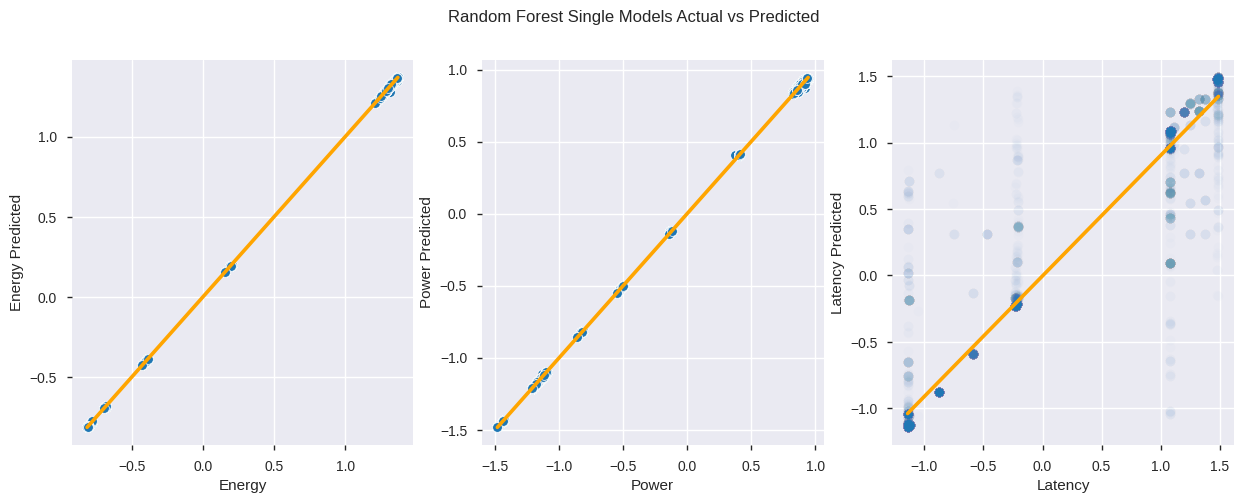

In [ ]:
# Random Forest Graph
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("Random Forest Single Models Actual vs Predicted")
plt.subplot(1,3,1)
ax0 = sns.scatterplot(x='Energy', y='Energy Predicted', data=rf_single_target_evaluation_df)
sns.regplot(x='Energy', y='Energy Predicted',
            scatter=False, data=rf_single_target_evaluation_df,
            ax=ax0, color="orange")

plt.subplot(1,3,2)
ax1 = sns.scatterplot(x='Power', y='Power Predicted', data=rf_single_target_evaluation_df)
sns.regplot(x='Power', y='Power Predicted',
            scatter=False, data=rf_single_target_evaluation_df,
            ax=ax1, color="orange")

plt.subplot(1,3,3)
ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=rf_single_target_evaluation_df, alpha=.01)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=rf_single_target_evaluation_df, 
            ax=ax2, color="orange")

## 50,000 Samples Per Algorithm 

In [ ]:
# Sample Size Index
sample_size = 1

Search for Best Hyperparameters for **Energy** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_energy = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,scoring = 'neg_mean_squared_error',random_state =100)

grid_rf_energy.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Energy'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='mse',
                                                   max_depth=10,
                                                   min_samples_split=10,
                                                   n_jobs=-1,
                                                   random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 30,
                                                              35, 40, 50, 100],
                                        'n_estimators': [20, 232, 445, 658, 871,
       

Search for best hyperparameters for **Power** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_power = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,scoring = 'neg_mean_squared_error',random_state =100)

grid_rf_power.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Power'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='mse',
                                                   max_depth=10,
                                                   min_samples_split=10,
                                                   n_jobs=-1,
                                                   random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 30,
                                                              35, 40, 50, 100],
                                        'n_estimators': [20, 232, 445, 658, 871,
       

Search for Best Hyperparameters for **Latency** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_latency = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,scoring = 'neg_mean_squared_error',random_state =100)

grid_rf_latency.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Latency'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: ignored

In [ ]:
grid_rf_energy.best_params_

# {'n_estimators': 445,
#  'min_samples_split': 40,
#  'min_samples_leaf': 5,
#  'max_features': 'auto',
#  'max_depth': 14}

{'n_estimators': 445,
 'min_samples_split': 40,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 14}

In [ ]:
grid_rf_power.best_params_

# {'n_estimators': 445,
#  'min_samples_split': 40,
#  'min_samples_leaf': 5,
#  'max_features': 'auto',
#  'max_depth': 14}

{'n_estimators': 445,
 'min_samples_split': 40,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 14}

In [ ]:
grid_rf_latency.best_params_

# {'n_estimators': 445,
#  'min_samples_split': 40,
#  'min_samples_leaf': 5,
#  'max_features': 'auto',
#  'max_depth': 14}

Train Random Forest Model for **Energy**

In [ ]:
rf_energy = RandomForestRegressor(n_estimators=445,criterion='mse', 
                                 max_depth=14, min_samples_split=40,
                                 min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_energy.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Energy'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=14, min_samples_leaf=5,
                      min_samples_split=40, n_estimators=445, n_jobs=-1,
                      random_state=100)

Train Random Forest Model for **Power**

In [ ]:
rf_power = RandomForestRegressor(n_estimators=445,criterion='mse', 
                                 max_depth=14, min_samples_split=40,
                                 min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_power.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Power'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=14, min_samples_leaf=5,
                      min_samples_split=40, n_estimators=445, n_jobs=-1,
                      random_state=100)

Train Random Forest Model for **Latency**

In [ ]:
rf_latency = RandomForestRegressor(n_estimators=445,criterion='mse', 
                                 max_depth=14, min_samples_split=40,
                                 min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_latency.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Latency'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=14, min_samples_leaf=5,
                      min_samples_split=40, n_estimators=445, n_jobs=-1,
                      random_state=100)

Evaluate RF **Energy** Model

In [ ]:
# Prediction
y_train_pred_rf_energy = rf_energy.predict(X_train_samples[sample_size])
y_test_pred_rf_energy = rf_energy.predict(X_test_samples[sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Energy'],y_train_pred_rf_energy),15)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[sample_size]['Energy'],y_test_pred_rf_energy),15)))

Mean Squared Error for train : 2.16923828e-07
Mean Squared Error for test : 3.80083173e-07


Evaluate RL **Power** Model

In [ ]:
# Prediction
y_train_pred_rf_power = rf_power.predict(X_train_samples[sample_size])
y_test_pred_rf_power = rf_power.predict(X_test_samples[sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Power'],y_train_pred_rf_power),15)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[sample_size]['Power'],y_test_pred_rf_power),15)))

Mean Squared Error for train : 9.916205429e-06
Mean Squared Error for test : 1.7001321243e-05


Evaluate RL **Latency** Model

In [ ]:
# Prediction
y_train_pred_rf_latency = rf_latency.predict(X_train_samples[sample_size])
y_test_pred_rf_latency = rf_latency.predict(X_test_samples[sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Latency'],y_train_pred_rf_latency),5)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[sample_size]['Latency'],y_test_pred_rf_latency),5)))

Mean Squared Error for train : 0.00744
Mean Squared Error for test : 0.00761


Visualize Single Target RF Models

In [ ]:
rf_single_target_pred = {'Energy Predicted': y_test_pred_rf_energy, 
                              'Power Predicted': y_test_pred_rf_power, 
                              'Latency Predicted': y_test_pred_rf_latency}
rf_single_target_pred = pd.DataFrame(rf_single_target_pred)


rf_single_target_evaluation_df = y_test_reset_index_samples[sample_size].join(rf_single_target_pred)

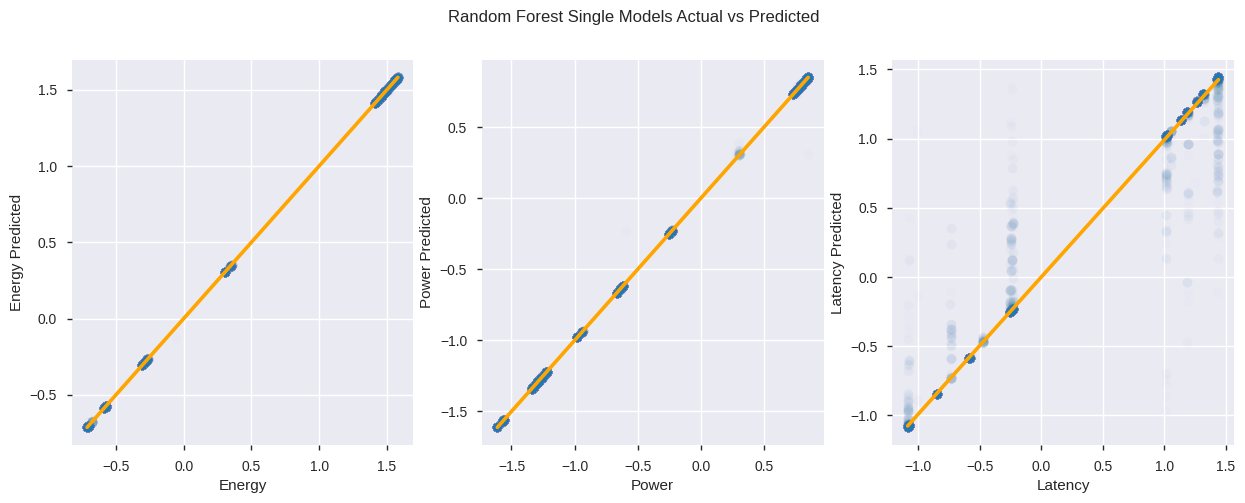

In [ ]:
# Random Forest Graph
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("Random Forest Single Models Actual vs Predicted")
plt.subplot(1,3,1)
ax0 = sns.scatterplot(x='Energy', y='Energy Predicted', data=rf_single_target_evaluation_df, alpha=.01)
sns.regplot(x='Energy', y='Energy Predicted',
            scatter=False, data=rf_single_target_evaluation_df,
            ax=ax0, color="orange")

plt.subplot(1,3,2)
ax1 = sns.scatterplot(x='Power', y='Power Predicted', data=rf_single_target_evaluation_df, alpha=.01)
sns.regplot(x='Power', y='Power Predicted',
            scatter=False, data=rf_single_target_evaluation_df,
            ax=ax1, color="orange")

plt.subplot(1,3,3)
ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=rf_single_target_evaluation_df, alpha=.01)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=rf_single_target_evaluation_df,
            ax=ax2, color="orange")

## 100,000 Samples Per Algorithm 

In [ ]:
# Sample Size Index
sample_size = 2

Search for Best Hyperparameters for **Energy** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_energy = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,scoring = 'neg_mean_squared_error', 
                          random_state =100, n_iter = 5)

grid_rf_energy.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Energy'])

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='mse',
                                                   max_depth=10,
                                                   min_samples_split=10,
                                                   n_jobs=-1,
                                                   random_state=100),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [20, 104, 188, 272, 357,
                                                         441, 525, 610, 694,
                                                         778, 862, 947, 103

Search for best hyperparameters for **Power** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_power = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,scoring = 'neg_mean_squared_error',
                          random_state =100, n_iter = 3)

grid_rf_power.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Power'])

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='mse',
                                                   max_depth=10,
                                                   min_samples_split=10,
                                                   n_jobs=-1,
                                                   random_state=100),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [20, 104, 188, 272, 357,
                                                         441, 525, 610, 694,
                                                         778, 862, 947, 103

Search for Best Hyperparameters for **Latency** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_latency = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,scoring = 'neg_mean_squared_error',
                          random_state =100, n_iter = 3)

grid_rf_latency.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Latency'])

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='mse',
                                                   max_depth=10,
                                                   min_samples_split=10,
                                                   n_jobs=-1,
                                                   random_state=100),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [20, 104, 188, 272, 357,
                                                         441, 525, 610, 694,
                                                         778, 862, 947, 103

In [ ]:
grid_rf_energy.best_params_

# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

# {'n_estimators': 445,
#  'min_samples_split': 40,
#  'min_samples_leaf': 5,
#  'max_features': 'auto',
#  'max_depth': 14}

{'n_estimators': 862,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 8}

In [ ]:
grid_rf_power.best_params_


# {'n_estimators': 1200,
#  'min_samples_split': 15,
#  'min_samples_leaf': 1,
#  'max_features': 'auto',
#  'max_depth': 8}

# {'n_estimators': 445,
#  'min_samples_split': 40,
#  'min_samples_leaf': 5,
#  'max_features': 'auto',
#  'max_depth': 14}

{'n_estimators': 1200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8}

In [ ]:
grid_rf_latency.best_params_

# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

# {'n_estimators': 445,
#  'min_samples_split': 40,
#  'min_samples_leaf': 5,
#  'max_features': 'auto',
#  'max_depth': 14}

{'n_estimators': 1200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8}

Train Random Forest Model for **Energy**

In [ ]:
rf_energy = RandomForestRegressor(n_estimators=445,criterion='mse', 
                                 max_depth=14, min_samples_split=40,
                                 min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_energy.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Energy'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=14, min_samples_leaf=5,
                      min_samples_split=40, n_estimators=445, n_jobs=-1,
                      random_state=100)

Train Random Forest Model for **Power**

In [ ]:
rf_power = RandomForestRegressor(n_estimators=445,criterion='mse', 
                                 max_depth=14, min_samples_split=40,
                                 min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_power.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Power'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=14, min_samples_leaf=5,
                      min_samples_split=40, n_estimators=445, n_jobs=-1,
                      random_state=100)

Train Random Forest Model for **Latency**

In [ ]:
rf_latency = RandomForestRegressor(n_estimators=445,criterion='mse', 
                                 max_depth=14, min_samples_split=40,
                                 min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_latency.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Latency'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=14, min_samples_leaf=5,
                      min_samples_split=40, n_estimators=445, n_jobs=-1,
                      random_state=100)

Evaluate RF **Energy** Model

In [ ]:
# Prediction
y_train_pred_rf_energy = rf_energy.predict(X_train_samples[sample_size])
y_test_pred_rf_energy = rf_energy.predict(X_test_samples[sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Energy'],y_train_pred_rf_energy),15)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[sample_size]['Energy'],y_test_pred_rf_energy),15)))

Mean Squared Error for train : 1.03397129e-07
Mean Squared Error for test : 1.32365656e-07


Evaluate RL **Power** Model

In [ ]:
# Prediction
y_train_pred_rf_power = rf_power.predict(X_train_samples[sample_size])
y_test_pred_rf_power = rf_power.predict(X_test_samples[sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Power'],y_train_pred_rf_power),15)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[sample_size]['Power'],y_test_pred_rf_power),15)))

Mean Squared Error for train : 6.106177561e-06
Mean Squared Error for test : 6.410489761e-06


Evaluate RL **Latency** Model

In [ ]:
# Prediction
y_train_pred_rf_latency = rf_latency.predict(X_train_samples[sample_size])
y_test_pred_rf_latency = rf_latency.predict(X_test_samples[sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Latency'],y_train_pred_rf_latency),5)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[sample_size]['Latency'],y_test_pred_rf_latency),5)))

Mean Squared Error for train : 0.00275
Mean Squared Error for test : 0.0035


Visualize Single Target RF Models

In [ ]:
rf_single_target_pred = {'Energy Predicted': y_test_pred_rf_energy, 
                              'Power Predicted': y_test_pred_rf_power, 
                              'Latency Predicted': y_test_pred_rf_latency}
rf_single_target_pred = pd.DataFrame(rf_single_target_pred)


rf_single_target_evaluation_df = y_test_reset_index_samples[sample_size].join(rf_single_target_pred)

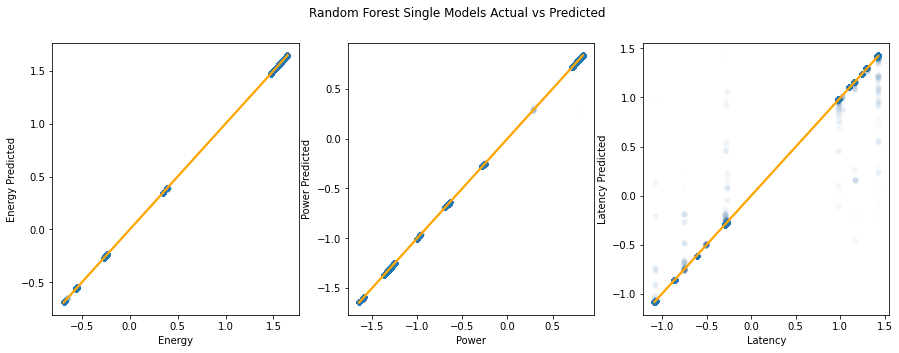

In [ ]:
# Random Forest Graph
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("Random Forest Single Models Actual vs Predicted")
plt.subplot(1,3,1)
ax0 = sns.scatterplot(x='Energy', y='Energy Predicted', data=rf_single_target_evaluation_df, alpha=.01)
sns.regplot(x='Energy', y='Energy Predicted',
            scatter=False, data=rf_single_target_evaluation_df,
            ax=ax0, color="orange")

plt.subplot(1,3,2)
ax1 = sns.scatterplot(x='Power', y='Power Predicted', data=rf_single_target_evaluation_df, alpha=.01)
sns.regplot(x='Power', y='Power Predicted',
            scatter=False, data=rf_single_target_evaluation_df,
            ax=ax1, color="orange")

plt.subplot(1,3,3)
ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=rf_single_target_evaluation_df, alpha=.01)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=rf_single_target_evaluation_df,
            ax=ax2, color="orange")

## 250,000 Samples Per Algorithm 

In [ ]:
# Sample Size Index
sample_size = 3

Search for Best Hyperparameters for **Energy** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_energy = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,scoring = 'neg_mean_squared_error',
                          random_state =100, n_iter = 10)

grid_rf_energy.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Energy'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Search for best hyperparameters for **Power** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_power = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,scoring = 'neg_mean_squared_error',
                          random_state =100, n_iter = 3)

grid_rf_power.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Power'])

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='mse',
                                                   max_depth=10,
                                                   min_samples_split=10,
                                                   n_jobs=-1,
                                                   random_state=100),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [20, 104, 188, 272, 357,
                                                         441, 525, 610, 694,
                                                         778, 862, 947, 103

Search for Best Hyperparameters for **Latency** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_latency = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,scoring = 'neg_mean_squared_error',
                          random_state =100, n_iter = 3)

grid_rf_latency.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Latency'])

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='mse',
                                                   max_depth=10,
                                                   min_samples_split=10,
                                                   n_jobs=-1,
                                                   random_state=100),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [20, 104, 188, 272, 357,
                                                         441, 525, 610, 694,
                                                         778, 862, 947, 103

In [ ]:
grid_rf_energy.best_params_

# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

In [ ]:
grid_rf_power.best_params_


# {'n_estimators': 1200,
#  'min_samples_split': 15,
#  'min_samples_leaf': 1,
#  'max_features': 'auto',
#  'max_depth': 8}

{'n_estimators': 1200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8}

In [ ]:
grid_rf_latency.best_params_

# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

{'n_estimators': 1200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8}

Train Random Forest Model for **Energy**

In [ ]:
rf_energy = RandomForestRegressor(n_estimators=445,criterion='mse', 
                                 max_depth=14, min_samples_split=40,
                                 min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_energy.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Energy'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=14, min_samples_leaf=5,
                      min_samples_split=40, n_estimators=445, n_jobs=-1,
                      random_state=100)

Train Random Forest Model for **Power**

In [ ]:
rf_power = RandomForestRegressor(n_estimators=445,criterion='mse', 
                                 max_depth=14, min_samples_split=40,
                                 min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_power.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Power'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=14, min_samples_leaf=5,
                      min_samples_split=40, n_estimators=445, n_jobs=-1,
                      random_state=100)

Train Random Forest Model for **Latency**

In [ ]:
rf_latency = RandomForestRegressor(n_estimators=445,criterion='mse', 
                                 max_depth=14, min_samples_split=40,
                                 min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_latency.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Latency'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=14, min_samples_leaf=5,
                      min_samples_split=40, n_estimators=445, n_jobs=-1,
                      random_state=100)

Evaluate RF **Energy** Model

In [ ]:
# Prediction
y_train_pred_rf_energy = rf_energy.predict(X_train_samples[sample_size])
y_test_pred_rf_energy = rf_energy.predict(X_test_samples[sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Energy'],y_train_pred_rf_energy),15)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[sample_size]['Energy'],y_test_pred_rf_energy),15)))

Mean Squared Error for train : 7.04588184e-07
Mean Squared Error for test : 8.0763227e-08


Evaluate RL **Power** Model

In [ ]:
# Prediction
y_train_pred_rf_power = rf_power.predict(X_train_samples[sample_size])
y_test_pred_rf_power = rf_power.predict(X_test_samples[sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Power'],y_train_pred_rf_power),15)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[sample_size]['Power'],y_test_pred_rf_power),15)))

Mean Squared Error for train : 3.484146692e-06
Mean Squared Error for test : 3.655856355e-06


Evaluate RL **Latency** Model

In [ ]:
# Prediction
y_train_pred_rf_latency = rf_latency.predict(X_train_samples[sample_size])
y_test_pred_rf_latency = rf_latency.predict(X_test_samples[sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Latency'],y_train_pred_rf_latency),5)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[sample_size]['Latency'],y_test_pred_rf_latency),5)))

Mean Squared Error for train : 0.00147
Mean Squared Error for test : 0.00173


Visualize Single Target RF Models

In [ ]:
rf_single_target_pred = {'Energy Predicted': y_test_pred_rf_energy, 
                              'Power Predicted': y_test_pred_rf_power, 
                              'Latency Predicted': y_test_pred_rf_latency}
rf_single_target_pred = pd.DataFrame(rf_single_target_pred)


rf_single_target_evaluation_df = y_test_reset_index_samples[sample_size].join(rf_single_target_pred)

rf_single_target_evaluation_df['Latency Calculated'] = rf_single_target_evaluation_df['Energy Predicted']/rf_single_target_evaluation_df['Power Predicted']


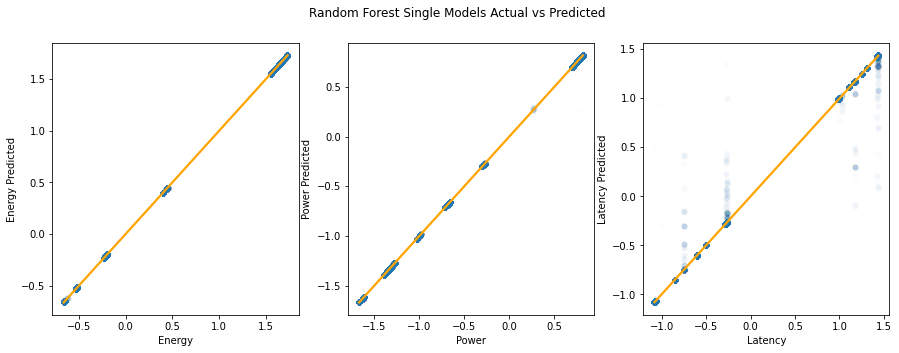

In [ ]:
# Random Forest Graph
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("Random Forest Single Models Actual vs Predicted")
plt.subplot(1,3,1)
ax0 = sns.scatterplot(x='Energy', y='Energy Predicted', data=rf_single_target_evaluation_df, alpha=.01)
sns.regplot(x='Energy', y='Energy Predicted',
            scatter=False, data=rf_single_target_evaluation_df,
            ax=ax0, color="orange")

plt.subplot(1,3,2)
ax1 = sns.scatterplot(x='Power', y='Power Predicted', data=rf_single_target_evaluation_df, alpha=.01)
sns.regplot(x='Power', y='Power Predicted',
            scatter=False, data=rf_single_target_evaluation_df,
            ax=ax1, color="orange")

plt.subplot(1,3,3)
ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=rf_single_target_evaluation_df, alpha=.01)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=rf_single_target_evaluation_df,
            ax=ax2, color="orange")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Latency Predicted', ylabel='Density'>

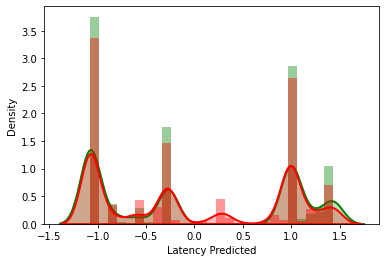

In [ ]:
sns.distplot(rf_single_target_evaluation_df['Latency'], hist = True, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2},
                label = "Non-Normal", color ="green")

sns.distplot(rf_single_target_evaluation_df['Latency Predicted'], hist = True, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2},
                label = "Non-Normal", color ="red")

## 1,000,000 Samples Per Algorithm

In [ ]:
# Sample Size Index
sample_size = 4

Drop RefreshPolicy due to low Correlation with Latency

In [ ]:
drop_refresh_policy = True
if drop_refresh_policy:
  X_train_samples[sample_size] = X_train_samples[sample_size].drop(columns=['RefreshPolicy'])
  X_test_samples[sample_size] = X_test_samples[sample_size].drop(columns=['RefreshPolicy'])

Search for Best Hyperparameters for **Latency** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_latency = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,scoring = 'neg_mean_squared_error',
                          random_state =100, n_iter = 3)

grid_rf_latency.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Latency'])

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='mse',
                                                   max_depth=10,
                                                   min_samples_split=10,
                                                   n_jobs=-1,
                                                   random_state=100),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [20, 104, 188, 272, 357,
                                                         441, 525, 610, 694,
                                                         778, 862, 947, 103

In [ ]:
grid_rf_latency.best_params_

{'n_estimators': 1200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8}

Train Random Forest Model for **Latency**

In [ ]:
rf_latency = RandomForestRegressor(n_estimators=1200,criterion='mse', 
                                 max_depth=8, min_samples_split=15,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_latency.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Latency'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=8, min_samples_split=15,
                      n_estimators=1200, n_jobs=-1, random_state=100)

Evaluate RL **Latency** Model

In [ ]:
# Prediction
y_train_pred_rf_latency = rf_latency.predict(X_train_samples[sample_size])
y_test_pred_rf_latency = rf_latency.predict(X_test_samples[sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Latency'],y_train_pred_rf_latency),5)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[sample_size]['Latency'],y_test_pred_rf_latency),5)))

Mean Squared Error for train : 0.30677
Mean Squared Error for test : 0.30538


Visualize Single Target RF Models

In [ ]:
rf_single_target_pred = {'Latency Predicted': y_test_pred_rf_latency}
rf_single_target_pred = pd.DataFrame(rf_single_target_pred)


rf_single_target_evaluation_df = y_test_reset_index_samples[sample_size].join(rf_single_target_pred)

<AxesSubplot:xlabel='Latency', ylabel='Latency Predicted'>

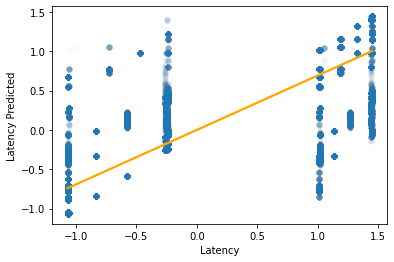

In [ ]:
ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=rf_single_target_evaluation_df, alpha=.01)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=rf_single_target_evaluation_df,
            ax=ax2, color="orange")

### Debug

In [ ]:
rf_single_target_evaluation_df['Latency Error'] = round((rf_single_target_evaluation_df['Latency'] - rf_single_target_evaluation_df['Latency Predicted'])**2, 5)
temp = X_test_samples[sample_size].reset_index(drop=True)
temp = temp.join(rf_single_target_evaluation_df)
large_error_df_temp = temp.loc[rf_single_target_evaluation_df['Latency Error']>.1]
large_error_df_temp

MaxActiveTransactions  RefreshMaxPostponed  RefreshMaxPulledin  \
1                   -0.029817             0.231568           -1.079233   
4                    0.733150             0.231568            1.500014   
5                   -0.029817             1.519627            1.500014   
6                   -0.411300            -1.485844            0.210390   
7                   -0.697413             1.519627           -1.509108   
...                       ...                  ...                 ...   
215130              -0.411300            -1.485844           -1.079233   
215131              -0.745099            -1.485844           -1.509108   
215132              -0.745099            -0.197785            0.210390   
215134              -0.697413            -1.056491            1.070139   
215137              -0.768941            -0.627138           -0.219484   

        RequestBufferSize  Arbiter  PagePolicy  RespQueue  Scheduler  \
1                1.145182        0           3          0          0   
4                0.271131        1           1          1          0   
5               -1.476971        1           1          0          0   
6               -0.165895        0           1          1          1   
7                1.582207        0           1          1          2   
...                   ...      ...         ...        ...        ...   
215130          -1.476971        2           1          1          0   
215131          -0.602920        2           1          0          2   
215132          -1.039946        2           1          1          1   
215134          -1.039946        0           1          0          1   
215137           0.708156        2           1          1          2   

        SchedulerBuffer    Energy     Power   Latency  Latency Predicted  \
1                     0 -0.632473  0.783810 -1.068239          -0.391653   
4                     0 -0.630644  0.786674  1.011583          -0.367073   
5                     0  1.826011 -1.382094  1.447288           0.480122   
6                     2 -0.632276  0.785510 -1.068239          -0.206945   
7                     0 -0.176011 -0.326707  1.186643           0.774617   
...                 ...       ...       ...       ...                ...   
215130                1  1.746105 -1.420786 -0.240884           0.451949   
215131                1 -0.632276  0.785510 -1.068239          -0.398358   
215132                0 -0.631259  0.765373  1.012244           0.559078   
215134                1 -0.155101 -0.303706 -0.727759           0.723572   
215137                2 -0.632276  0.785510 -1.068239          -0.716979   

        Latency Error  
1             0.45777  
4             1.90069  
5             0.93541  
6             0.74183  
7             0.16977  
...               ...  
215130        0.48002  
215131        0.44874  
215132        0.20536  
215134        2.10636  
215137        0.12338  

[79525 rows x 14 columns]

In [ ]:
create_profile = True
profile = None
if create_profile:
  profile = ProfileReport(large_error_df_temp, html={'style':{'full_width':True}})
profile

In [ ]:
profile.to_file("Error_Test_Data_Latency_1000000_RefreshPolicy_Removed.pdf")

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:283: UserWarning: Extension .pdf not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  f"Extension {suffix} not supported. For now we assume .html was intended. "


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Latency', ylabel='Latency Predicted'>

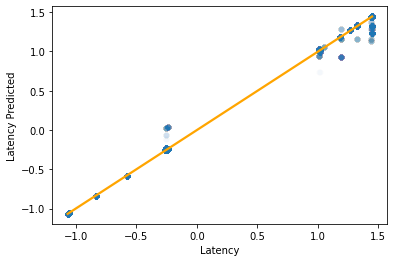

In [ ]:
temp3 = temp.loc[rf_single_target_evaluation_df['Latency Error']<.1]
ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=temp3, alpha=.01)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=temp3,
            ax=ax2, color="orange")

In [ ]:
create_profile = True
profile = None
if create_profile:
  profile = ProfileReport(temp3, html={'style':{'full_width':True}})
profile

In [ ]:
profile.to_file("No_Error_Test_Data_Latency_1000000.pdf")

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:283: UserWarning: Extension .pdf not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  f"Extension {suffix} not supported. For now we assume .html was intended. "


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 40,000 ACO Samples

In [ ]:
# Sample Size Index
sample_size = 5
compare_to_sample_size = 0

Search for Best Hyperparameters for **Energy** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_energy = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, n_iter = 5,
                          scoring = 'neg_mean_squared_error',random_state =100)

grid_rf_energy.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Energy'])

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='mse',
                                                   max_depth=10,
                                                   min_samples_split=10,
                                                   n_jobs=-1,
                                                   random_state=100),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [20, 104, 188, 272, 357,
                                                         441, 525, 610, 694,
                                                         778, 862, 947, 103

Search for best hyperparameters for **Power** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_power = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, n_iter = 5,
                          scoring = 'neg_mean_squared_error',random_state =100)

grid_rf_power.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Power'])

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='mse',
                                                   max_depth=10,
                                                   min_samples_split=10,
                                                   n_jobs=-1,
                                                   random_state=100),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [20, 104, 188, 272, 357,
                                                         441, 525, 610, 694,
                                                         778, 862, 947, 103

Search for Best Hyperparameters for **Latency** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_latency = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, n_iter = 5,
                          scoring = 'neg_mean_squared_error',random_state =100)

grid_rf_latency.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Latency'])

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='mse',
                                                   max_depth=10,
                                                   min_samples_split=10,
                                                   n_jobs=-1,
                                                   random_state=100),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [20, 104, 188, 272, 357,
                                                         441, 525, 610, 694,
                                                         778, 862, 947, 103

In [ ]:
grid_rf_energy.best_params_

# {'n_estimators': 1200,
#  'min_samples_split': 15,
#  'min_samples_leaf': 1,
#  'max_features': 'auto',
#  'max_depth': 8}

# Standardized 10,000
# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}


# Box-Cox Transformed Latency
# {'n_estimators': 862,
#  'min_samples_split': 15,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

{'n_estimators': 1200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8}

In [ ]:
grid_rf_power.best_params_

# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

# Standardized 10,000
# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

# Box-Cox Transformed Latency
# {'n_estimators': 1200,
#  'min_samples_split': 15,
#  'min_samples_leaf': 1,
#  'max_features': 'auto',
#  'max_depth': 8}

{'n_estimators': 1200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8}

In [ ]:
grid_rf_latency.best_params_

# {'n_estimators': 610,
#  'min_samples_split': 5,
#  'min_samples_leaf': 5,
#  'max_features': 'auto',
#  'max_depth': 8}

# Standardized 10,000
# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

# Box-Cox Transformed Latency
# {'n_estimators': 1200,
#  'min_samples_split': 15,
#  'min_samples_leaf': 1,
#  'max_features': 'auto',
#  'max_depth': 8}

{'n_estimators': 1200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8}

Train Random Forest Model for **Energy**

In [ ]:
rf_energy = RandomForestRegressor(n_estimators=1200,criterion='mse', 
                                 max_depth=8, min_samples_split=15,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_energy.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Energy'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=8, min_samples_split=15,
                      n_estimators=1200, n_jobs=-1, random_state=100)

Train Random Forest Model for **Power**

In [ ]:
rf_power = RandomForestRegressor(n_estimators=1200,criterion='mse', 
                                 max_depth=8, min_samples_split=15,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_power.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Power'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=8, min_samples_split=15,
                      n_estimators=1200, n_jobs=-1, random_state=100)

Train Random Forest Model for **Latency**

In [ ]:
rf_latency = RandomForestRegressor(n_estimators=1200,criterion='mse', 
                                 max_depth=8, min_samples_split=15,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_latency.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Latency'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=8, min_samples_split=15,
                      n_estimators=1200, n_jobs=-1, random_state=100)

Evaluate RF **Energy** Model

In [ ]:
# Prediction
y_train_pred_rf_energy = rf_energy.predict(X_train_samples[sample_size])
y_test_pred_rf_energy = rf_energy.predict(X_test_samples[compare_to_sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Energy'],y_train_pred_rf_energy),10)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[compare_to_sample_size]['Energy'],y_test_pred_rf_energy),10)))

Mean Squared Error for train : 5.694e-07
Mean Squared Error for test : 0.3278589006


Evaluate RL **Power** Model

In [ ]:
# Prediction
y_train_pred_rf_power = rf_power.predict(X_train_samples[sample_size])
y_test_pred_rf_power = rf_power.predict(X_test_samples[compare_to_sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Power'],y_train_pred_rf_power),7)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[compare_to_sample_size]['Power'],y_test_pred_rf_power),5)))

Mean Squared Error for train : 1.17e-05
Mean Squared Error for test : 0.62562


Evaluate RL **Latency** Model

In [ ]:
# Prediction
y_train_pred_rf_latency = rf_latency.predict(X_train_samples[sample_size])
y_test_pred_rf_latency = rf_latency.predict(X_test_samples[compare_to_sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Latency'],y_train_pred_rf_latency),5)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[compare_to_sample_size]['Latency'],y_test_pred_rf_latency),5)))

Mean Squared Error for train : 0.08017
Mean Squared Error for test : 0.8667


Visualize Single Target RF Models

In [ ]:
rf_single_target_pred = {'Energy Predicted': y_test_pred_rf_energy, 
                              'Power Predicted': y_test_pred_rf_power, 
                              'Latency Predicted': y_test_pred_rf_latency}
rf_single_target_pred = pd.DataFrame(rf_single_target_pred)


rf_single_target_evaluation_df = y_test_reset_index_samples[compare_to_sample_size].join(rf_single_target_pred)

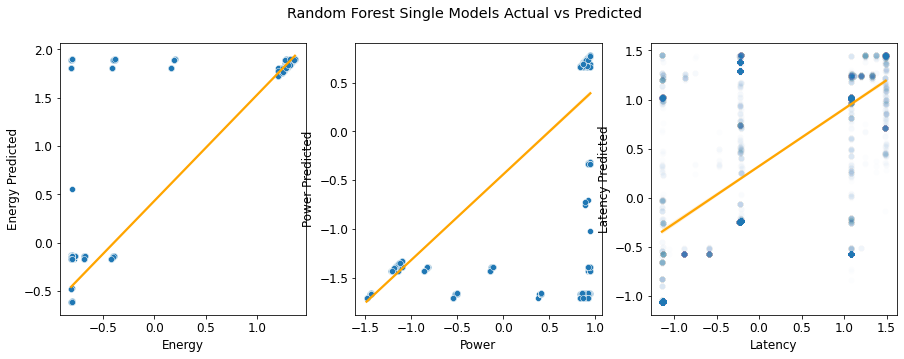

In [ ]:
# Random Forest Graph
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("Random Forest Single Models Actual vs Predicted")
plt.subplot(1,3,1)
ax0 = sns.scatterplot(x='Energy', y='Energy Predicted', data=rf_single_target_evaluation_df)
sns.regplot(x='Energy', y='Energy Predicted',
            scatter=False, data=rf_single_target_evaluation_df,
            ax=ax0, color="orange")

plt.subplot(1,3,2)
ax1 = sns.scatterplot(x='Power', y='Power Predicted', data=rf_single_target_evaluation_df)
sns.regplot(x='Power', y='Power Predicted',
            scatter=False, data=rf_single_target_evaluation_df,
            ax=ax1, color="orange")

plt.subplot(1,3,3)
ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=rf_single_target_evaluation_df, alpha=.01)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=rf_single_target_evaluation_df, 
            ax=ax2, color="orange")

## 132,855 ACO Samples

In [ ]:
# Sample Size Index
sample_size = 6
compare_to_sample_size = 1

Search for Best Hyperparameters for **Energy** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_energy = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, n_iter = 10,
                          scoring = 'neg_mean_squared_error',random_state =100)

grid_rf_energy.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Energy'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored

Search for best hyperparameters for **Power** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_power = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, n_iter = 10,
                          scoring = 'neg_mean_squared_error',random_state =100)

grid_rf_power.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Power'])

Search for Best Hyperparameters for **Latency** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_latency = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, n_iter = 10,
                          scoring = 'neg_mean_squared_error',random_state =100)

grid_rf_latency.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Latency'])

In [ ]:
grid_rf_energy.best_params_

# {'n_estimators': 1200,
#  'min_samples_split': 15,
#  'min_samples_leaf': 1,
#  'max_features': 'auto',
#  'max_depth': 8}

# Standardized 10,000
# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}


# Box-Cox Transformed Latency
# {'n_estimators': 862,
#  'min_samples_split': 15,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

In [ ]:
grid_rf_power.best_params_

# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

# Standardized 10,000
# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

# Box-Cox Transformed Latency
# {'n_estimators': 1200,
#  'min_samples_split': 15,
#  'min_samples_leaf': 1,
#  'max_features': 'auto',
#  'max_depth': 8}

In [ ]:
grid_rf_latency.best_params_

# {'n_estimators': 610,
#  'min_samples_split': 5,
#  'min_samples_leaf': 5,
#  'max_features': 'auto',
#  'max_depth': 8}

# Standardized 10,000
# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

# Box-Cox Transformed Latency
# {'n_estimators': 1200,
#  'min_samples_split': 15,
#  'min_samples_leaf': 1,
#  'max_features': 'auto',
#  'max_depth': 8}

Train Random Forest Model for **Energy**

In [ ]:
rf_energy = RandomForestRegressor(n_estimators=445,criterion='mse', 
                                 max_depth=14, min_samples_split=40,
                                 min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_energy.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Energy'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=14, min_samples_leaf=5,
                      min_samples_split=40, n_estimators=445, n_jobs=-1,
                      random_state=100)

Train Random Forest Model for **Power**

In [ ]:
rf_power = RandomForestRegressor(n_estimators=445,criterion='mse', 
                                 max_depth=14, min_samples_split=40,
                                 min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_power.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Power'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=14, min_samples_leaf=5,
                      min_samples_split=40, n_estimators=445, n_jobs=-1,
                      random_state=100)

Train Random Forest Model for **Latency**

In [ ]:
rf_latency = RandomForestRegressor(n_estimators=445,criterion='mse', 
                                 max_depth=14, min_samples_split=40,
                                 min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_latency.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Latency'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=14, min_samples_leaf=5,
                      min_samples_split=40, n_estimators=445, n_jobs=-1,
                      random_state=100)

Evaluate RF **Energy** Model

In [ ]:
# Prediction
y_train_pred_rf_energy = rf_energy.predict(X_train_samples[sample_size])
y_test_pred_rf_energy = rf_energy.predict(X_test_samples[compare_to_sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Energy'],y_train_pred_rf_energy),10)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[compare_to_sample_size]['Energy'],y_test_pred_rf_energy),10)))

Mean Squared Error for train : 5.03e-08
Mean Squared Error for test : 0.299039416


Evaluate RL **Power** Model

In [ ]:
# Prediction
y_train_pred_rf_power = rf_power.predict(X_train_samples[sample_size])
y_test_pred_rf_power = rf_power.predict(X_test_samples[compare_to_sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Power'],y_train_pred_rf_power),7)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[compare_to_sample_size]['Power'],y_test_pred_rf_power),5)))

Mean Squared Error for train : 1e-07
Mean Squared Error for test : 0.65098


Evaluate RL **Latency** Model

In [ ]:
# Prediction
y_train_pred_rf_latency = rf_latency.predict(X_train_samples[sample_size])
y_test_pred_rf_latency = rf_latency.predict(X_test_samples[compare_to_sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Latency'],y_train_pred_rf_latency),5)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[compare_to_sample_size]['Latency'],y_test_pred_rf_latency),5)))

Mean Squared Error for train : 0.00655
Mean Squared Error for test : 0.66051


Visualize Single Target RF Models

In [ ]:
rf_single_target_pred = {'Energy Predicted': y_test_pred_rf_energy, 
                              'Power Predicted': y_test_pred_rf_power, 
                              'Latency Predicted': y_test_pred_rf_latency}
rf_single_target_pred = pd.DataFrame(rf_single_target_pred)


rf_single_target_evaluation_df = y_test_reset_index_samples[compare_to_sample_size].join(rf_single_target_pred)

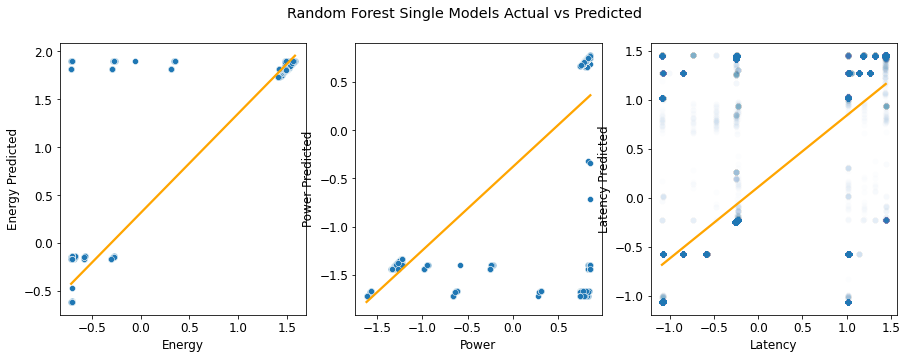

In [ ]:
# Random Forest Graph
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("Random Forest Single Models Actual vs Predicted")
plt.subplot(1,3,1)
ax0 = sns.scatterplot(x='Energy', y='Energy Predicted', data=rf_single_target_evaluation_df)
sns.regplot(x='Energy', y='Energy Predicted',
            scatter=False, data=rf_single_target_evaluation_df,
            ax=ax0, color="orange")

plt.subplot(1,3,2)
ax1 = sns.scatterplot(x='Power', y='Power Predicted', data=rf_single_target_evaluation_df)
sns.regplot(x='Power', y='Power Predicted',
            scatter=False, data=rf_single_target_evaluation_df,
            ax=ax1, color="orange")

plt.subplot(1,3,3)
ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=rf_single_target_evaluation_df, alpha=.01)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=rf_single_target_evaluation_df, 
            ax=ax2, color="orange")

## 232,855 ACO Samples

In [ ]:
# Sample Size Index
sample_size = 7
compare_to_sample_size = 2

Search for Best Hyperparameters for **Energy** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_energy = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, n_iter = 10,
                          scoring = 'neg_mean_squared_error',random_state =100)

grid_rf_energy.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Energy'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored

Search for best hyperparameters for **Power** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_power = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, n_iter = 10,
                          scoring = 'neg_mean_squared_error',random_state =100)

grid_rf_power.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Power'])

Search for Best Hyperparameters for **Latency** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_latency = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, n_iter = 10,
                          scoring = 'neg_mean_squared_error',random_state =100)

grid_rf_latency.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Latency'])

In [ ]:
grid_rf_energy.best_params_

# {'n_estimators': 1200,
#  'min_samples_split': 15,
#  'min_samples_leaf': 1,
#  'max_features': 'auto',
#  'max_depth': 8}

# Standardized 10,000
# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}


# Box-Cox Transformed Latency
# {'n_estimators': 862,
#  'min_samples_split': 15,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

In [ ]:
grid_rf_power.best_params_

# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

# Standardized 10,000
# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

# Box-Cox Transformed Latency
# {'n_estimators': 1200,
#  'min_samples_split': 15,
#  'min_samples_leaf': 1,
#  'max_features': 'auto',
#  'max_depth': 8}

In [ ]:
grid_rf_latency.best_params_

# {'n_estimators': 610,
#  'min_samples_split': 5,
#  'min_samples_leaf': 5,
#  'max_features': 'auto',
#  'max_depth': 8}

# Standardized 10,000
# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

# Box-Cox Transformed Latency
# {'n_estimators': 1200,
#  'min_samples_split': 15,
#  'min_samples_leaf': 1,
#  'max_features': 'auto',
#  'max_depth': 8}

Train Random Forest Model for **Energy**

In [ ]:
rf_energy = RandomForestRegressor(n_estimators=445,criterion='mse', 
                                 max_depth=14, min_samples_split=40,
                                 min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_energy.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Energy'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=14, min_samples_leaf=5,
                      min_samples_split=40, n_estimators=445, n_jobs=-1,
                      random_state=100)

Train Random Forest Model for **Power**

In [ ]:
rf_power = RandomForestRegressor(n_estimators=445,criterion='mse', 
                                 max_depth=14, min_samples_split=40,
                                 min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_power.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Power'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=14, min_samples_leaf=5,
                      min_samples_split=40, n_estimators=445, n_jobs=-1,
                      random_state=100)

Train Random Forest Model for **Latency**

In [ ]:
rf_latency = RandomForestRegressor(n_estimators=445,criterion='mse', 
                                 max_depth=14, min_samples_split=40,
                                 min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_latency.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Latency'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=14, min_samples_leaf=5,
                      min_samples_split=40, n_estimators=445, n_jobs=-1,
                      random_state=100)

Evaluate RF **Energy** Model

In [ ]:
# Prediction
y_train_pred_rf_energy = rf_energy.predict(X_train_samples[sample_size])
y_test_pred_rf_energy = rf_energy.predict(X_test_samples[compare_to_sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Energy'],y_train_pred_rf_energy),10)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[compare_to_sample_size]['Energy'],y_test_pred_rf_energy),10)))

Mean Squared Error for train : 2.78e-08
Mean Squared Error for test : 0.1983498883


Evaluate RL **Power** Model

In [ ]:
# Prediction
y_train_pred_rf_power = rf_power.predict(X_train_samples[sample_size])
y_test_pred_rf_power = rf_power.predict(X_test_samples[compare_to_sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Power'],y_train_pred_rf_power),10)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[compare_to_sample_size]['Power'],y_test_pred_rf_power),5)))

Mean Squared Error for train : 4.41e-08
Mean Squared Error for test : 0.51826


Evaluate RL **Latency** Model

In [ ]:
# Prediction
y_train_pred_rf_latency = rf_latency.predict(X_train_samples[sample_size])
y_test_pred_rf_latency = rf_latency.predict(X_test_samples[compare_to_sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Latency'],y_train_pred_rf_latency),5)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[compare_to_sample_size]['Latency'],y_test_pred_rf_latency),5)))

Mean Squared Error for train : 0.00363
Mean Squared Error for test : 0.57875


Visualize Single Target RF Models

In [ ]:
rf_single_target_pred = {'Energy Predicted': y_test_pred_rf_energy, 
                              'Power Predicted': y_test_pred_rf_power, 
                              'Latency Predicted': y_test_pred_rf_latency}
rf_single_target_pred = pd.DataFrame(rf_single_target_pred)


rf_single_target_evaluation_df = y_test_reset_index_samples[compare_to_sample_size].join(rf_single_target_pred)

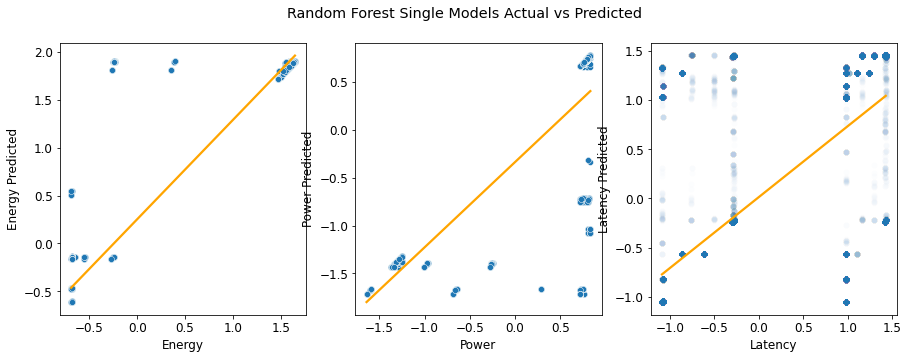

In [ ]:
# Random Forest Graph
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("Random Forest Single Models Actual vs Predicted")
plt.subplot(1,3,1)
ax0 = sns.scatterplot(x='Energy', y='Energy Predicted', data=rf_single_target_evaluation_df)
sns.regplot(x='Energy', y='Energy Predicted',
            scatter=False, data=rf_single_target_evaluation_df,
            ax=ax0, color="orange")

plt.subplot(1,3,2)
ax1 = sns.scatterplot(x='Power', y='Power Predicted', data=rf_single_target_evaluation_df)
sns.regplot(x='Power', y='Power Predicted',
            scatter=False, data=rf_single_target_evaluation_df,
            ax=ax1, color="orange")

plt.subplot(1,3,3)
ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=rf_single_target_evaluation_df, alpha=.01)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=rf_single_target_evaluation_df, 
            ax=ax2, color="orange")

## 401,125 ACO Samples

In [ ]:
# Sample Size Index
sample_size = 8
compare_to_sample_size = 3 

Search for Best Hyperparameters for **Energy** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_energy = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,scoring = 'neg_mean_squared_error',
                          random_state =100, n_iter = 10)

grid_rf_energy.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Energy'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Search for best hyperparameters for **Power** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_power = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,scoring = 'neg_mean_squared_error',
                          random_state =100, n_iter = 3)

grid_rf_power.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Power'])

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='mse',
                                                   max_depth=10,
                                                   min_samples_split=10,
                                                   n_jobs=-1,
                                                   random_state=100),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [20, 104, 188, 272, 357,
                                                         441, 525, 610, 694,
                                                         778, 862, 947, 103

Search for Best Hyperparameters for **Latency** (This block takes a long time to execute.)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_latency = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,scoring = 'neg_mean_squared_error',
                          random_state =100, n_iter = 3)

grid_rf_latency.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Latency'])

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='mse',
                                                   max_depth=10,
                                                   min_samples_split=10,
                                                   n_jobs=-1,
                                                   random_state=100),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [20, 104, 188, 272, 357,
                                                         441, 525, 610, 694,
                                                         778, 862, 947, 103

In [ ]:
grid_rf_energy.best_params_

# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

In [ ]:
grid_rf_power.best_params_


# {'n_estimators': 1200,
#  'min_samples_split': 15,
#  'min_samples_leaf': 1,
#  'max_features': 'auto',
#  'max_depth': 8}

{'n_estimators': 1200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8}

In [ ]:
grid_rf_latency.best_params_

# {'n_estimators': 20,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 8}

{'n_estimators': 1200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8}

Train Random Forest Model for **Energy**

In [ ]:
rf_energy = RandomForestRegressor(n_estimators=445,criterion='mse', 
                                 max_depth=14, min_samples_split=40,
                                 min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_energy.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Energy'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=14, min_samples_leaf=5,
                      min_samples_split=40, n_estimators=445, n_jobs=-1,
                      random_state=100)

Train Random Forest Model for **Power**

In [ ]:
rf_power = RandomForestRegressor(n_estimators=445,criterion='mse', 
                                 max_depth=14, min_samples_split=40,
                                 min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_power.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Power'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=14, min_samples_leaf=5,
                      min_samples_split=40, n_estimators=445, n_jobs=-1,
                      random_state=100)

Train Random Forest Model for **Latency**

In [ ]:
rf_latency = RandomForestRegressor(n_estimators=445,criterion='mse', 
                                 max_depth=14, min_samples_split=40,
                                 min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_latency.fit(X_train_samples[sample_size],y_train_samples[sample_size]['Latency'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=14, min_samples_leaf=5,
                      min_samples_split=40, n_estimators=445, n_jobs=-1,
                      random_state=100)

Evaluate RF **Energy** Model

In [ ]:
# Prediction
y_train_pred_rf_energy = rf_energy.predict(X_train_samples[sample_size])
y_test_pred_rf_energy = rf_energy.predict(X_test_samples[compare_to_sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Energy'],y_train_pred_rf_energy),15)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[compare_to_sample_size]['Energy'],y_test_pred_rf_energy),15)))

Mean Squared Error for train : 1.4592616e-08
Mean Squared Error for test : 0.160020689145092


Evaluate RL **Power** Model

In [ ]:
# Prediction
y_train_pred_rf_power = rf_power.predict(X_train_samples[sample_size])
y_test_pred_rf_power = rf_power.predict(X_test_samples[compare_to_sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Power'],y_train_pred_rf_power),15)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[compare_to_sample_size]['Power'],y_test_pred_rf_power),15)))

Mean Squared Error for train : 7.771159e-09
Mean Squared Error for test : 0.375110974324006


Evaluate RL **Latency** Model

In [ ]:
# Prediction
y_train_pred_rf_latency = rf_latency.predict(X_train_samples[sample_size])
y_test_pred_rf_latency = rf_latency.predict(X_test_samples[compare_to_sample_size])

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_samples[sample_size]['Latency'],y_train_pred_rf_latency),5)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_samples[compare_to_sample_size]['Latency'],y_test_pred_rf_latency),5)))

Mean Squared Error for train : 0.00216
Mean Squared Error for test : 0.32255


Visualize Single Target RF Models

In [ ]:
rf_single_target_pred = {'Energy Predicted': y_test_pred_rf_energy, 
                              'Power Predicted': y_test_pred_rf_power, 
                              'Latency Predicted': y_test_pred_rf_latency}
rf_single_target_pred = pd.DataFrame(rf_single_target_pred)


rf_single_target_evaluation_df = y_test_reset_index_samples[compare_to_sample_size].join(rf_single_target_pred)

rf_single_target_evaluation_df['Latency Calculated'] = rf_single_target_evaluation_df['Energy Predicted']/rf_single_target_evaluation_df['Power Predicted']


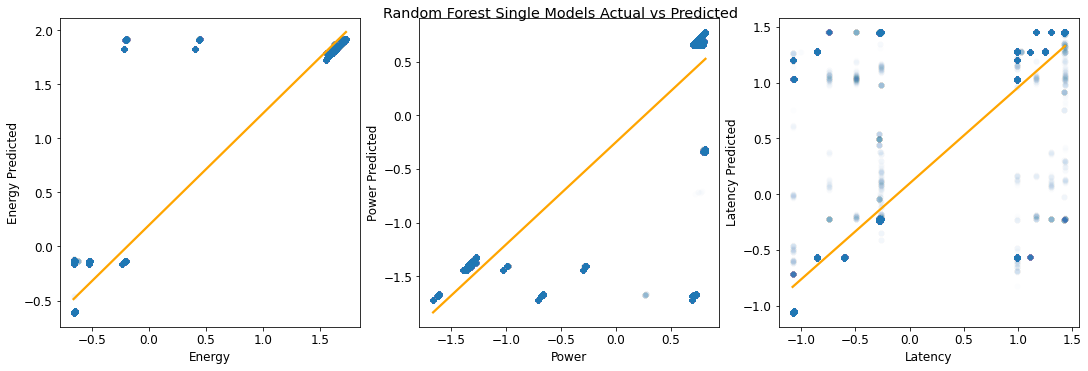

In [ ]:
# Random Forest Graph
fig, ax = plt.subplots(figsize=(15,5))
plt.rcParams['font.size'] = 12
fig.tight_layout()
fig.suptitle("Random Forest Single Models Actual vs Predicted")
plt.subplot(1,3,1)
ax0 = sns.scatterplot(x='Energy', y='Energy Predicted', data=rf_single_target_evaluation_df, alpha=.01)
sns.regplot(x='Energy', y='Energy Predicted',
            scatter=False, data=rf_single_target_evaluation_df,
            ax=ax0, color="orange")

plt.subplot(1,3,2)
ax1 = sns.scatterplot(x='Power', y='Power Predicted', data=rf_single_target_evaluation_df, alpha=.01)
sns.regplot(x='Power', y='Power Predicted',
            scatter=False, data=rf_single_target_evaluation_df,
            ax=ax1, color="orange")

plt.subplot(1,3,3)
ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=rf_single_target_evaluation_df, alpha=.01)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=rf_single_target_evaluation_df,
            ax=ax2, color="orange")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Latency Predicted', ylabel='Density'>

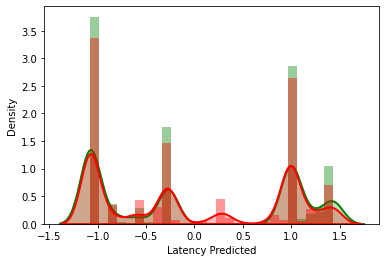

In [ ]:
sns.distplot(rf_single_target_evaluation_df['Latency'], hist = True, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2},
                label = "Non-Normal", color ="green")

sns.distplot(rf_single_target_evaluation_df['Latency Predicted'], hist = True, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2},
                label = "Non-Normal", color ="red")

## Plot Results of all Models

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


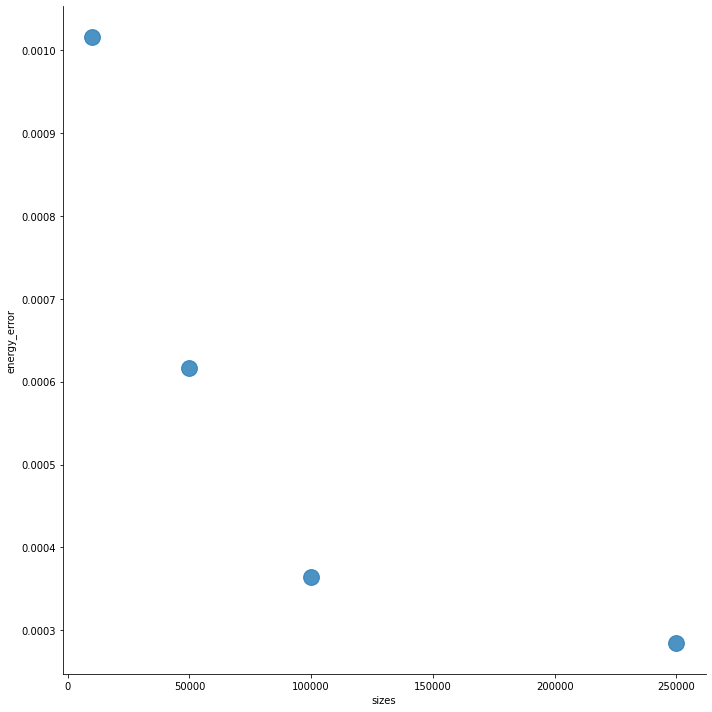

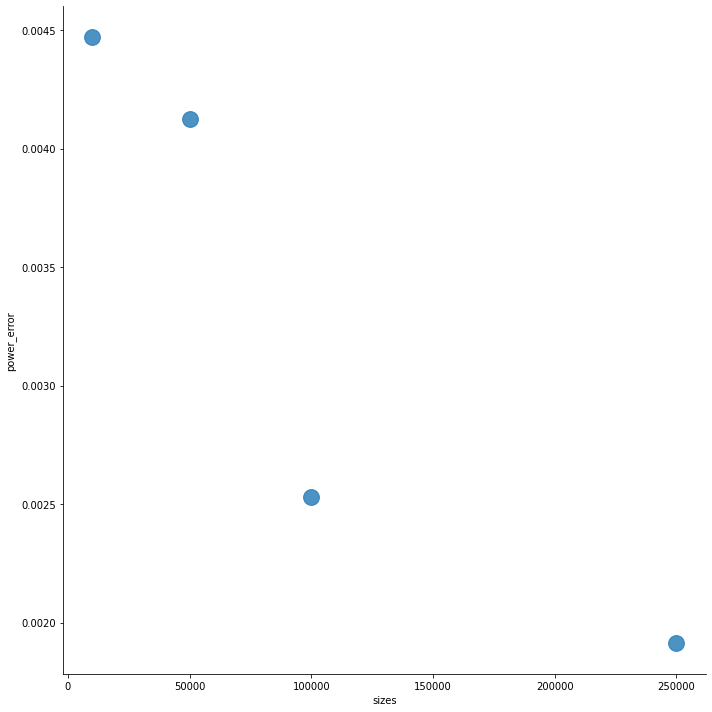

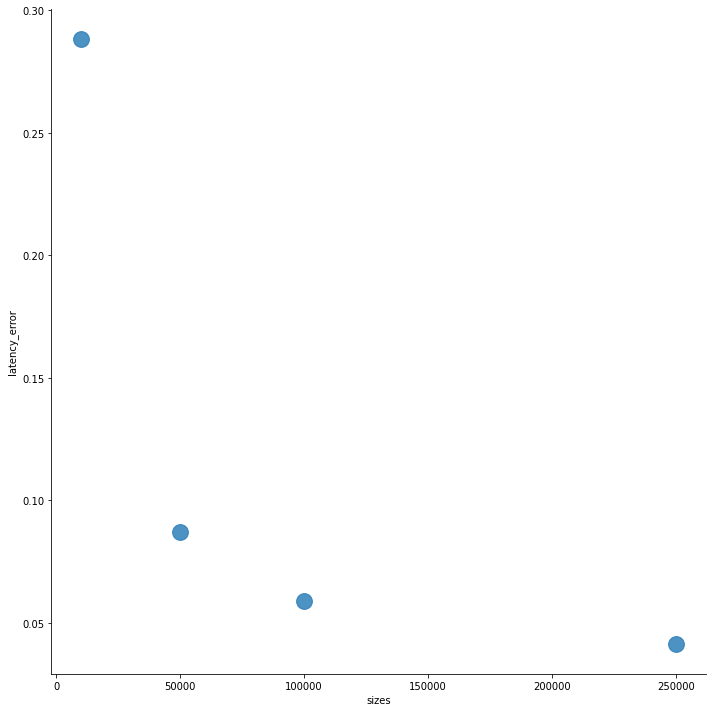

In [ ]:
error_groups = ['energy','power','latency', 'energy','power','latency', 'energy','power','latency', 'energy','power','latency']
error = [1.0322e-06, 2e-05, .08308, 3.80083173e-07, 1.7001321243e-05, .00761, 1.32365656e-07, 6.410489761e-06, .0035, 8.0763227e-08, 3.655856355e-06, .00173]

for i in range(len(error)):
  error[i] = error[i]**.5

sizes = [10000, 10000, 10000, 50000, 50000, 50000, 100000, 100000, 100000, 250000, 250000, 250000]

error_df = pd.DataFrame({'energy_error': error[::3], 'power_error': error[1::3], 'latency_error': error[2::3], 'sizes':sizes[::3]})

# Random Forest Graph
# fig, ax = plt.subplots(figsize=(15,15))
# fig.suptitle("Energy Error (RMSE) vs Sample Size")
# plt.subplot(1,3,1)
sns.lmplot('sizes', 'energy_error', data=error_df, fit_reg=False, height=10, markers=["o"], scatter_kws={"s": 250})


# plt.subplot(1,3,2)
sns.lmplot('sizes', 'power_error', data=error_df, fit_reg=False, height=10, markers=["o"], scatter_kws={"s": 250})


# plt.subplot(1,3,3)
sns.lmplot('sizes', 'latency_error', data=error_df, fit_reg=False, height=10, markers=["o"], scatter_kws={"s": 250})


# rf_results_df = pd.DataFrame({'error': error, 'sizes':sizes, 'group': error_groups})

# plt.figure(figsize=(15,10))
# ax = sns.lmplot('sizes', 'error', data=rf_results_df, fit_reg=False, height=10, hue='group', markers=["o","x","1"], scatter_kws={"s": 250})

# ax.set(xlabel='Sample Size Per Algorithm', ylabel='Mean Squared Error', title='Random Forest Error as Sample Size Increases')
# plt.show()

## Picture Ready Images

Settings

In [ ]:
!pip install -U --force-reinstall matplotlib

In [ ]:
!pip install -U --force-reinstall seaborn

In [155]:
def load_rf_saved_model(sample_size, additional_info=''):
  # Create path to model
  energy_path = os.path.join(PROXY_MODEL_DIRECTORY, 'energy_rf_model_'+str(data_sample_sizes_per_algorithm[sample_size])+additional_info+'.save')
  power_path = os.path.join(PROXY_MODEL_DIRECTORY, 'power_rf_model_'+str(data_sample_sizes_per_algorithm[sample_size])+additional_info+'.save')
  latency_path = os.path.join(PROXY_MODEL_DIRECTORY, 'latency_rf_model_'+str(data_sample_sizes_per_algorithm[sample_size])+additional_info+'.save')

  # Load Models
  rf_energy = pickle.load(open(energy_path, 'rb'))
  rf_power = pickle.load(open(power_path, 'rb'))
  rf_latency = pickle.load(open(latency_path, 'rb'))

  return rf_energy, rf_power, rf_latency

Actual vs Predicted

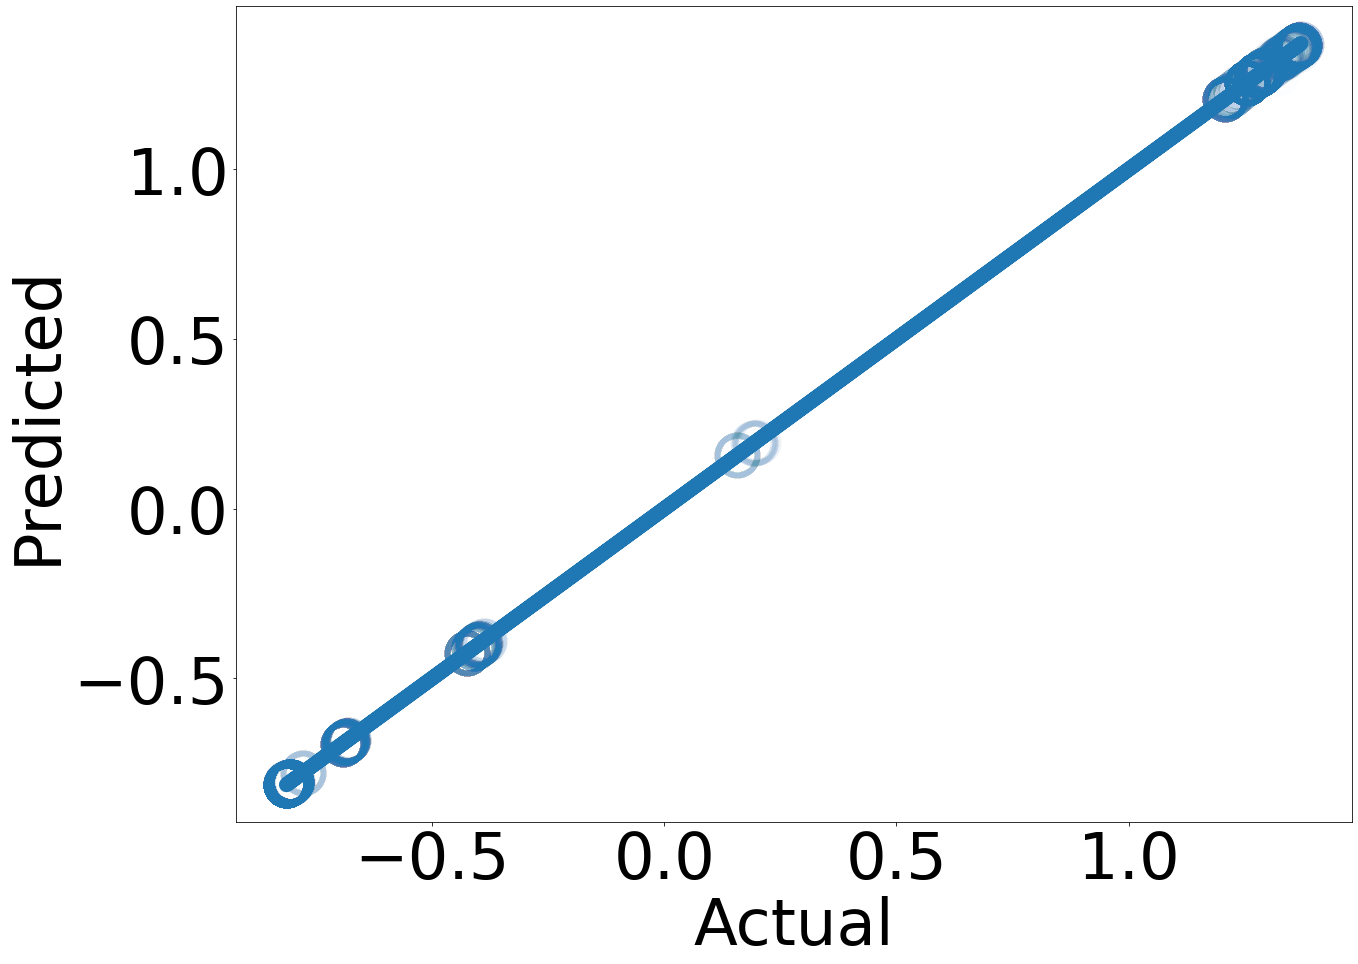

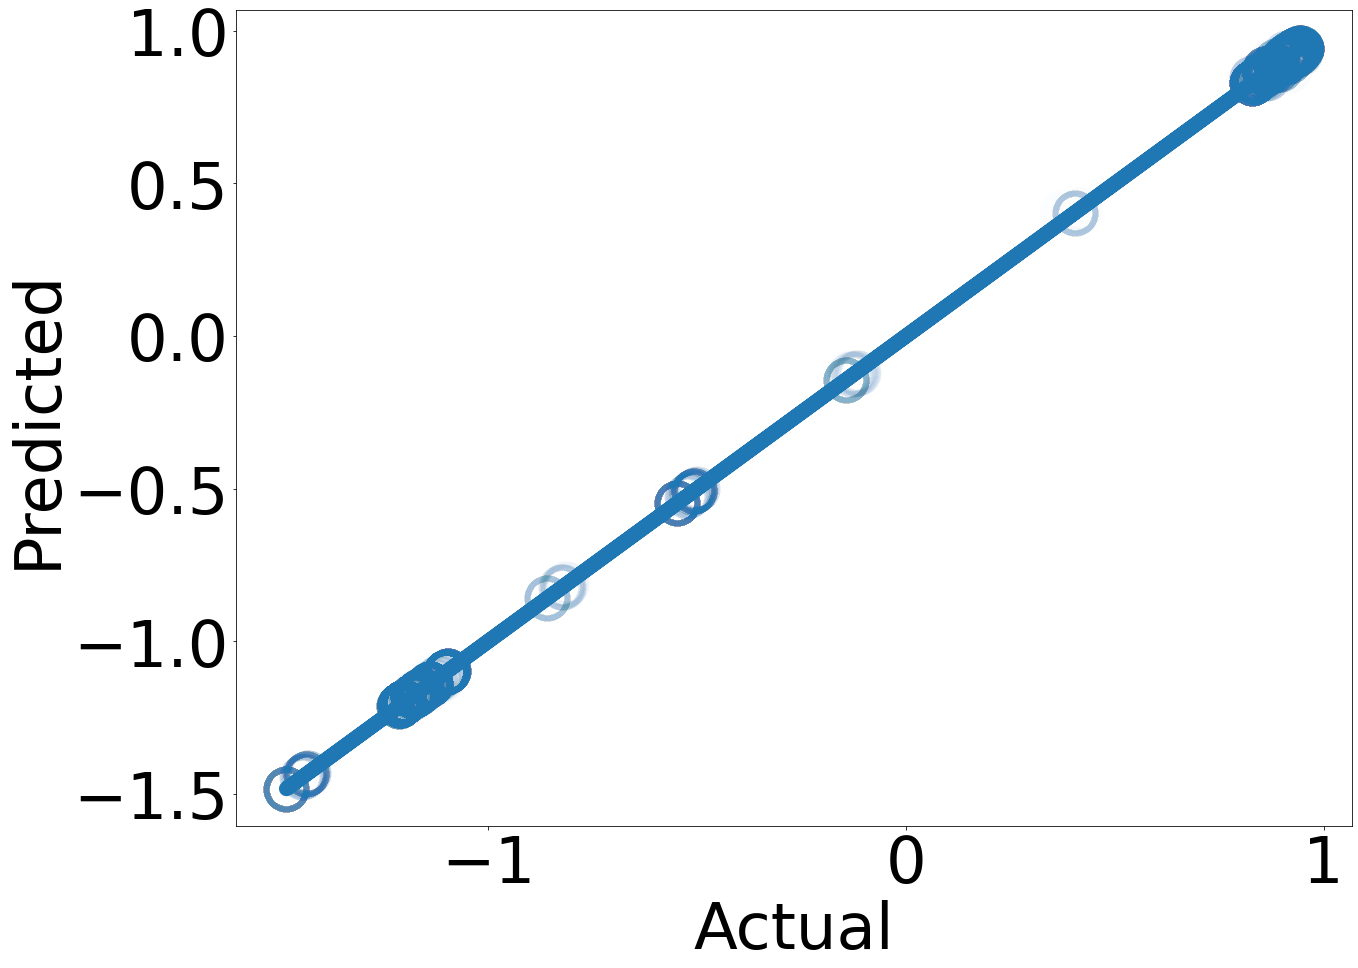

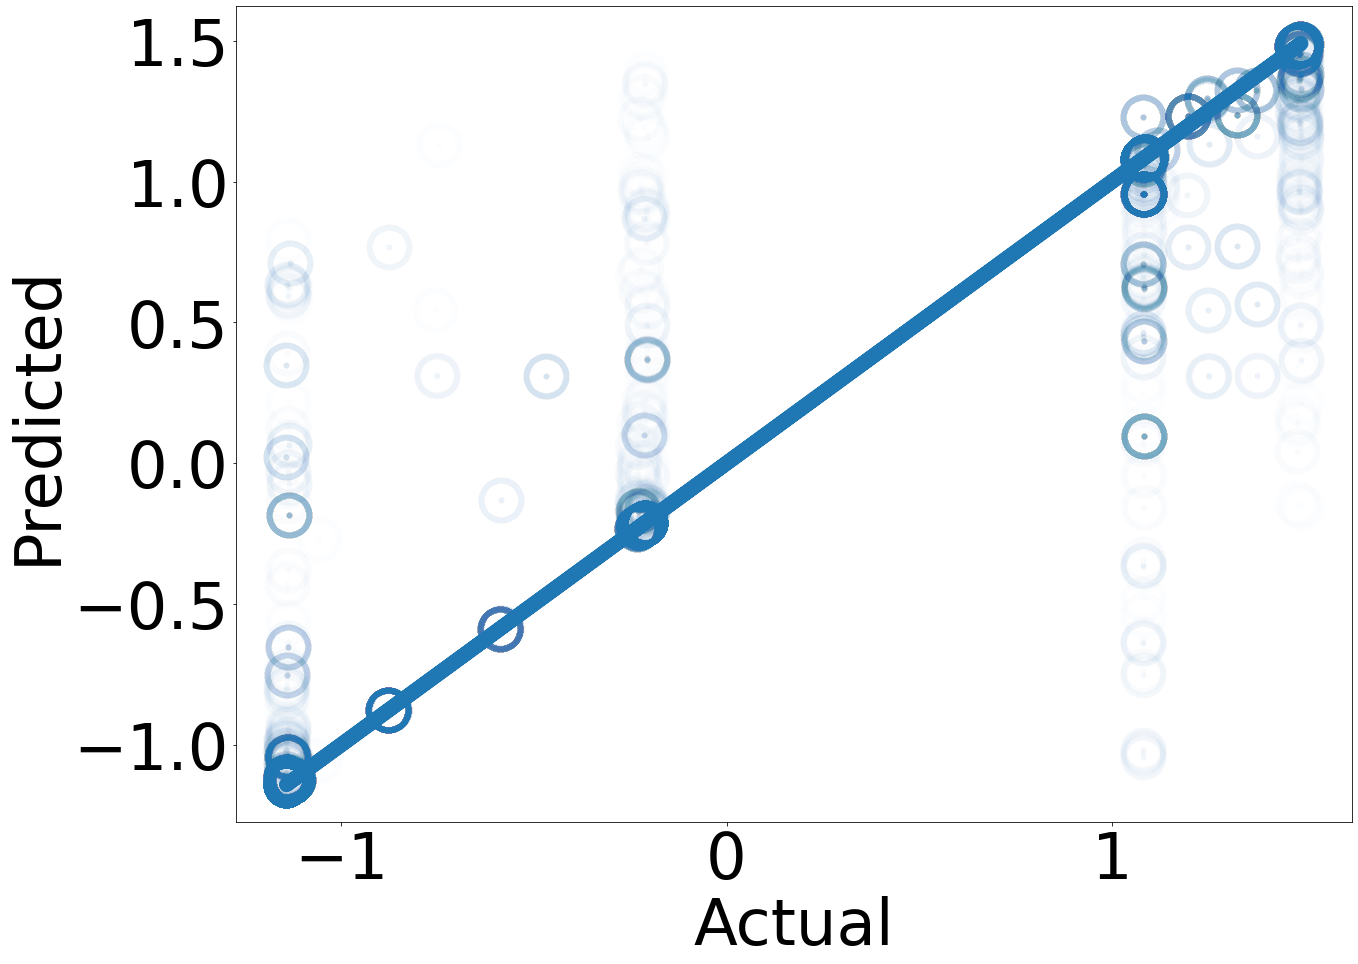

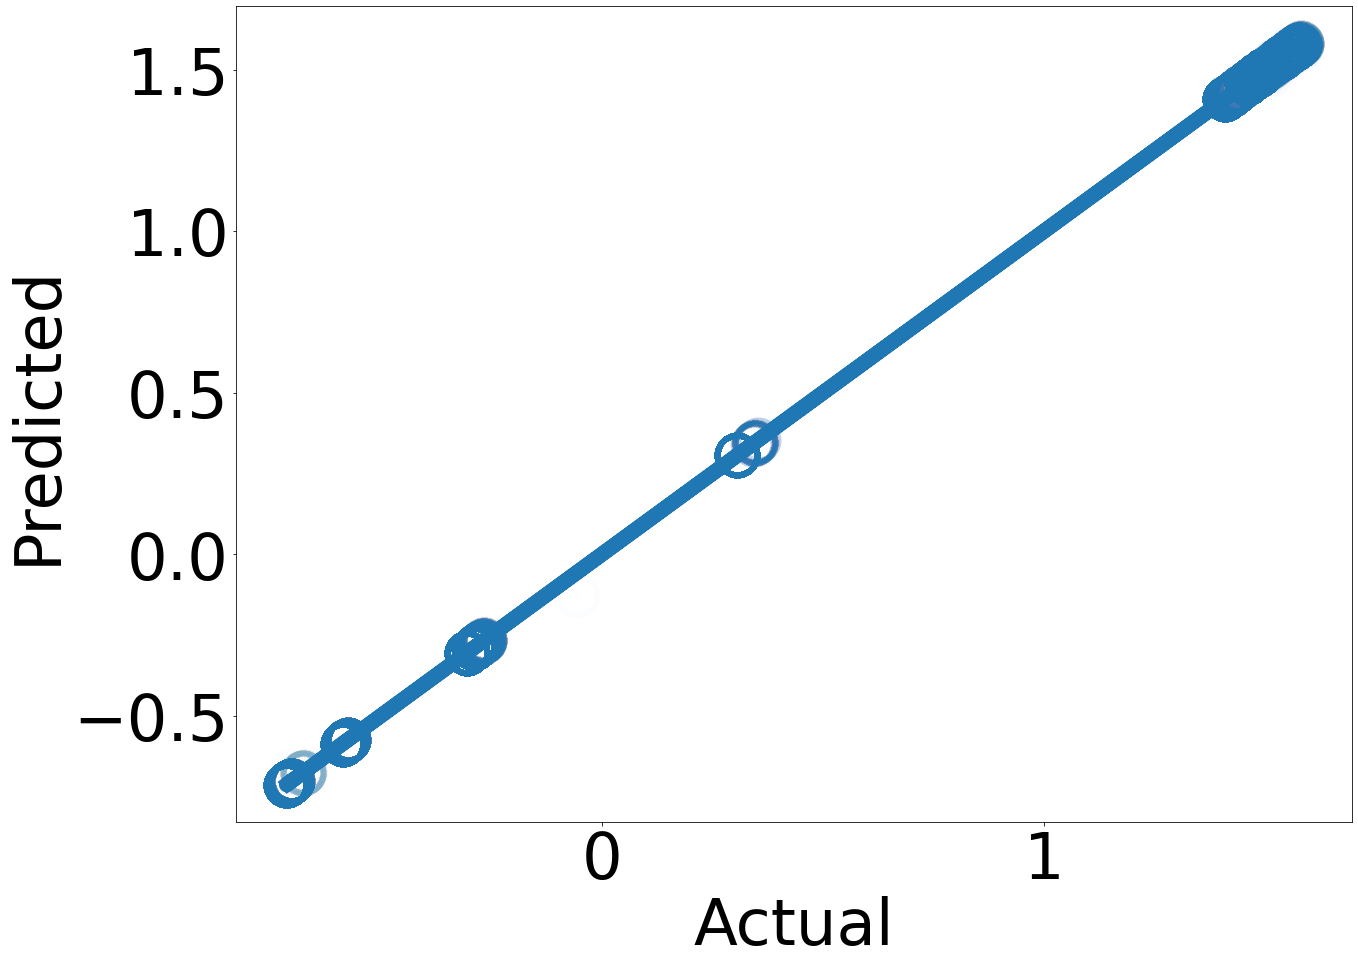

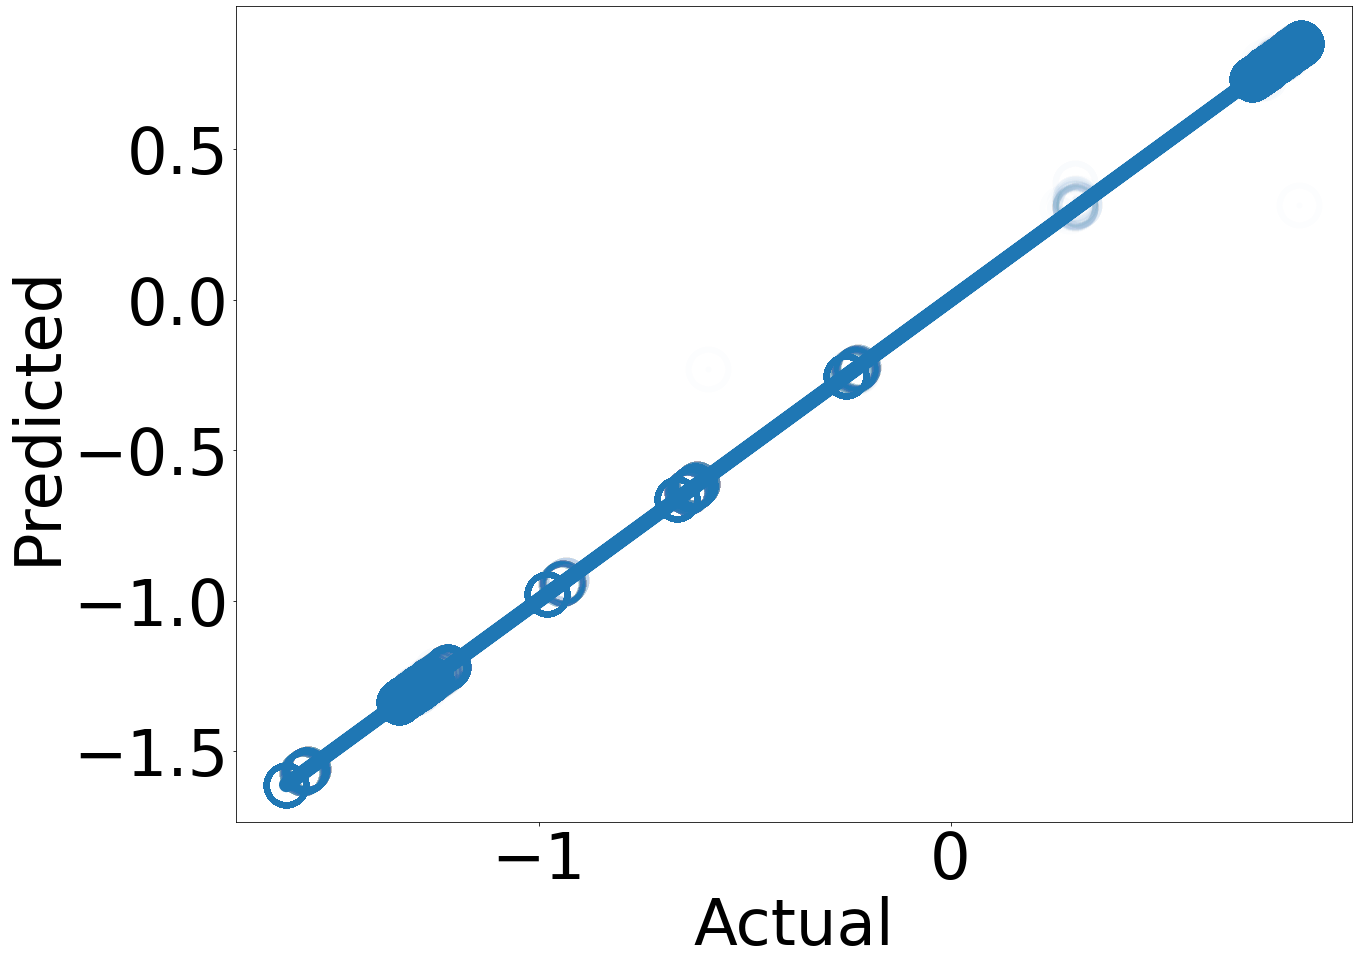

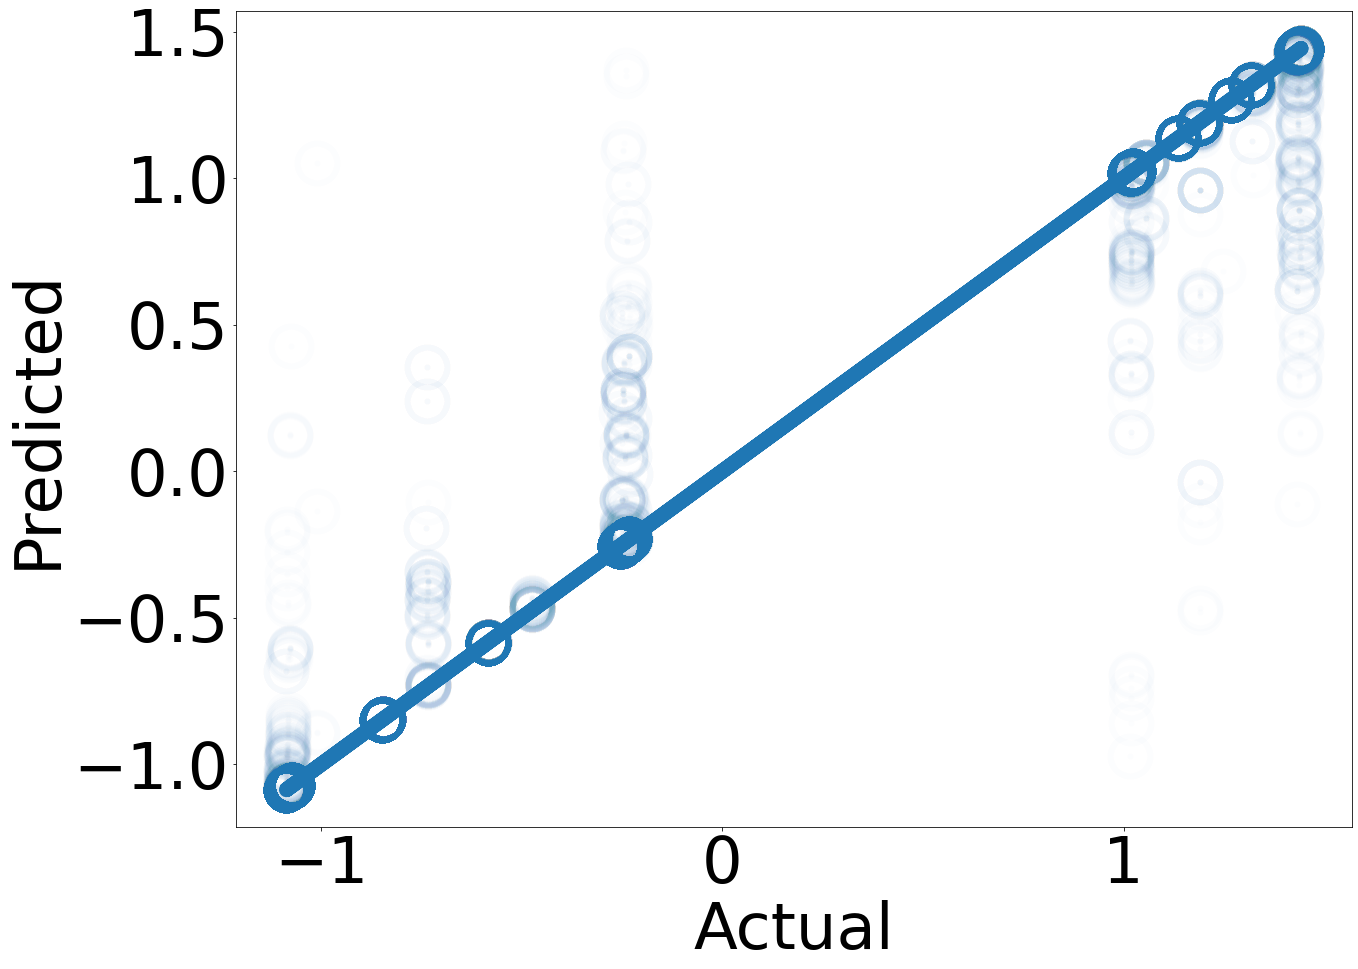

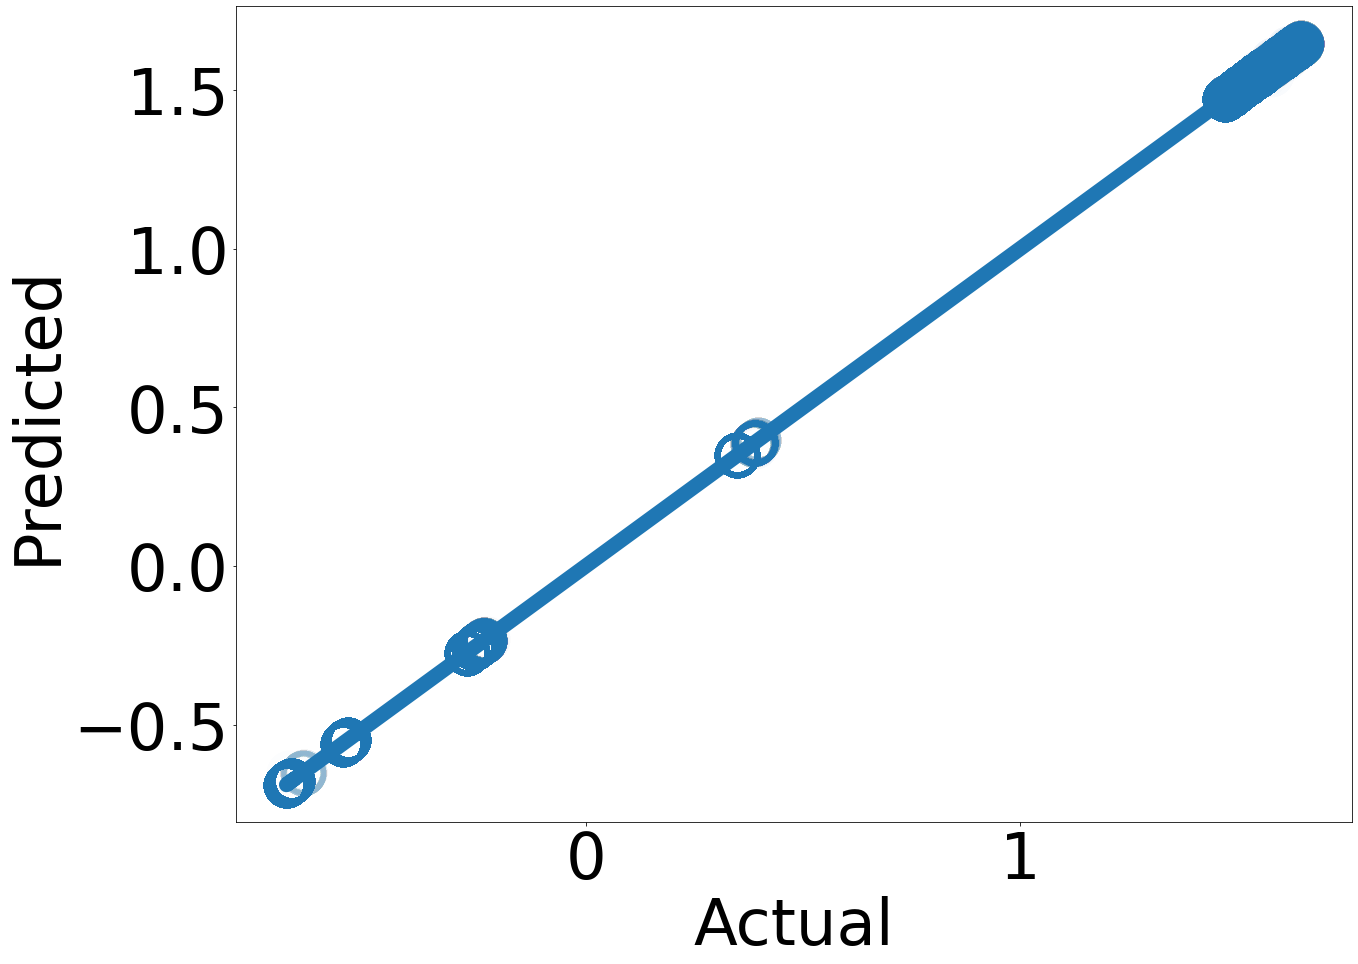

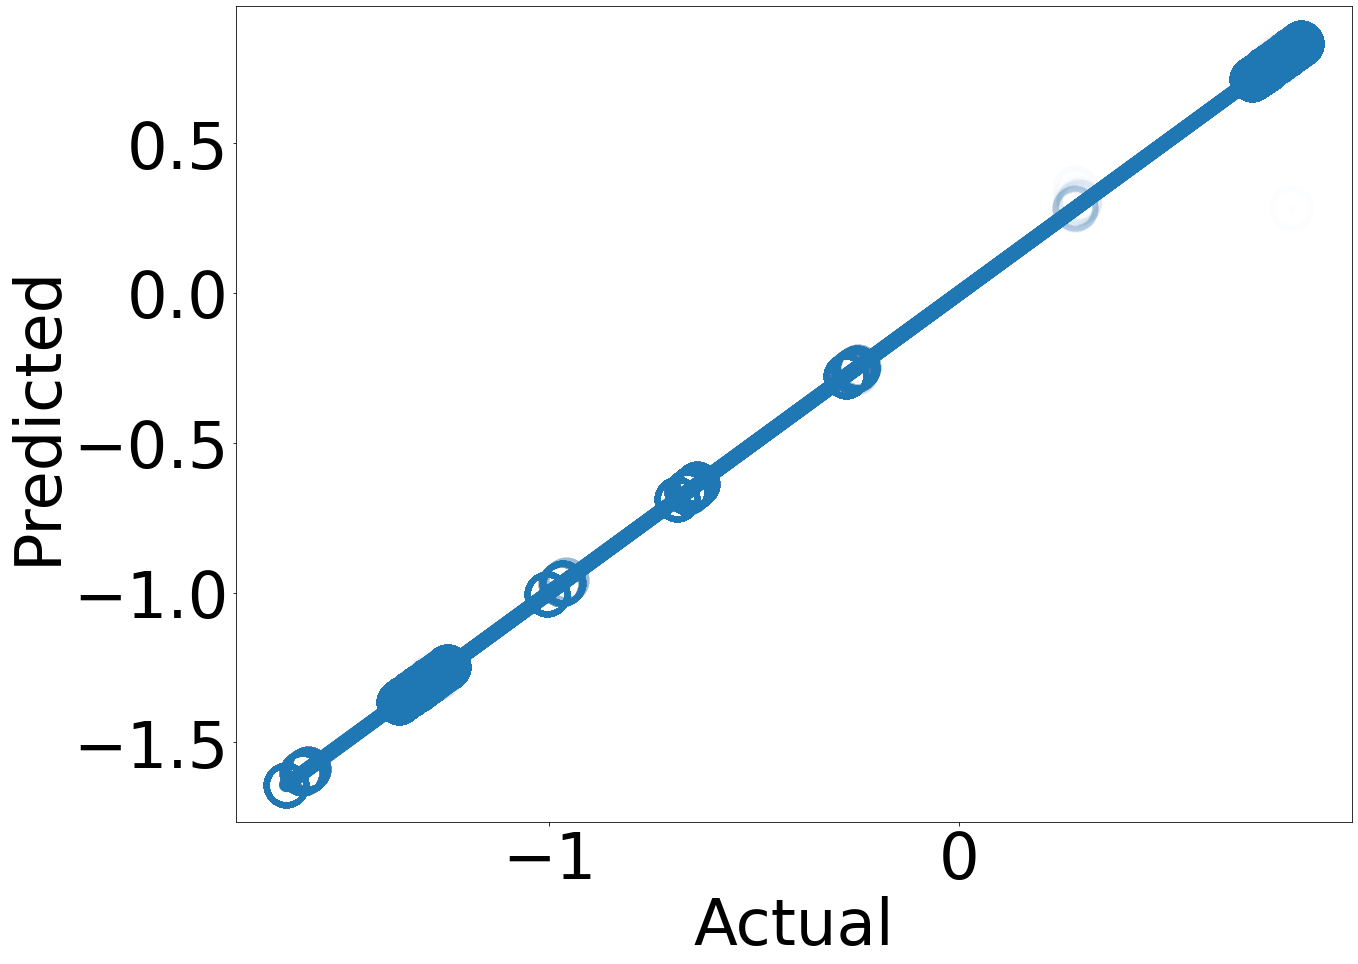

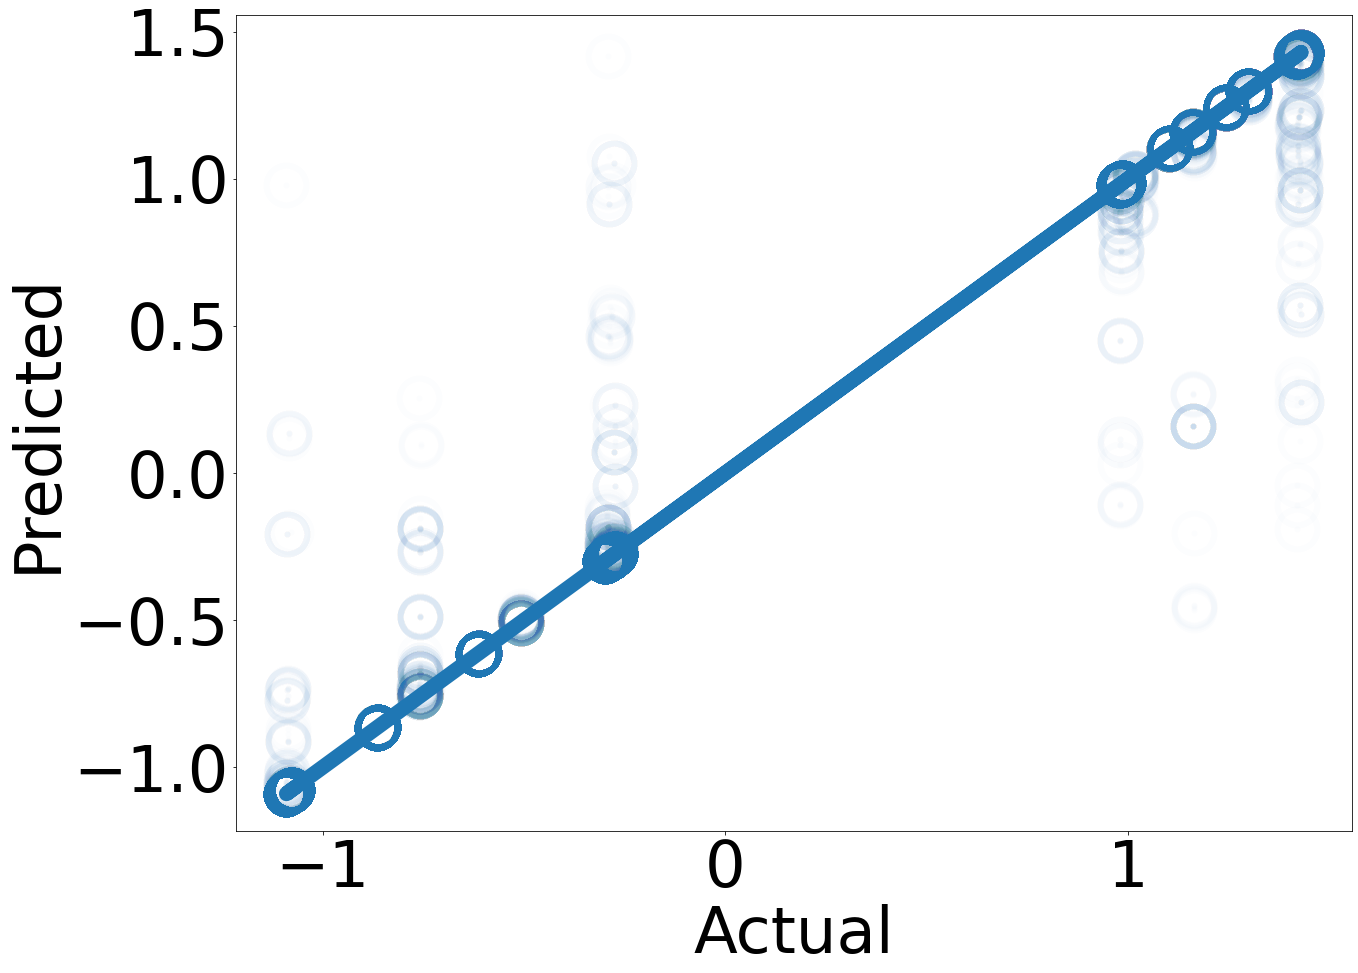

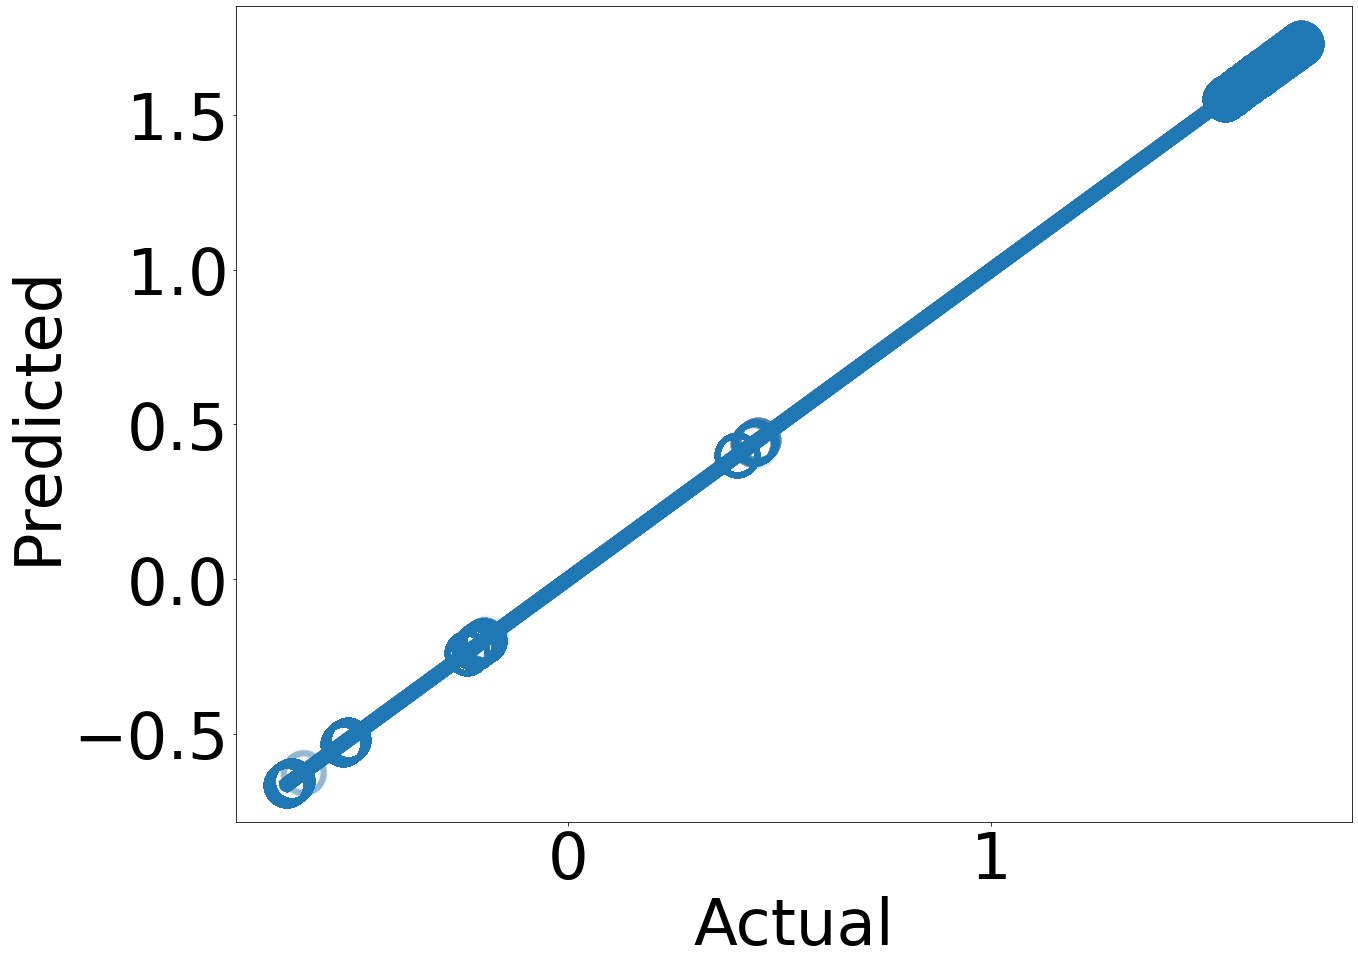

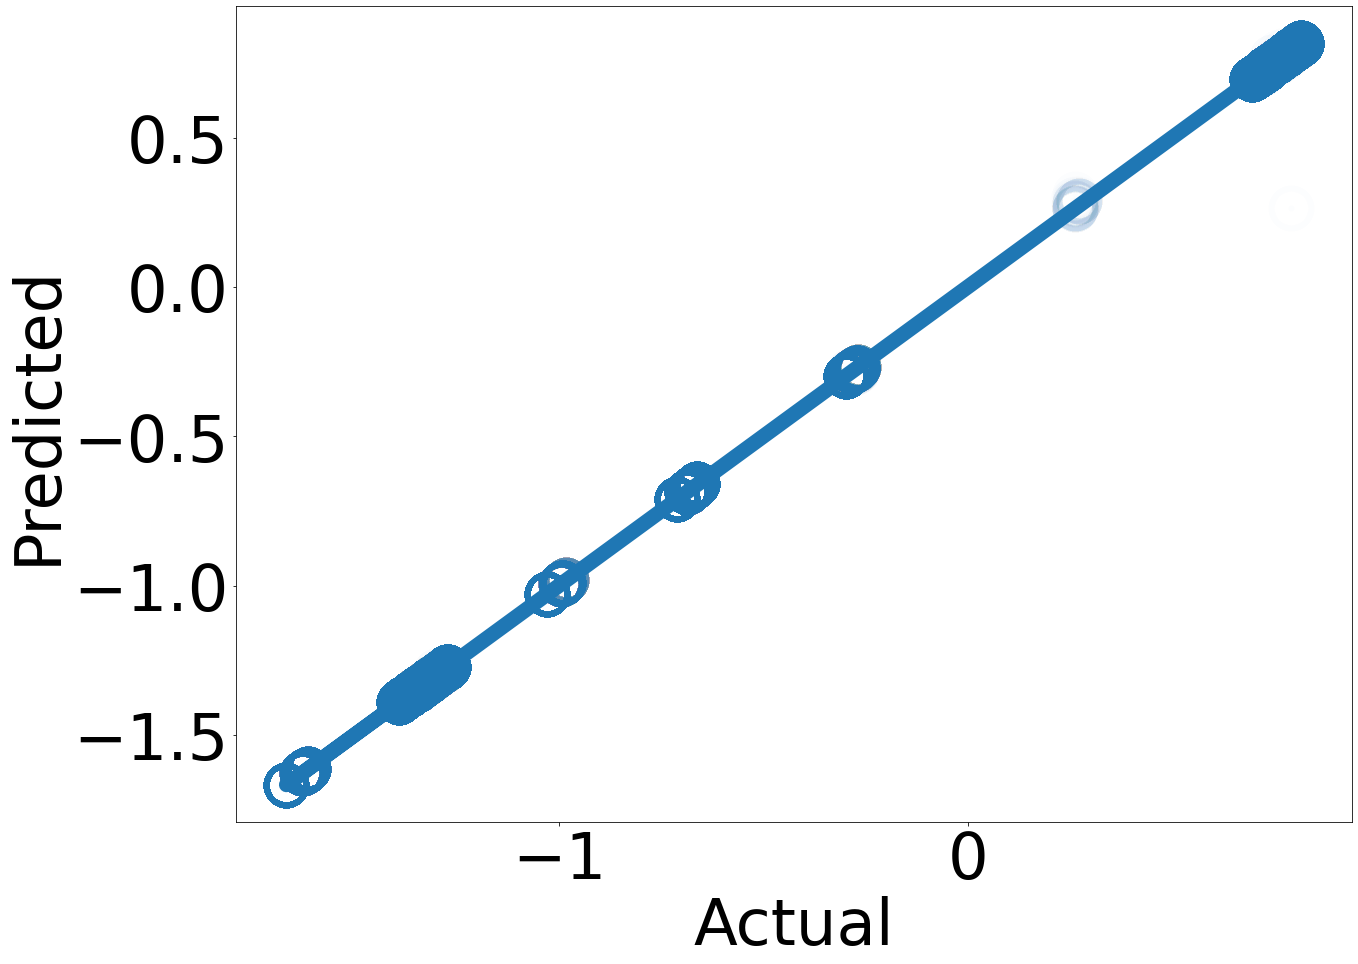

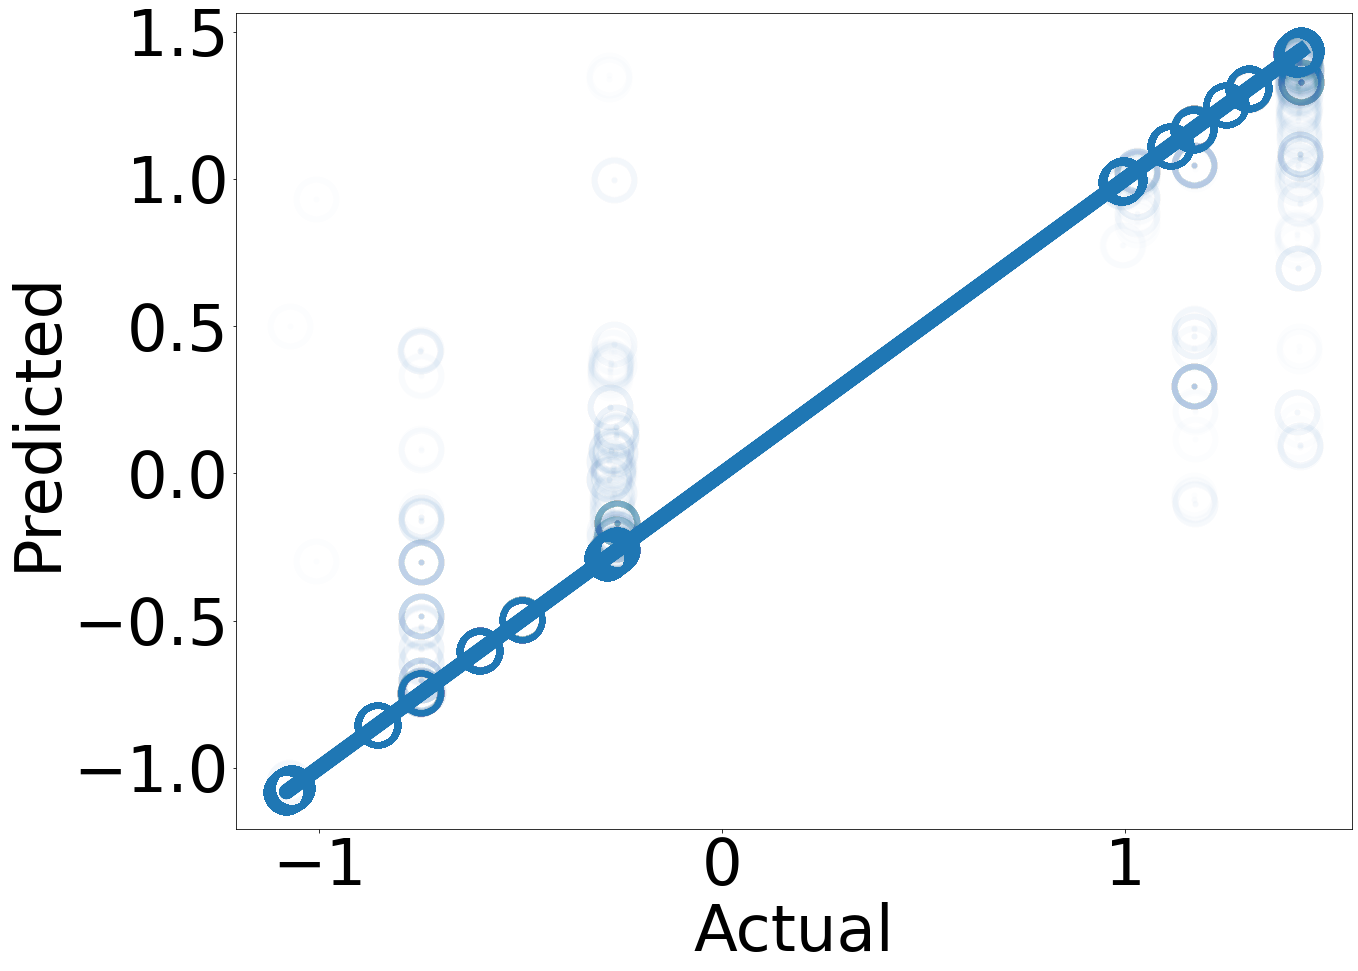

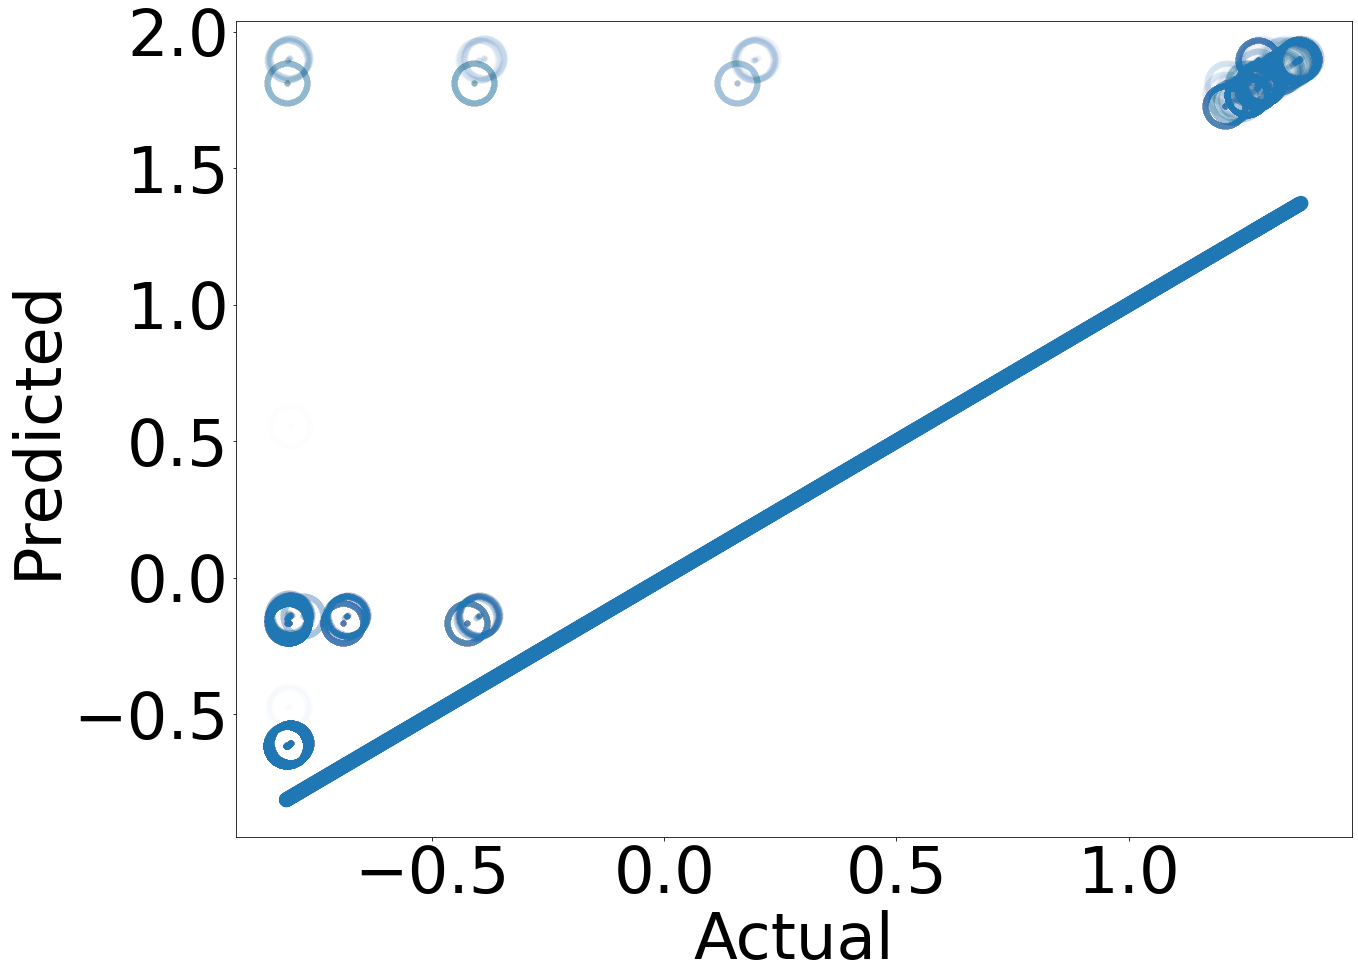

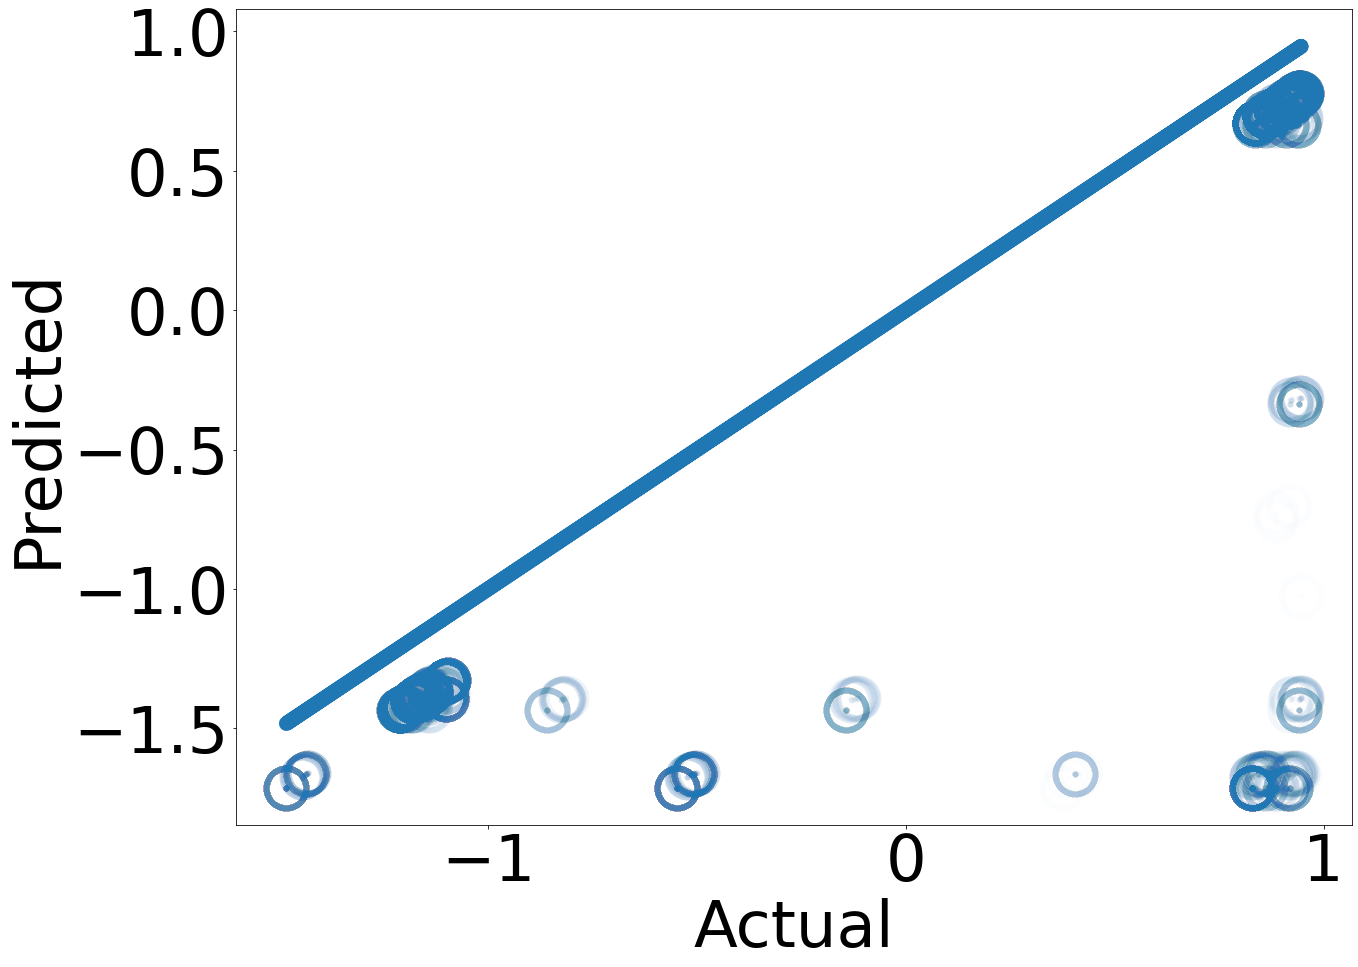

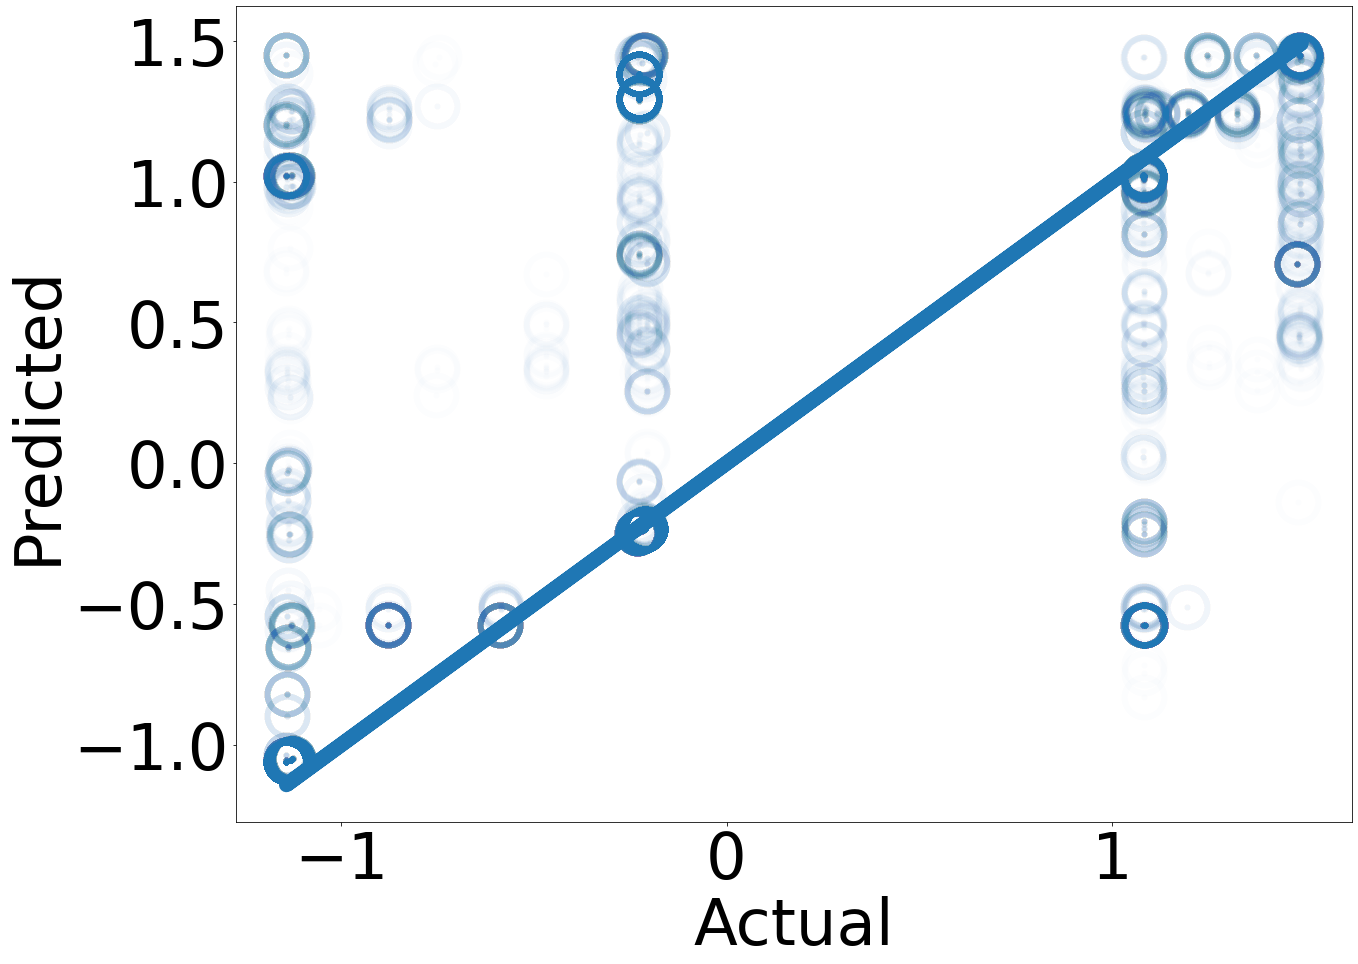

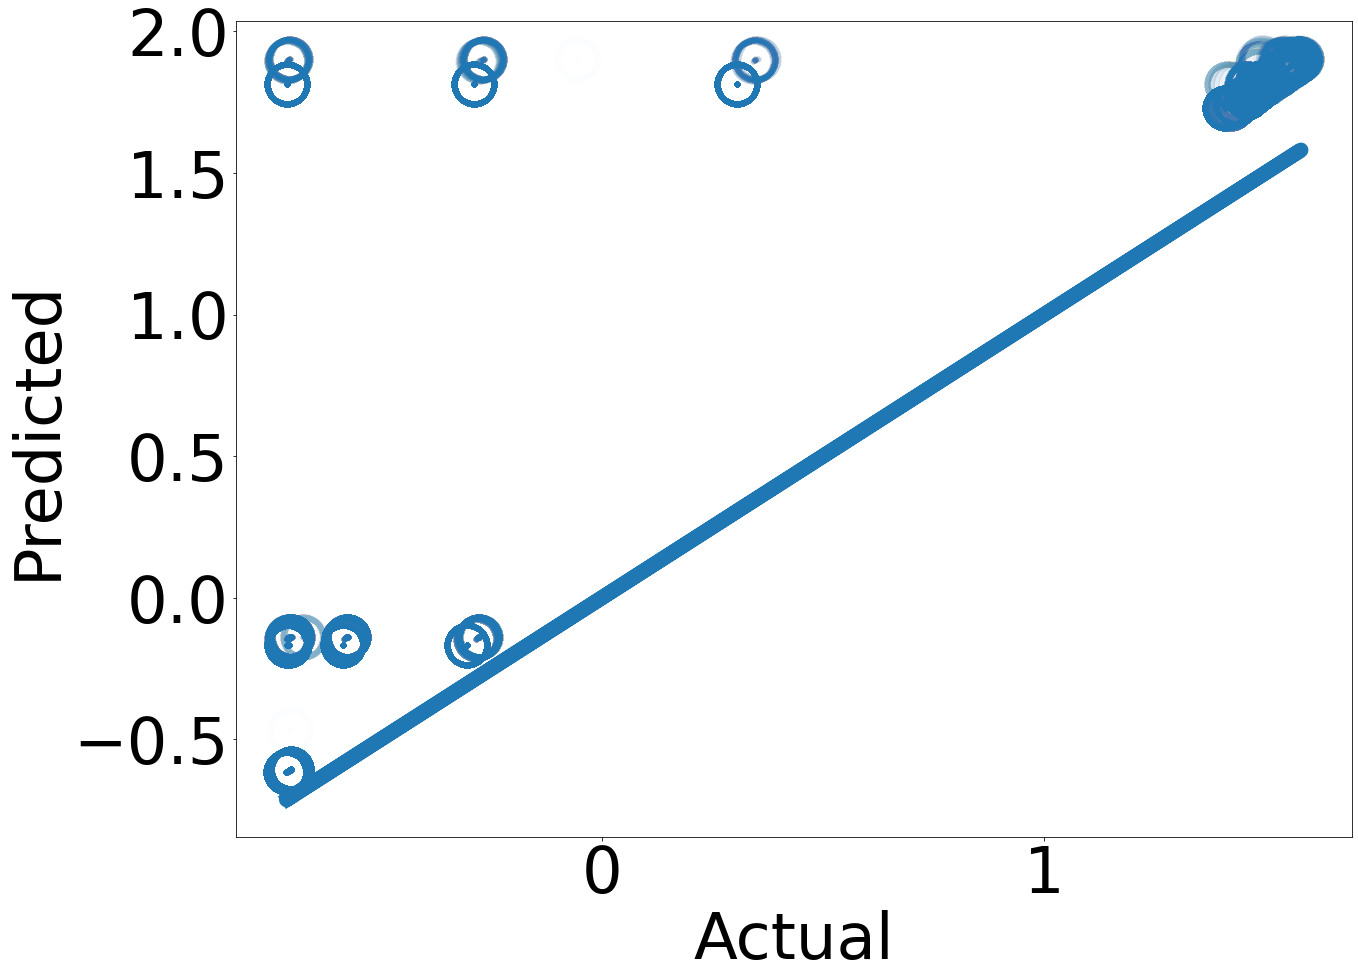

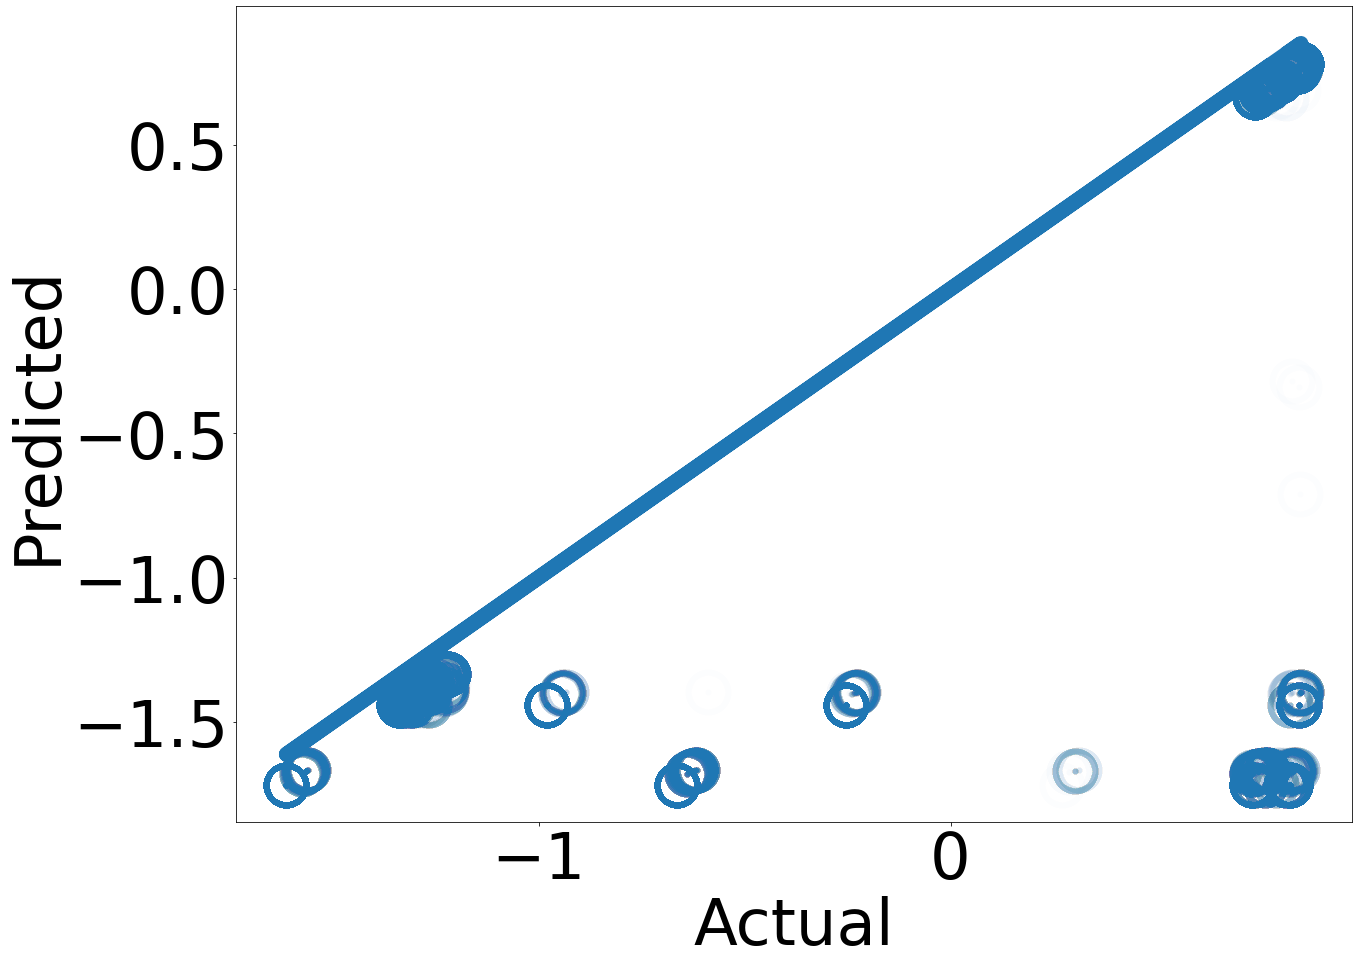

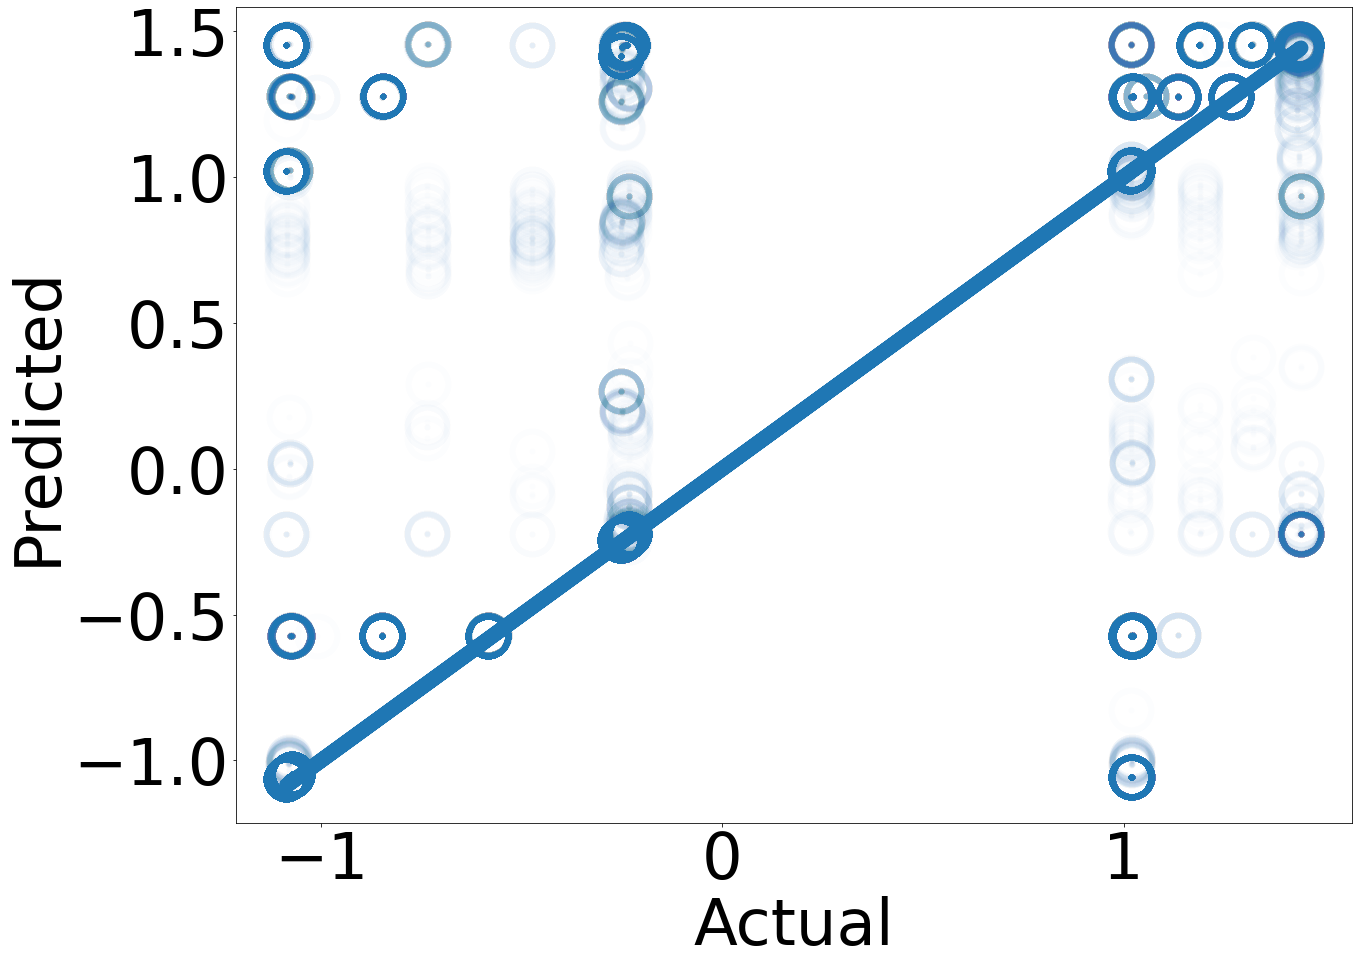

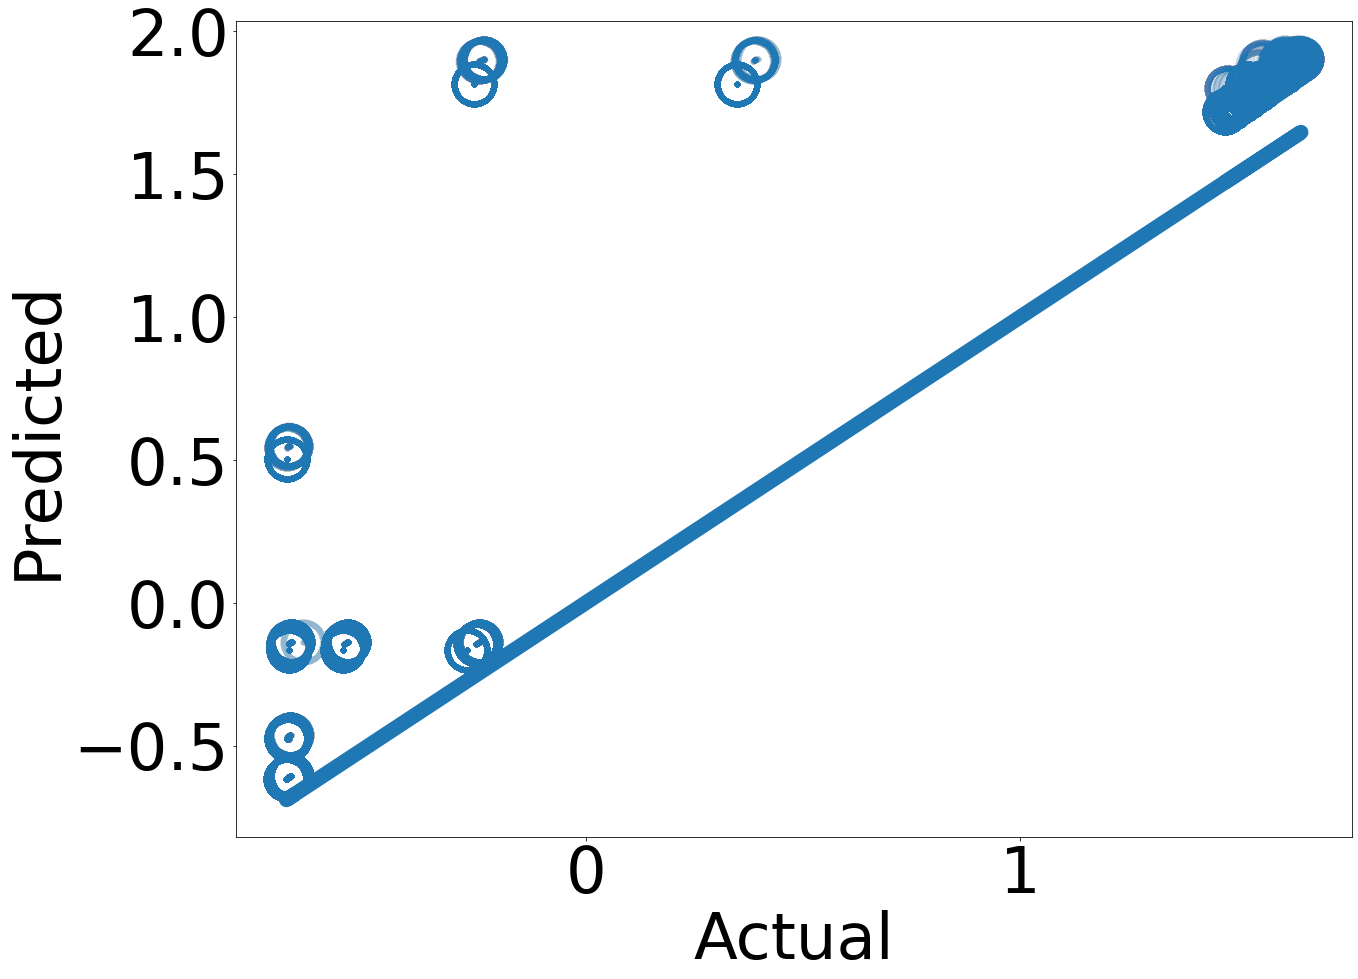

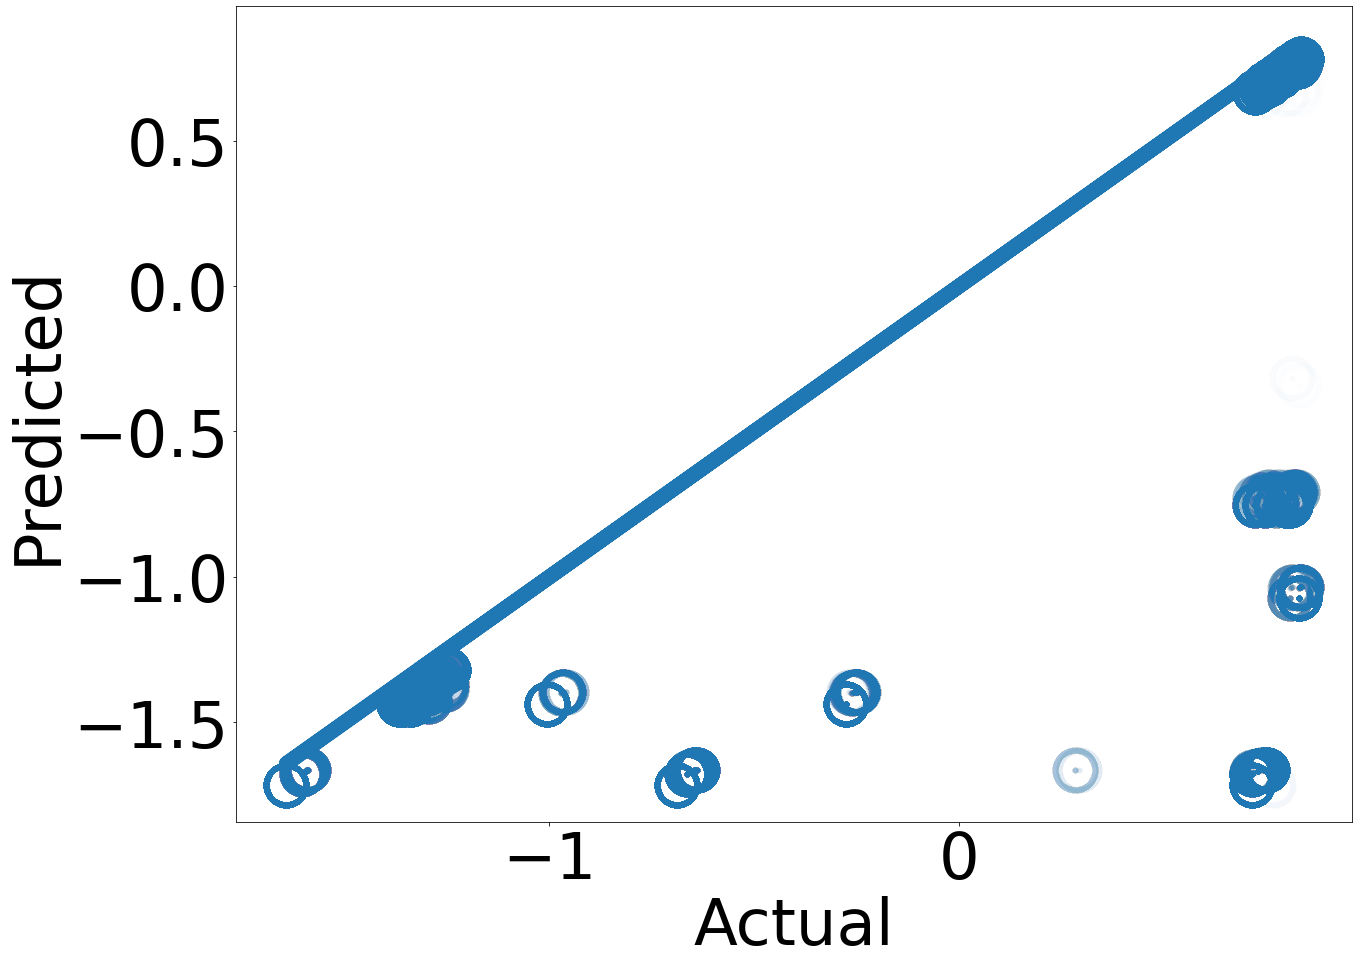

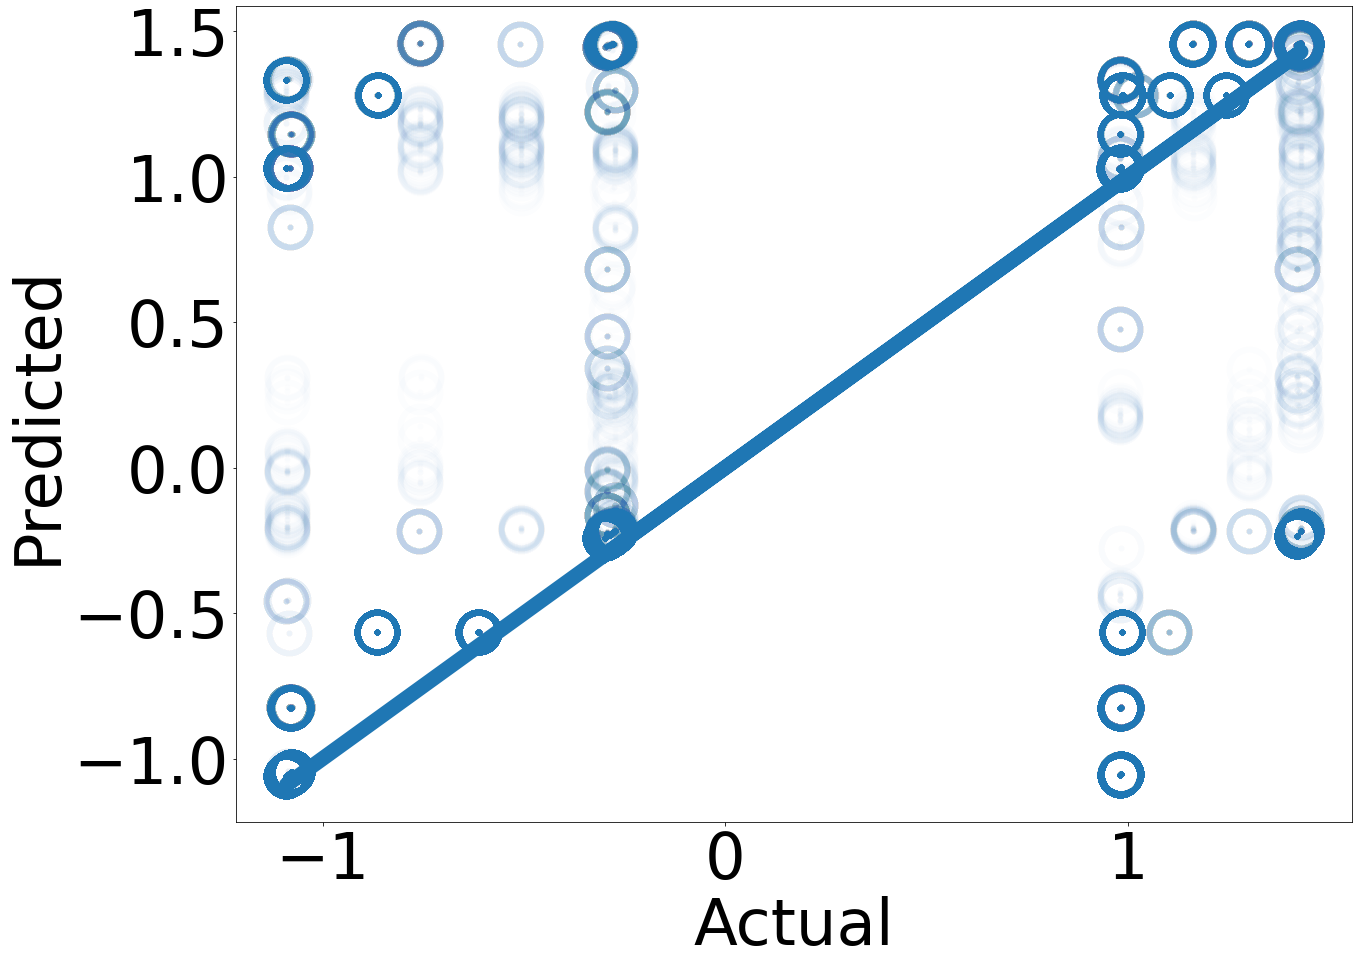

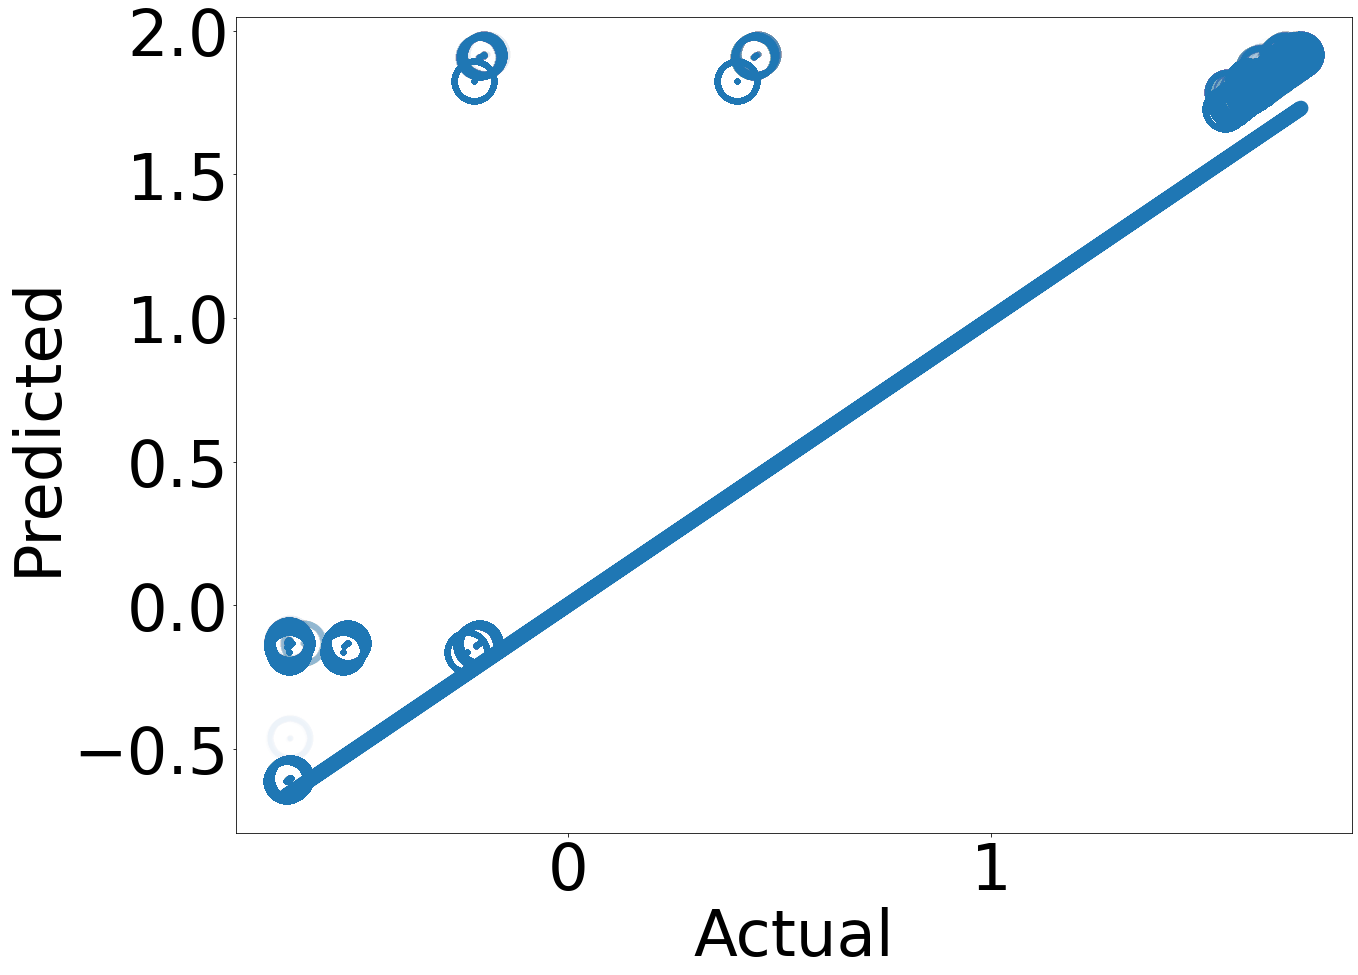

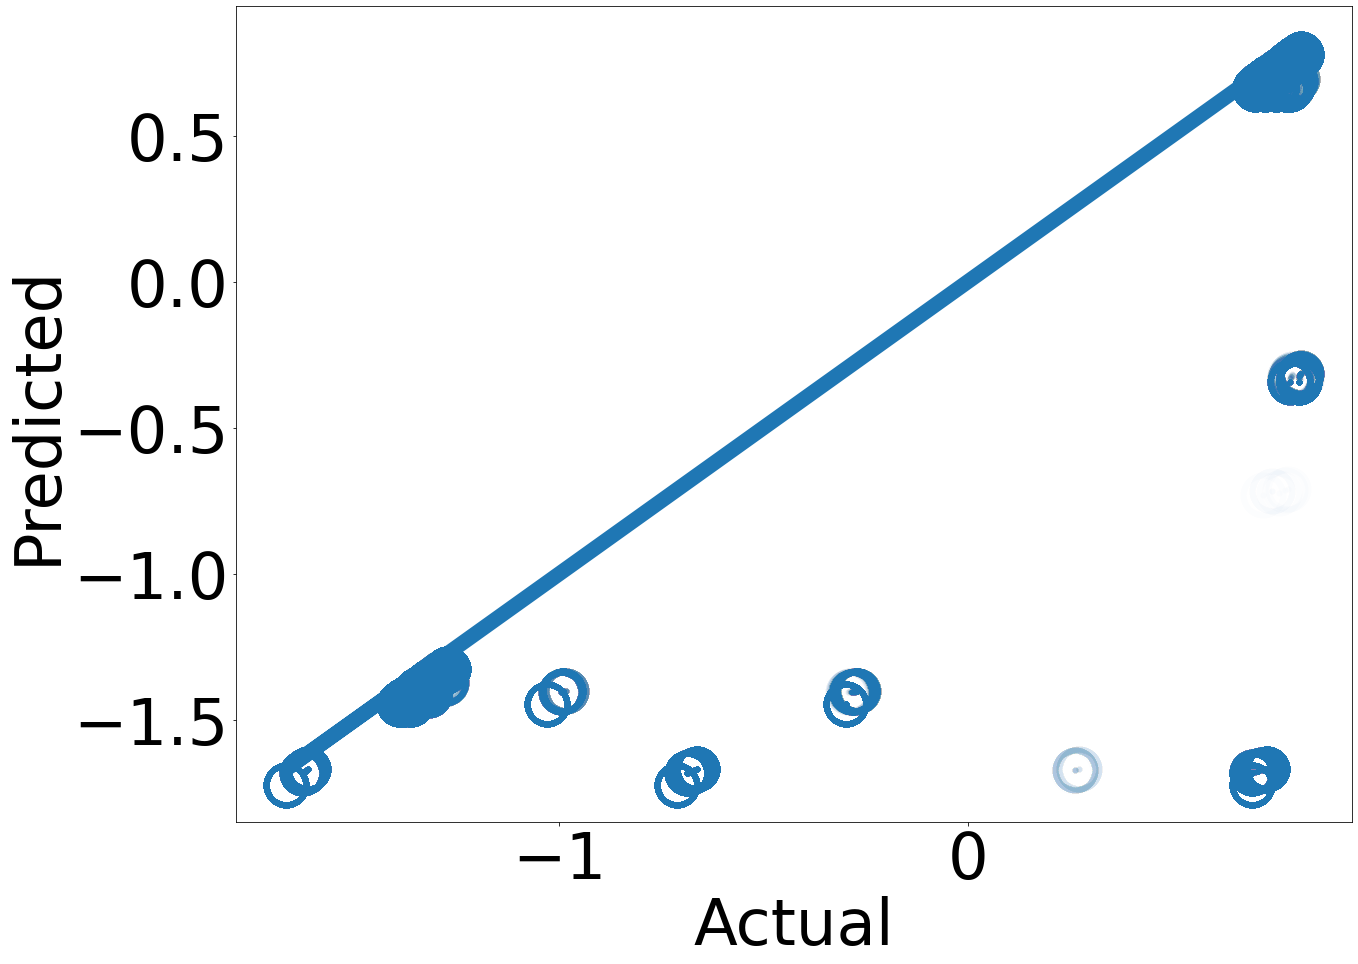

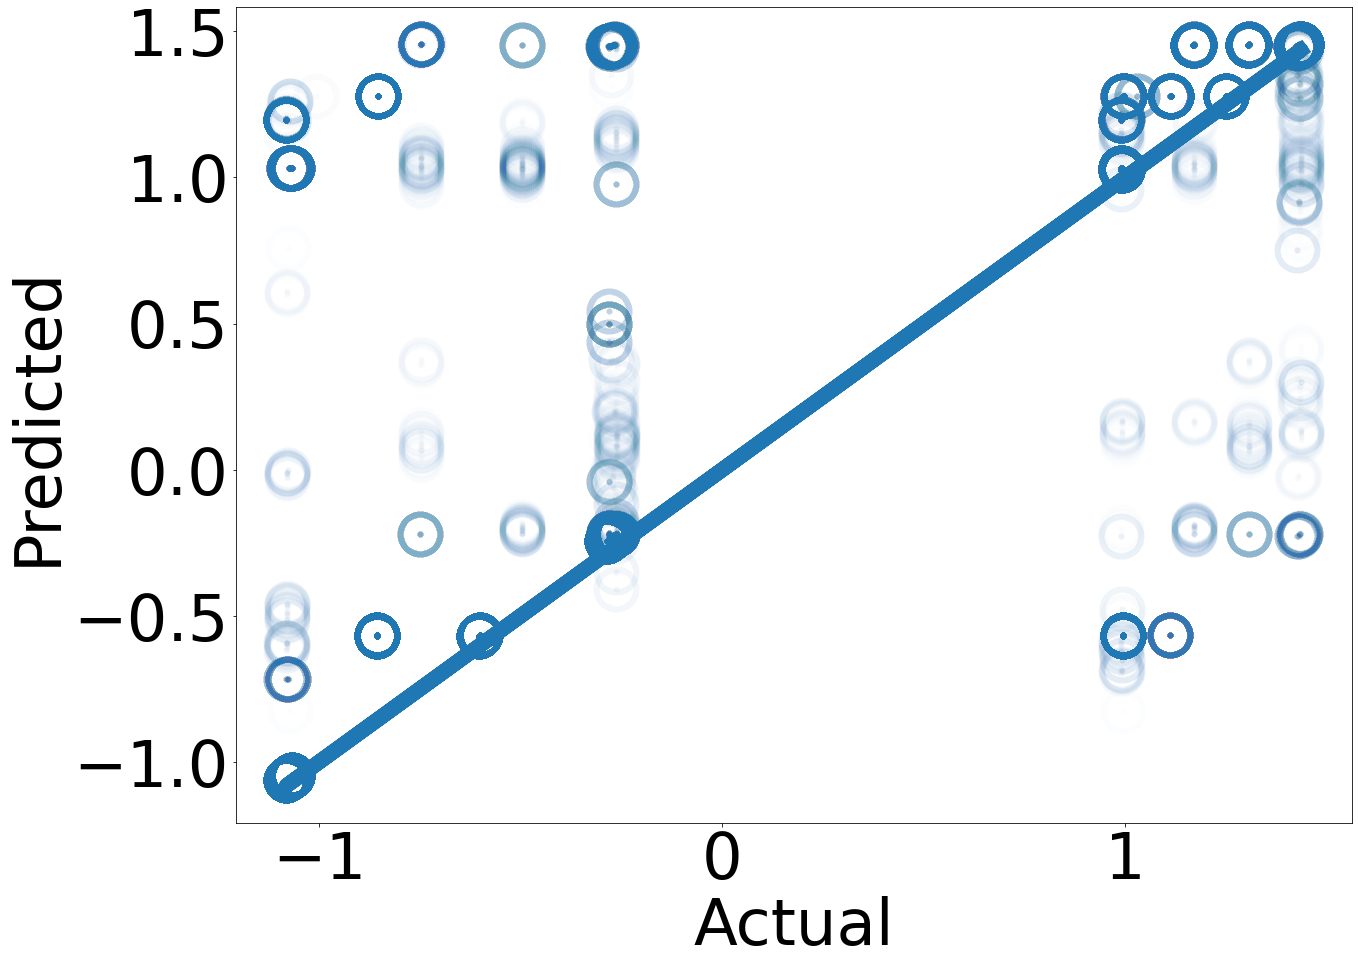

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

remove_sample_sizes = [1000000]

for samp_size in range(len(data_sample_sizes_per_algorithm)):

  # Don't plot some sample sizes
  if data_sample_sizes_per_algorithm[samp_size] in remove_sample_sizes:
    continue
  
  # Check which model you are loading. 
  if algorithms_in_each_sample[samp_size][0] == 'all':
    e_model, p_model, l_model = load_rf_saved_model(samp_size)
    # Evaluate on the test dataset for this sample
    eval_dataset = samp_size
  else:
    # ASSUME DATASET ONLY HAS ONE ALGO
    algo_used = algorithms_in_each_sample[samp_size][0].upper()
    e_model, p_model, l_model = load_rf_saved_model(samp_size,
                                                    additional_info='_'+algo_used)
    # Evaluate on the test datset for the diverse sample
    eval_dataset = samp_size - 5 #CHANGE WHEN data_sample_sizes_per_algorithm changes!!!

  # Avaluate 
  e_pred = e_model.predict(X_test_samples[eval_dataset])
  p_pred = p_model.predict(X_test_samples[eval_dataset])
  l_pred = l_model.predict(X_test_samples[eval_dataset])

  rf_pred_df = {'Energy Predicted': e_pred, 
                'Power Predicted': p_pred, 
                'Latency Predicted': l_pred}
  rf_pred_df = pd.DataFrame(rf_pred_df)
  rf_pred_df = y_test_reset_index_samples[eval_dataset].join(rf_pred_df)

  # Set Style
  # sns.set_style('white')
  # sns.set_context('talk')
  # sns.set_palette('colorblind')
  # sns.set(rc={'figure.dpi':100, 'savefig.dpi':300})

  # Energy
  fig, ax = plt.subplots(nrows=1, ncols=1)
  ax.set_facecolor('white')
  plt.rcParams['figure.figsize'] = (20,15)
  plt.rcParams['font.size'] = 64
  ax.spines['bottom'].set_color('black')
  ax.spines['left'].set_color('black')
  plt.scatter(x='Energy', y='Energy Predicted', data=rf_pred_df, linewidths=40, alpha=.01)
  plt.plot(rf_pred_df['Energy'], rf_pred_df['Energy'], linewidth=15)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.savefig('captures/energy_' + str(data_sample_sizes_per_algorithm[samp_size]) + '_' + algorithms_in_each_sample[samp_size][0] + '.png', bbox_inches="tight", dpi=300)
  plt.show()

  # Power
  fig, ax = plt.subplots(nrows=1, ncols=1)
  ax.set_facecolor('white')
  plt.rcParams['figure.figsize'] = (20,15)
  plt.rcParams['font.size'] = 64
  ax.spines['bottom'].set_color('black')
  ax.spines['left'].set_color('black')
  plt.scatter(x='Power', y='Power Predicted', data=rf_pred_df, linewidths=40, alpha=.01)
  plt.plot(rf_pred_df['Power'], rf_pred_df['Power'], linewidth=15)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.savefig('captures/power_' + str(data_sample_sizes_per_algorithm[samp_size]) + '_' + algorithms_in_each_sample[samp_size][0] + '.png', bbox_inches="tight", dpi=300)
  plt.show()

  # Latency
  fig, ax = plt.subplots(nrows=1, ncols=1)
  ax.set_facecolor('white')
  plt.rcParams['figure.figsize'] = (20,15)
  plt.rcParams['font.size'] = 64
  ax.spines['bottom'].set_color('black')
  ax.spines['left'].set_color('black')
  plt.scatter(x='Latency', y='Latency Predicted', data=rf_pred_df, linewidths=40, alpha=.01)
  plt.plot(rf_pred_df['Latency'], rf_pred_df['Latency'], linewidth=15)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.savefig('captures/latency_' + str(data_sample_sizes_per_algorithm[samp_size]) + '_' + algorithms_in_each_sample[samp_size][0] + '.png', bbox_inches="tight", dpi=300)
  plt.show()

RMSE vs Sample Size

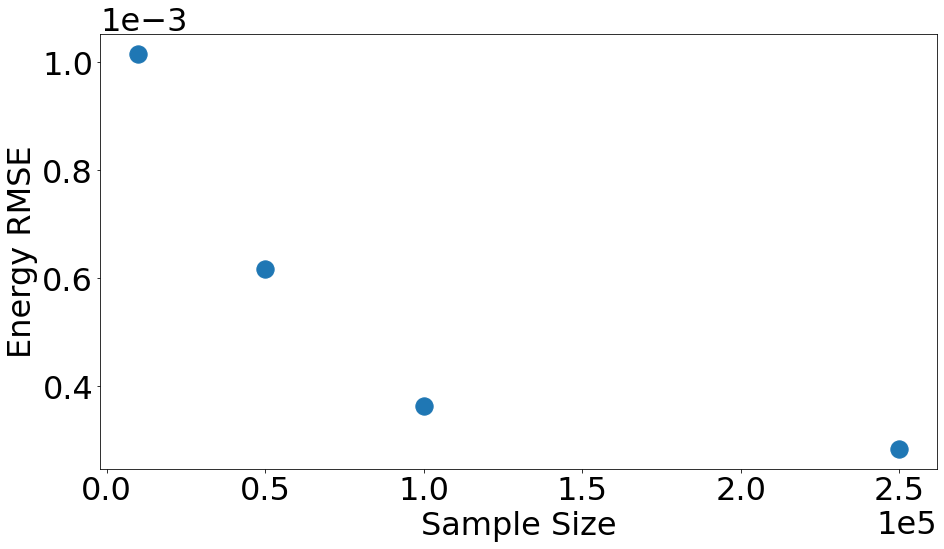

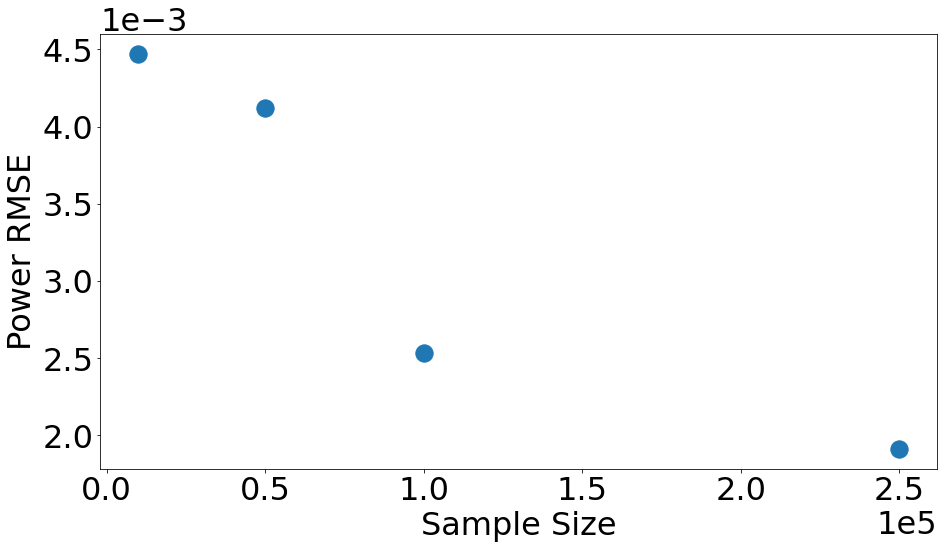

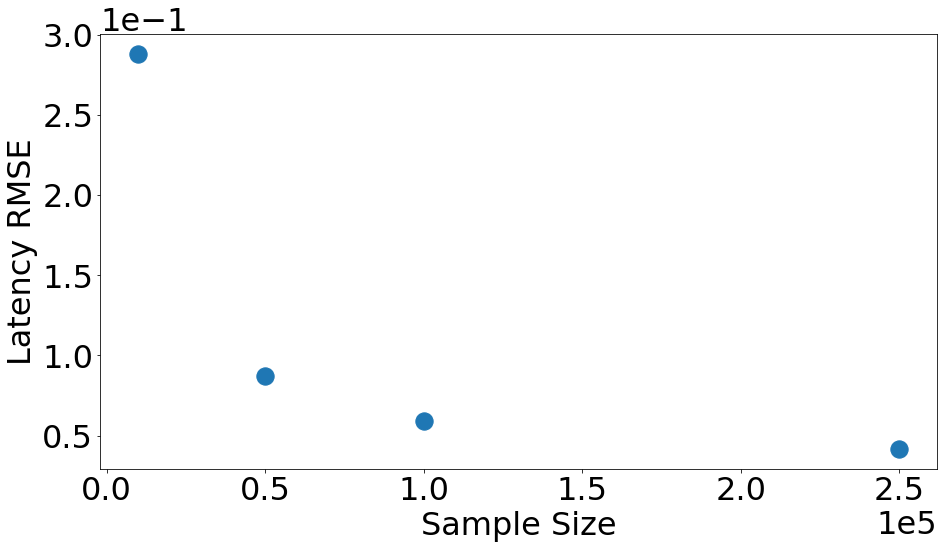

In [ ]:
error_groups = ['energy','power','latency', 'energy','power','latency', 'energy','power','latency', 'energy','power','latency']
error = [1.0322e-06, 2e-05, .08308, 3.80083173e-07, 1.7001321243e-05, .00761, 1.32365656e-07, 6.410489761e-06, .0035, 8.0763227e-08, 3.655856355e-06, .00173]
sizes = [10000, 10000, 10000, 50000, 50000, 50000, 100000, 100000, 100000, 250000, 250000, 250000]

for i in range(len(error)):
  error[i] = error[i]**.5


plt.scatter(x=sizes[::3], y=error[::3], s=300)
plt.ylabel('Energy RMSE')
plt.xlabel('Sample Size')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig('captures/energy_rmse.png')
plt.show()

plt.scatter(x=sizes[::3], y=error[1::3], s=300)
plt.ylabel('Power RMSE')
plt.xlabel('Sample Size')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig('captures/power_rmse.png')
plt.show()


plt.scatter(x=sizes[::3], y=error[2::3], s=300)
plt.ylabel('Latency RMSE')
plt.xlabel('Sample Size')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig('captures/latency_rmse.png')
plt.show()

Sample Size Breakdown and Error

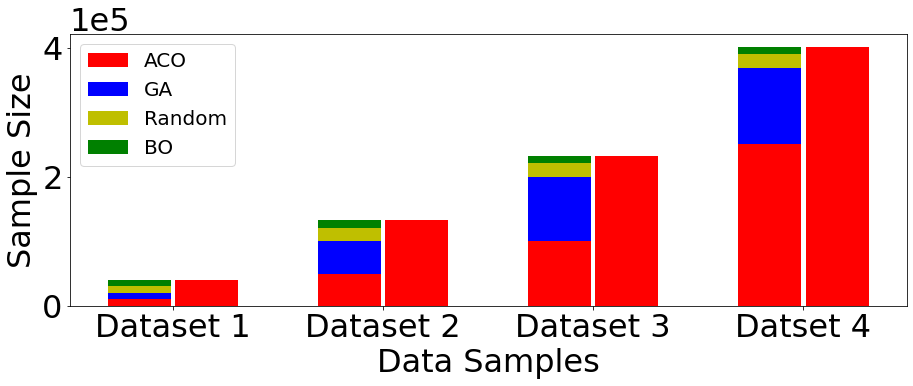

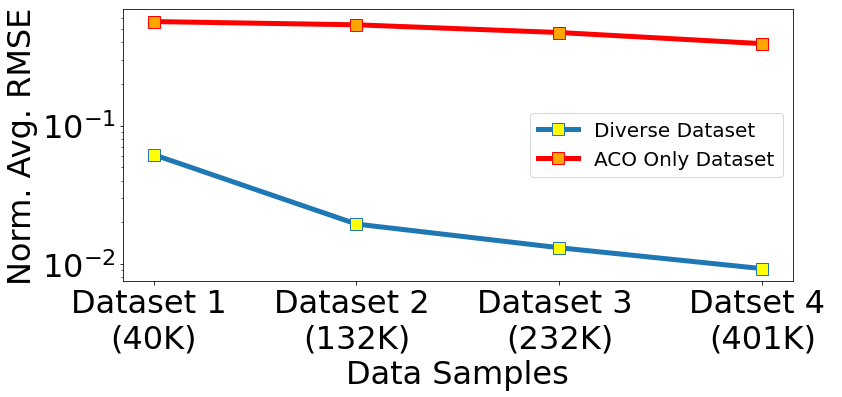

In [157]:
# Data of Sample Size and Algo
sample_size_bd = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Datset 4']
sample_size_bd_v2 = ['Dataset 1 \n(40K)', 'Dataset 2 \n(132K)', 'Dataset 3 \n(232K)', 'Datset 4 \n(401K)']
ACO_bd = np.array([10000, 50000, 100000, 250000])
BO_bd = np.array([10000, 11547, 11547, 11547])
GA_bd = np.array([10000, 50000, 100000, 118270])
Random_bd = [10000, 21308, 21308, 21308]
ACO_Single_bd = [40000, 132855, 232855, 401125]

# Normalize Error of Each Algo
error = [1.0322e-06, 2e-05, .08308, 3.80083173e-07, 1.7001321243e-05, .00761, 1.32365656e-07, 6.410489761e-06, .0035, 8.0763227e-08, 3.655856355e-06, .00173]
aco_error = [0.3278589006, 0.62562, 0.8667, 0.299039416, 0.65098, 0.66051, 0.1983498883, 0.51826, 0.57875, 0.160020689145092, 0.375110974324006, 0.32255]
# RMSE
rmse_error = []
aco_rmse_error = []
for i in range(len(error)):
  rmse_error.append(error[i]**.5)
  aco_rmse_error.append(aco_error[i]**.5)

norm_e_err = normalize([rmse_error[::3] + aco_rmse_error[::3]])[0]
norm_p_err = normalize([rmse_error[1::3] + aco_rmse_error[1::3]])[0]
norm_l_err = normalize([rmse_error[2::3] + aco_rmse_error[2::3]])[0]
norm_e_err_aco = norm_e_err[4:]
norm_p_err_aco = norm_p_err[4:]
norm_l_err_aco = norm_l_err[4:]
norm_e_err = norm_e_err[:4]
norm_p_err = norm_p_err[:4]
norm_l_err = norm_l_err[:4]


# Average the Error at each Sample Size
avg_norm_error = []
aco_avg_norm_error = []
for e, p, l, e_aco, p_aco, l_aco in zip(norm_e_err, norm_p_err, norm_l_err, 
                   norm_e_err_aco, norm_p_err_aco, norm_l_err_aco):
  avg = (e + p + l)/3
  avg_norm_error.append(avg)
  avg = (e_aco + p_aco + l_aco)/3
  aco_avg_norm_error.append(avg)


x_location = np.arange(len(sample_size_bd))
width = 0.3 

fig, ax = plt.subplots(figsize=(15,5)) 
ax.set_facecolor('white')
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams['font.size'] = 32
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.bar(x_location - width/2 - .01, ACO_bd, width=width, color='r', label='ACO')
ax.bar(x_location - width/2 - .01, GA_bd, width=width, bottom=ACO_bd, color='b', label='GA')
ax.bar(x_location - width/2 - .01, Random_bd, width=width, bottom=ACO_bd+GA_bd, color='y', label='Random')
ax.bar(x_location - width/2 - .01, BO_bd, width=width, bottom=ACO_bd+GA_bd+Random_bd, color='g', label='BO')
ax.legend(prop={'size': 20})
ax.set_xlabel('Data Samples')
ax.set_ylabel('Sample Size')
ax.bar(x_location + width/2 + .01, ACO_Single_bd, width=width, color='r', label='ACO')
ax.set_xticks(x_location)
ax.set_xticklabels(sample_size_bd)
plt.savefig('captures/sample_size_per_algo_and_error_bar.png', dpi = 300, bbox_inches="tight")
plt.show()


fig, ax = plt.subplots(figsize=(12,5)) 
ax.set_facecolor('white')
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['font.size'] = 32
ax.plot(sample_size_bd_v2, avg_norm_error, linewidth=5, marker='s',
         markerfacecolor='yellow', 
         markersize=12, label='Diverse Dataset')
ax.plot(sample_size_bd_v2, aco_avg_norm_error, linewidth=5, marker='s',
         markerfacecolor='orange', color='red',  
         markersize=12, label='ACO Only Dataset')
ax.set_ylabel('Norm. Avg. RMSE')
ax.set_xlabel('Data Samples')
plt.yscale("log")
ax.legend(prop={'size': 20})
plt.savefig('captures/sample_size_per_algo_and_error_line.png', dpi = 300, bbox_inches="tight")
plt.show()


Norm Avg RMSE Delta

In [ ]:
delta = np.array(aco_avg_norm_error)/np.array(avg_norm_error)
delta

array([ 9.164369  , 27.60641552, 36.01675291, 42.36717277])

Inference Time

In [50]:
import time
e_model, p_model, l_model = load_rf_saved_model(3)

trials = 100
avg_inference_time_lst = [] 
for i in range(trials):
  start_e = time.time()
  e_pred = e_model.predict(X_test_samples[3])
  end_e = time.time()
  e_total_time = end_e - start_e
  e_action_time = (e_total_time)/X_test_samples[3].shape[0]
  # print(f'Energy Inference time for {X_test_samples[3].shape[0]} samples: {e_total_time} seconds. Inference Time per action: {e_action_time} seconds')

  start_p = time.time()
  p_pred = p_model.predict(X_test_samples[3])
  end_p = time.time()
  p_total_time = end_p - start_p 
  p_action_time = (p_total_time)/X_test_samples[3].shape[0]
  # print(f'Energy Inference time for {X_test_samples[3].shape[0]} samples: {p_total_time} seconds. Inference Time per action: {p_action_time} seconds')

  start_l = time.time()
  l_pred = l_model.predict(X_test_samples[3])
  end_l = time.time()
  l_total_time =  end_l - start_l
  l_action_time = (l_total_time)/X_test_samples[3].shape[0]
  # print(f'Energy Inference time for {X_test_samples[3].shape[0]} samples: {l_total_time} seconds. Inference Time per action: {l_action_time} seconds')

  avg_inference_time = (e_action_time + p_action_time + l_action_time)/3
  # print(f'Average Inference Time per Action: {avg_inference_time} seconds')

  avg_inference_time_lst.append(avg_inference_time)
  if i%10 == 0:
    print(f'Trial: {i}')

avg_inference_time_total_avg = np.sum(np.array(avg_inference_time_lst))/trials
print(f'Average Inference Time per Action over {trials} trials: {avg_inference_time_total_avg} seconds')

Trial: 0
Trial: 10
Trial: 20
Trial: 30
Trial: 40
Trial: 50
Trial: 60
Trial: 70
Trial: 80
Trial: 90
Average Inference Time per Action over 100 trials: 3.504858650967527e-05 seconds


In [51]:
sim_inference_time = 12
avg_inference_time_hz = 1/avg_inference_time_total_avg
avg_inference_time_hz_norm = avg_inference_time_hz/sim_inference_time

In [52]:
avg_inference_time_hz_norm

2377.6517580909835

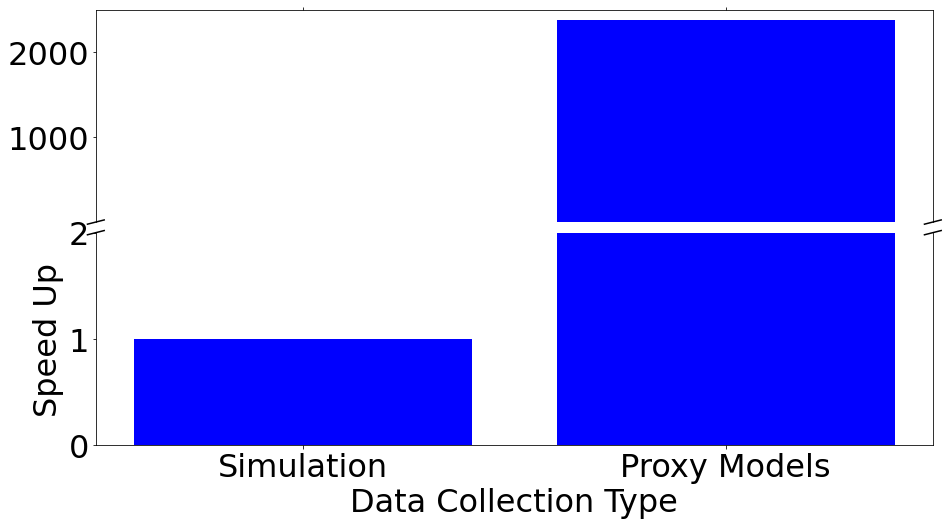

In [147]:
# Data
error_sim_vs_proxy = [1, 1- avg_norm_error[-1]]
speed_up  = [1, 2377]
collection_type = ['Simulation', 'Proxy Models']


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
ax1.bar(collection_type, speed_up, color='b')
ax2.bar(collection_type, speed_up, color='b')
plt.xlabel('Data Collection Type')
plt.ylabel('Speed Up')

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(2, 2500)  # outliers only
ax2.set_ylim(0, 2)  # most of the data

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = .01  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# # Dual Axis
# ax3 = ax2.twinx()
# # Line Plot
# ax3.plot(collection_type, error_sim_vs_proxy, linewidth=5, marker='s',
#          markerfacecolor='yellow', 
#          markersize=12)
# ax3.set_ylabel('Accuracy')
# ax3.spines['top'].set_visible(False)
# # plt.yticks(list(plt.yticks()[0][1:]) + [.985])

# Save and Show
plt.savefig('captures/speed_up.png', dpi=300)
plt.show()


# # Plot Settings
# fig, ax = plt.subplots(figsize=(15,5))
# ax.set_facecolor('white')
# plt.rcParams['figure.figsize'] = (15,8)
# plt.rcParams['font.size'] = 32
# # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# # plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# # Bar Plot
# ax2 = ax.twinx()
# # baxes = brokenaxes(ylims=((0,.1),(2376,2377)), hspace=.05)
# ax.set_ylim(1, 2376)
# ax.bar(collection_type, speed_up, color='b')
# ax.set_xlabel('Data Collection Type')
# ax.set_ylabel('Speed Up')

# ax.spines['bottom'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# ax.xaxis.tick_top()
# ax.tick_params(labeltop=False)  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()

# # Line Plot
# ax2.plot(collection_type, error_sim_vs_proxy, linewidth=5, marker='s',
#          markerfacecolor='yellow', 
#          markersize=12)
# ax2.set_ylabel('Accuracy')
# # ax2.tick_params(right=True, labelright=True)
# # plt.yticks(list(plt.yticks()[0][1:]) + [.985])

# # Save and Show
# plt.savefig('captures/speed_up.png')
# plt.show()

In [148]:
1- avg_norm_error[-1]

0.9907458111653961

In [151]:
print(f'RMSE Diverse Dataset 400K Sample Size Energy: {8.0763227e-08**.5}, Power: {3.655856355e-06**.5}, Latency: {.00173**.5}')
print(f'RMSE ACO Dataset 400K Sample Size Energy: {0.160020689145092**.5}, Power: {0.375110974324006**.5}, Latency: {0.32255**.5}')

RMSE Diverse Dataset 400K Sample Size Energy: 0.0002841887172285346, Power: 0.0019120293813119087, Latency: 0.041593268686170845
RMSE ACO Dataset 400K Sample Size Energy: 0.400025860595402, Power: 0.6124630391493073, Latency: 0.5679348554191757


# Regression Model for Latency using Ê and P̂ 

In [ ]:
# Sample Size Index
sample_size = 3

Load Energy and Power RF Models

In [ ]:
# Create path to model
energy_path = os.path.join(PROXY_MODEL_DIRECTORY, 'energy_rf_model_250')
power_path = os.path.join(PROXY_MODEL_DIRECTORY, 'power_rf_model_250')

# Load Models
rf_energy = pickle.load(open(energy_path, 'rb'))
rf_power = pickle.load(open(power_path, 'rb'))

## Random Forest Ê and P̂

Train Test Split Dataframe

In [ ]:
X = E_P_hat_df[['E_Hat', 'P_Hat']]
y = E_P_hat_df[['Latency']]
X_train_ep, X_test_ep, y_train_ep, y_test_ep = train_test_split(X,y, train_size=TRAIN_SPLIT_SIZE, random_state=SEED)

Hyperparameter Search

In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_latency_ep = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, n_iter = 10,
                          scoring = 'neg_mean_squared_error',random_state =100)

grid_rf_latency_ep.fit(X_train_ep,y_train_ep)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='mse',
                                                   max_depth=10,
                                                   min_samples_split=10,
                                                   n_jobs=-1,
                                                   random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [20, 104, 188, 272, 357,
                                                         441, 525, 610, 694,
                                                         778, 862, 947, 1031,
       

In [ ]:
grid_rf_latency_ep.best_params_

# EP
# {'n_estimators': 2614,
#  'min_samples_split': 15,
#  'min_samples_leaf': 1,
#  'max_features': 'auto',
#  'max_depth': 10}

{'n_estimators': 441,
 'min_samples_split': 100,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

Train Model

In [ ]:
rf_ep = RandomForestRegressor(n_estimators=2614,criterion='mse', 
                                 max_depth=10, min_samples_split=15,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='sqrt', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_ep.fit(X_train_ep,y_train_ep)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=10, max_features='sqrt',
                      min_samples_split=15, n_estimators=2614, n_jobs=-1,
                      random_state=100)

Evaluate Model

In [ ]:
# Prediction
y_train_pred_rf_latency_ep = rf_ep.predict(X_train_ep)
y_test_pred_rf_latency_ep = rf_ep.predict(X_test_ep)

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_ep,y_train_pred_rf_latency_ep),15)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_ep,y_test_pred_rf_latency_ep),15)))

Mean Squared Error for train : 0.076468362532307
Mean Squared Error for test : 0.081680423765553


Visualize Predictions

In [ ]:
rf_ep_evaluation_df = pd.DataFrame({'Latency': y_test_ep['Latency'], 'Latency Predicted':y_test_pred_rf_latency_ep})

# Random Forest Graph
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("Random Forest Single Models Actual vs Predicted")

ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=rf_ep_evaluation_df, alpha=1)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=rf_ep_evaluation_df,
            ax=ax2, color="orange")

NameError: ignored

In [ ]:
E_P_hat_df = pd.DataFrame({'E_Hat': y_test_pred_rf_energy, 'P_Hat': y_test_pred_rf_power, 'Latency': y_test_samples[sample_size]['Latency']}) 
E_P_hat_df = E_P_hat_df.reset_index(drop=True)

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


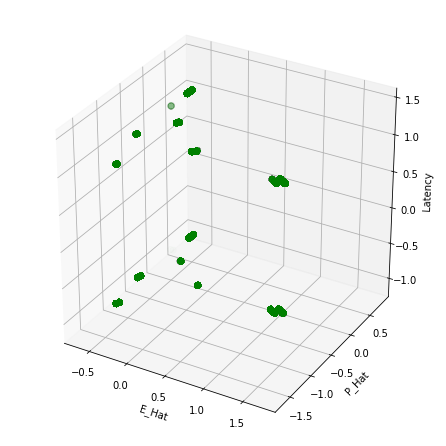

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
fig.add_axes(ax)

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())


sc = ax.scatter(E_P_hat_df['E_Hat'], E_P_hat_df['P_Hat'],
                E_P_hat_df['Latency'], s=40, marker='o',
                cmap=cmap, alpha=.01, c='green')

ax.set_xlabel('E_Hat')
ax.set_ylabel('P_Hat')
ax.set_zlabel('Latency')

plt.show()

Create Dataframe with **Ê** and **P̂**

## Random Forest Ê + P̂ + Actions

Create Ê + P̂ + Actions Dataset 

In [ ]:
actions = X_test_samples[sample_size].reset_index(drop=True)
E_P_hat_Actions_df = actions.join(E_P_hat_df)

In [ ]:
y = E_P_hat_Actions_df[['Latency']]
X = E_P_hat_Actions_df.drop(columns=['Latency'])
X_train_ep_actions, X_test_ep_actions, y_train_ep_actions, y_test_ep_actions = train_test_split(X,y, train_size=TRAIN_SPLIT_SIZE, random_state=SEED)

Hyperparameter Search

In [ ]:
# Random Forst Model

n_estimators = [int(x) for x in np.linspace(start = 1200, stop = 3000, num = 15)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [i for i in range(2,22,2)]
min_samples_split = [2, 5, 10, 15, 30, 100]
min_samples_leaf = [1, 2, 5, 10]


# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(param_grid)

{'n_estimators': [1200, 1328, 1457, 1585, 1714, 1842, 1971, 2100, 2228, 2357, 2485, 2614, 2742, 2871, 3000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'min_samples_split': [2, 5, 10, 15, 30, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True, n_jobs=-1, random_state=100, verbose=0)


grid_rf_latency_ep_actions = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 3, n_iter = 10,
                          scoring = 'neg_mean_squared_error',random_state =100)

grid_rf_latency_ep_actions.fit(X_train_ep_actions,y_train_ep_actions)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='mse',
                                                   max_depth=10,
                                                   min_samples_split=10,
                                                   n_jobs=-1,
                                                   random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 30,
                                                              100],
                                        'n_estimators': [1200, 1328, 1457, 1585,
                   

In [ ]:
grid_rf_latency_ep_actions.best_params_

# {'n_estimators': 1200,
#  'min_samples_split': 30,
#  'min_samples_leaf': 5,
#  'max_features': 'auto',
#  'max_depth': 12}

{'n_estimators': 1200,
 'min_samples_split': 30,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 12}

Train Model

In [ ]:
rf_ep_actions = RandomForestRegressor(n_estimators=1200,criterion='mse', 
                                 max_depth=12, min_samples_split=30,
                                 min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                                 max_features='sqrt', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf_ep_actions.fit(X_train_ep_actions,y_train_ep_actions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=12, max_features='sqrt',
                      min_samples_leaf=5, min_samples_split=30,
                      n_estimators=1200, n_jobs=-1, random_state=100)

Evaluate Model

In [ ]:
# Prediction
y_train_pred_rf_latency_ep_actions = rf_ep_actions.predict(X_train_ep_actions)
y_test_pred_rf_latency_ep_actions = rf_ep_actions.predict(X_test_ep_actions)

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_ep,y_train_pred_rf_latency_ep_actions),15)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_ep,y_test_pred_rf_latency_ep_actions),15)))

Mean Squared Error for train : 0.047949639296726
Mean Squared Error for test : 0.053391115523687


Visualize

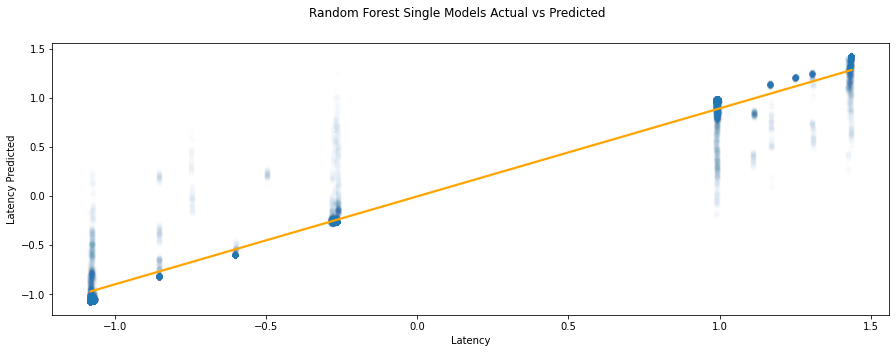

In [ ]:
rf_ep_actions_evaluation_df = pd.DataFrame({'Latency': y_test_ep_actions['Latency'], 'Latency Predicted':y_test_pred_rf_latency_ep_actions})

# Random Forest Graph
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("Random Forest Single Models Actual vs Predicted")

ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=rf_ep_actions_evaluation_df, alpha=.01)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=rf_ep_actions_evaluation_df,
            ax=ax2, color="orange")

## SVR Model

In [ ]:
svm_regressor = SVR(kernel = 'sigmoid')
svm_regressor.fit(X_train_ep, y_train_ep)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='sigmoid')

In [ ]:
# Prediction
y_train_pred_SVM_latency_ep = svm_regressor.predict(X_train_ep)
y_test_pred_SVM_latency_ep = svm_regressor.predict(X_test_ep)

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_ep,y_train_pred_SVM_latency_ep),15)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_ep,y_test_pred_SVM_latency_ep),15)))

Mean Squared Error for train : 41535.61944129891
Mean Squared Error for test : 40723.2297807137


<AxesSubplot:xlabel='Latency', ylabel='Latency Predicted'>

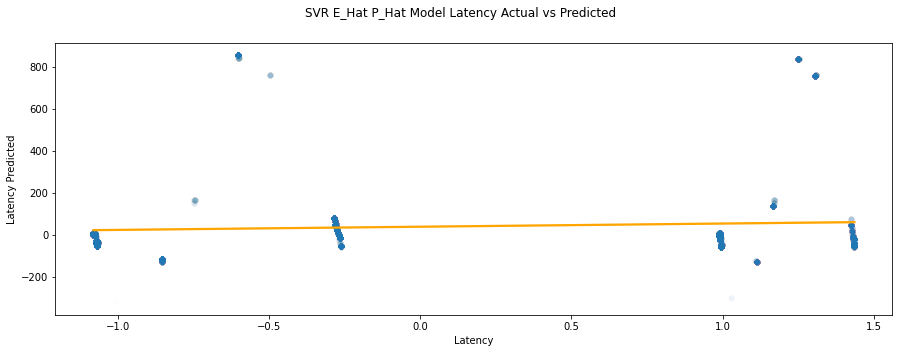

In [ ]:
svm_ep_evaluation_df = pd.DataFrame({'Latency': y_test_ep['Latency'], 'Latency Predicted':y_test_pred_SVM_latency_ep})

# Random Forest Graph
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("SVR E_Hat P_Hat Model Latency Actual vs Predicted")

ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=svm_ep_evaluation_df, alpha=.01)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=svm_ep_evaluation_df,
            ax=ax2, color="orange")

## MLP Regressor 

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(512,512,512), (150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 200],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
mlp_reg_ep = MLPRegressor(hidden_layer_sizes=(512,512,512),
                       max_iter = 300,activation = 'tanh',
                       solver = 'adam')


grid_mlp_reg_ep = RandomizedSearchCV(estimator = mlp_reg_ep, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 5, n_iter = 5,
                          scoring = 'neg_mean_squared_error',random_state =100)

grid_mlp_reg_ep.fit(X_train_ep,y_train_ep)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(activation='tanh',
                                          hidden_layer_sizes=(512, 512, 512),
                                          max_iter=300),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu',
                                                       'logistic'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(512, 512, 512),
                                                               (150, 100, 50),
                                                               (120, 80, 40),
                                                               (100, 50, 30)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'max_iter': [50, 100, 200],
          

In [ ]:
grid_mlp_reg_ep.best_params_

{'solver': 'lbfgs',
 'max_iter': 200,
 'learning_rate': 'constant',
 'hidden_layer_sizes': (100, 50, 30),
 'alpha': 0.05,
 'activation': 'tanh'}

In [ ]:
mlp_reg_ep = MLPRegressor(hidden_layer_sizes=(100, 50, 30),
                       max_iter = 200,
                       activation = 'tanh',
                       solver = 'lbfgs', 
                       learning_rate = 'constant', 
                       alpha=.05)

mlp_reg_ep.fit(X_train_ep, y_train_ep)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='tanh', alpha=0.05, hidden_layer_sizes=(100, 50, 30),
             solver='lbfgs')

In [ ]:
# Prediction
y_train_pred_MLP_latency_ep = mlp_reg_ep.predict(X_train_ep)
y_test_pred_MLP_latency_ep = mlp_reg_ep.predict(X_test_ep)

#Scoring
print('Mean Squared Error for train : {}'.format(round(mse(y_train_ep,y_train_pred_MLP_latency_ep),15)))
print('Mean Squared Error for test : {}'.format(round(mse(y_test_ep,y_test_pred_MLP_latency_ep),15)))

Mean Squared Error for train : 0.756190026168167
Mean Squared Error for test : 0.764548754715381


<AxesSubplot:xlabel='Latency', ylabel='Latency Predicted'>

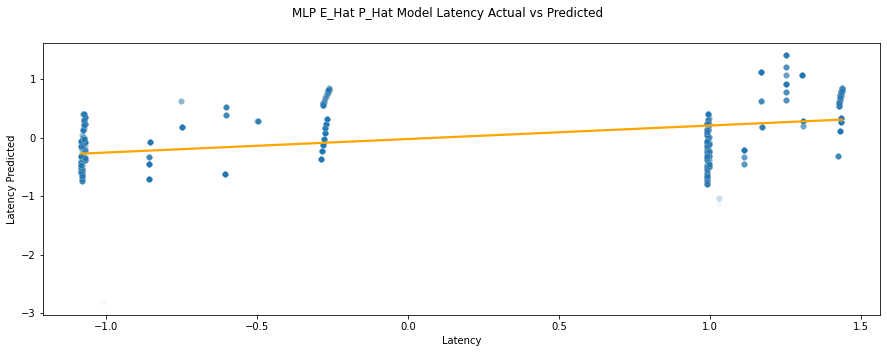

In [ ]:
mlp_ep_evaluation_df = pd.DataFrame({'Latency': y_test_ep['Latency'], 'Latency Predicted':y_test_pred_MLP_latency_ep})

# Random Forest Graph
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("MLP E_Hat P_Hat Model Latency Actual vs Predicted")

ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=mlp_ep_evaluation_df, alpha=.05)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=mlp_ep_evaluation_df,
            ax=ax2, color="orange")

# KNN Model

## Hyperprameter Search Settings

In [ ]:
n_neighbors = list(range(1,100))
weights = ['uniform', 'distance']
algorithm = ['auto',  'ball_tree', 'kd_tree', 'brute']
leaf_size = list(range(1,50))
p_distance_method = [1,2]


param_grid = dict(n_neighbors=n_neighbors, weights=weights, 
                  algorithm=algorithm, leaf_size=leaf_size, 
                  p=p_distance_method)

## 10,000 Samples Per Algorithm


In [ ]:
# Select Sample size
sample_size = 0

### Hyperparameter Search

Energy Hyperparameter Search

In [ ]:
KNN_regressor_energy = KNeighborsRegressor(n_neighbors=10)
rand_grid_energy = RandomizedSearchCV(KNN_regressor_energy, param_grid, cv=3,
                                      scoring='neg_mean_squared_error', n_iter=5,
                                      random_state=SEED, verbose=1, n_jobs=-1)

rand_grid_energy.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Energy'])
rand_grid_energy.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'weights': 'distance',
 'p': 1,
 'n_neighbors': 34,
 'leaf_size': 38,
 'algorithm': 'kd_tree'}

Power Hyperparameter Search

In [ ]:
KNN_regressor_power = KNeighborsRegressor(n_neighbors=10)
rand_grid_power = RandomizedSearchCV(KNN_regressor_power, param_grid, cv=3,
                                      scoring='neg_mean_squared_error', n_iter=5,
                                      random_state=SEED, verbose=1, n_jobs=-1)

rand_grid_power.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Power'])
rand_grid_power.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'weights': 'distance',
 'p': 1,
 'n_neighbors': 34,
 'leaf_size': 38,
 'algorithm': 'kd_tree'}

Latency Hyperparameter Search

In [ ]:
KNN_regressor_latency = KNeighborsRegressor(n_neighbors=10)
rand_grid_latency = RandomizedSearchCV(KNN_regressor_latency, param_grid, cv=3,
                                      scoring='neg_mean_squared_error', n_iter=5,
                                      random_state=SEED, verbose=1, n_jobs=-1)

rand_grid_latency.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Latency'])
rand_grid_latency.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'weights': 'distance',
 'p': 1,
 'n_neighbors': 34,
 'leaf_size': 38,
 'algorithm': 'kd_tree'}

**Energy** KNN Model

In [ ]:
KNN_regressor_energy = KNeighborsRegressor(weights='distance', p=1, n_neighbors=34, 
                                          leaf_size=38, algorithm='kd_tree')
KNN_regressor_energy.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Energy'])

KNeighborsRegressor(algorithm='kd_tree', leaf_size=38, n_neighbors=34, p=1,
                    weights='distance')

**Power** KNN Model

In [ ]:
KNN_regressor_power = KNeighborsRegressor(weights='distance', p=1, n_neighbors=34, 
                                          leaf_size=38, algorithm='kd_tree')
KNN_regressor_power.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Power'])

KNeighborsRegressor(algorithm='kd_tree', leaf_size=38, n_neighbors=34, p=1,
                    weights='distance')

**Latency** KNN Model

In [ ]:
KNN_regressor_latency = KNeighborsRegressor(weights='distance', p=1, n_neighbors=34, 
                                          leaf_size=38, algorithm='kd_tree')
KNN_regressor_latency.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Latency'])

KNeighborsRegressor(algorithm='kd_tree', leaf_size=38, n_neighbors=34, p=1,
                    weights='distance')

Evaluate KNN Models

In [ ]:
# Prediction
y_test_pred_KNN_energy = KNN_regressor_energy.predict(X_test_samples[sample_size])
y_test_pred_KNN_power = KNN_regressor_power.predict(X_test_samples[sample_size])
y_test_pred_KNN_latency = KNN_regressor_latency.predict(X_test_samples[sample_size])

#Scoring
print('Mean Squared Error Energy : {}'.format(round(mse(y_test_samples[sample_size]['Energy'], y_test_pred_KNN_energy), 5)))
print('Mean Squared Error Power : {}'.format(round(mse(y_test_samples[sample_size]['Power'], y_test_pred_KNN_power), 5)))
print('Mean Squared Error Latency : {}'.format(round(mse(y_test_samples[sample_size]['Latency'], y_test_pred_KNN_latency), 5)))

Mean Squared Error Energy : 0.0889
Mean Squared Error Power : 0.17336
Mean Squared Error Latency : 0.28924


Visualize Results

In [ ]:
KNN_single_target_pred = {'Energy Predicted': y_test_pred_KNN_energy, 
                              'Power Predicted': y_test_pred_KNN_power, 
                              'Latency Predicted': y_test_pred_KNN_latency}
KNN_single_target_pred = pd.DataFrame(KNN_single_target_pred)


KNN_single_target_evaluation_df = y_test_reset_index_samples[sample_size].join(KNN_single_target_pred)

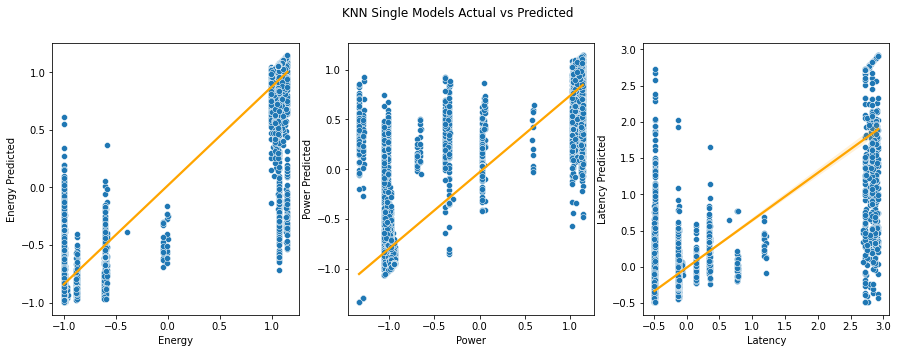

In [ ]:
# KNN Plot
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("KNN Single Models Actual vs Predicted")
plt.subplot(1,3,1)
ax0 = sns.scatterplot(x='Energy', y='Energy Predicted', data=KNN_single_target_evaluation_df)
sns.regplot(x='Energy', y='Energy Predicted',
            scatter=False, data=KNN_single_target_evaluation_df,
            ax=ax0, color="orange")

plt.subplot(1,3,2)
ax1 = sns.scatterplot(x='Power', y='Power Predicted', data=KNN_single_target_evaluation_df)
sns.regplot(x='Power', y='Power Predicted',
            scatter=False, data=KNN_single_target_evaluation_df,
            ax=ax1, color="orange")

plt.subplot(1,3,3)
ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=KNN_single_target_evaluation_df)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=KNN_single_target_evaluation_df,
            ax=ax2, color="orange")

## 50,000 Samples Per Algorithm


In [ ]:
# Select Sample size
sample_size = 1

### Hyperparameter Search

Energy Hyperparameter Search

In [ ]:
KNN_regressor_energy = KNeighborsRegressor(n_neighbors=10)
rand_grid_energy = RandomizedSearchCV(KNN_regressor_energy, param_grid, cv=3,
                                      scoring='neg_mean_squared_error', n_iter=5,
                                      random_state=SEED, verbose=1, n_jobs=-1)

rand_grid_energy.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Energy'])
rand_grid_energy.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


{'weights': 'distance',
 'p': 1,
 'n_neighbors': 48,
 'leaf_size': 28,
 'algorithm': 'kd_tree'}

Power Hyperparameter Search

In [ ]:
KNN_regressor_power = KNeighborsRegressor(n_neighbors=10)
rand_grid_power = RandomizedSearchCV(KNN_regressor_power, param_grid, cv=3,
                                      scoring='neg_mean_squared_error', n_iter=5,
                                      random_state=SEED, verbose=1, n_jobs=-1)

rand_grid_power.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Power'])
rand_grid_power.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


{'weights': 'distance',
 'p': 1,
 'n_neighbors': 48,
 'leaf_size': 28,
 'algorithm': 'kd_tree'}

Latency Hyperparameter Search

In [ ]:
KNN_regressor_latency = KNeighborsRegressor(n_neighbors=10)
rand_grid_latency = RandomizedSearchCV(KNN_regressor_latency, param_grid, cv=3,
                                      scoring='neg_mean_squared_error', n_iter=5,
                                      random_state=SEED, verbose=1, n_jobs=-1)

rand_grid_latency.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Latency'])
rand_grid_latency.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


{'weights': 'distance',
 'p': 1,
 'n_neighbors': 48,
 'leaf_size': 28,
 'algorithm': 'kd_tree'}

**Energy** KNN Model

In [ ]:
KNN_regressor_energy = KNeighborsRegressor(weights='distance', p=1, n_neighbors=48, 
                                          leaf_size=28, algorithm='kd_tree')
KNN_regressor_energy.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Energy'])

KNeighborsRegressor(algorithm='kd_tree', leaf_size=28, n_neighbors=48, p=1,
                    weights='distance')

**Power** KNN Model

In [ ]:
KNN_regressor_power = KNeighborsRegressor(weights='distance', p=1, n_neighbors=48, 
                                          leaf_size=28, algorithm='kd_tree')
KNN_regressor_power.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Power'])

KNeighborsRegressor(algorithm='kd_tree', leaf_size=28, n_neighbors=48, p=1,
                    weights='distance')

**Latency** KNN Model

In [ ]:
KNN_regressor_latency = KNeighborsRegressor(weights='distance', p=1, n_neighbors=48, 
                                          leaf_size=28, algorithm='kd_tree')
KNN_regressor_latency.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Latency'])

KNeighborsRegressor(algorithm='kd_tree', leaf_size=28, n_neighbors=48, p=1,
                    weights='distance')

Evaluate KNN Models

In [ ]:
# Prediction
y_test_pred_KNN_energy = KNN_regressor_energy.predict(X_test_samples[sample_size])
y_test_pred_KNN_power = KNN_regressor_power.predict(X_test_samples[sample_size])
y_test_pred_KNN_latency = KNN_regressor_latency.predict(X_test_samples[sample_size])

#Scoring
print('Mean Squared Error Energy : {}'.format(round(mse(y_test_samples[sample_size]['Energy'], y_test_pred_KNN_energy), 5)))
print('Mean Squared Error Power : {}'.format(round(mse(y_test_samples[sample_size]['Power'], y_test_pred_KNN_power), 5)))
print('Mean Squared Error Latency : {}'.format(round(mse(y_test_samples[sample_size]['Latency'], y_test_pred_KNN_latency), 5)))

Mean Squared Error Energy : 0.05151
Mean Squared Error Power : 0.11065
Mean Squared Error Latency : 0.18188


Visualize Results

In [ ]:
KNN_single_target_pred = {'Energy Predicted': y_test_pred_KNN_energy, 
                              'Power Predicted': y_test_pred_KNN_power, 
                              'Latency Predicted': y_test_pred_KNN_latency}
KNN_single_target_pred = pd.DataFrame(KNN_single_target_pred)


KNN_single_target_evaluation_df = y_test_reset_index_samples[sample_size].join(KNN_single_target_pred)

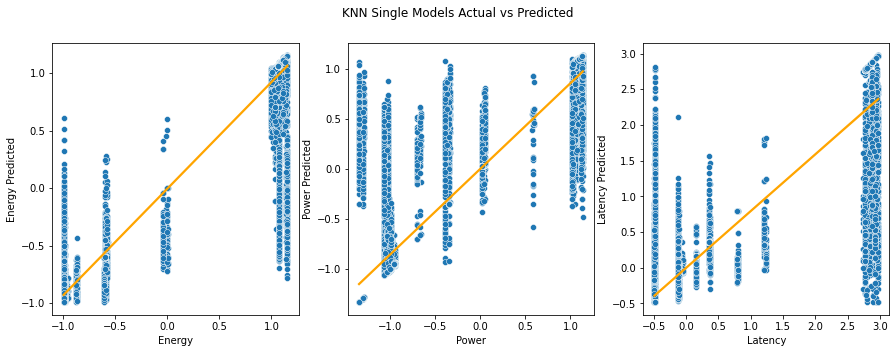

In [ ]:
# KNN Plot
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("KNN Single Models Actual vs Predicted")
plt.subplot(1,3,1)
ax0 = sns.scatterplot(x='Energy', y='Energy Predicted', data=KNN_single_target_evaluation_df)
sns.regplot(x='Energy', y='Energy Predicted',
            scatter=False, data=KNN_single_target_evaluation_df,
            ax=ax0, color="orange")

plt.subplot(1,3,2)
ax1 = sns.scatterplot(x='Power', y='Power Predicted', data=KNN_single_target_evaluation_df)
sns.regplot(x='Power', y='Power Predicted',
            scatter=False, data=KNN_single_target_evaluation_df,
            ax=ax1, color="orange")

plt.subplot(1,3,3)
ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=KNN_single_target_evaluation_df)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=KNN_single_target_evaluation_df,
            ax=ax2, color="orange")

## 100,000 Samples Per Algorithm


In [ ]:
# Select Sample size
sample_size = 2

### Hyperparameter Search

Energy Hyperparameter Search

In [ ]:
KNN_regressor_energy = KNeighborsRegressor(n_neighbors=10)
rand_grid_energy = RandomizedSearchCV(KNN_regressor_energy, param_grid, cv=3,
                                      scoring='neg_mean_squared_error', n_iter=5,
                                      random_state=SEED, verbose=1, n_jobs=-1)

rand_grid_energy.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Energy'])
rand_grid_energy.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


{'weights': 'distance',
 'p': 1,
 'n_neighbors': 48,
 'leaf_size': 28,
 'algorithm': 'kd_tree'}

Power Hyperparameter Search

In [ ]:
KNN_regressor_power = KNeighborsRegressor(n_neighbors=10)
rand_grid_power = RandomizedSearchCV(KNN_regressor_power, param_grid, cv=3,
                                      scoring='neg_mean_squared_error', n_iter=5,
                                      random_state=SEED, verbose=1, n_jobs=-1)

rand_grid_power.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Power'])
rand_grid_power.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


{'weights': 'distance',
 'p': 1,
 'n_neighbors': 48,
 'leaf_size': 28,
 'algorithm': 'kd_tree'}

Latency Hyperparameter Search

In [ ]:
KNN_regressor_latency = KNeighborsRegressor(n_neighbors=10)
rand_grid_latency = RandomizedSearchCV(KNN_regressor_latency, param_grid, cv=3,
                                      scoring='neg_mean_squared_error', n_iter=5,
                                      random_state=SEED, verbose=1, n_jobs=-1)

rand_grid_latency.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Latency'])
rand_grid_latency.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


{'weights': 'distance',
 'p': 1,
 'n_neighbors': 48,
 'leaf_size': 28,
 'algorithm': 'kd_tree'}

**Energy** KNN Model

In [ ]:
KNN_regressor_energy = KNeighborsRegressor(weights='distance', p=1, n_neighbors=48, 
                                          leaf_size=28, algorithm='kd_tree')
KNN_regressor_energy.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Energy'])

KNeighborsRegressor(algorithm='kd_tree', leaf_size=28, n_neighbors=48, p=1,
                    weights='distance')

**Power** KNN Model

In [ ]:
KNN_regressor_power = KNeighborsRegressor(weights='distance', p=1, n_neighbors=48, 
                                          leaf_size=28, algorithm='kd_tree')
KNN_regressor_power.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Power'])

KNeighborsRegressor(algorithm='kd_tree', leaf_size=28, n_neighbors=48, p=1,
                    weights='distance')

**Latency** KNN Model

In [ ]:
KNN_regressor_latency = KNeighborsRegressor(weights='distance', p=1, n_neighbors=48, 
                                          leaf_size=28, algorithm='kd_tree')
KNN_regressor_latency.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Latency'])

KNeighborsRegressor(algorithm='kd_tree', leaf_size=28, n_neighbors=48, p=1,
                    weights='distance')

Evaluate KNN Models

In [ ]:
# Prediction
y_test_pred_KNN_energy = KNN_regressor_energy.predict(X_test_samples[sample_size])
y_test_pred_KNN_power = KNN_regressor_power.predict(X_test_samples[sample_size])
y_test_pred_KNN_latency = KNN_regressor_latency.predict(X_test_samples[sample_size])

#Scoring
print('Mean Squared Error Energy : {}'.format(round(mse(y_test_samples[sample_size]['Energy'], y_test_pred_KNN_energy), 5)))
print('Mean Squared Error Power : {}'.format(round(mse(y_test_samples[sample_size]['Power'], y_test_pred_KNN_power), 5)))
print('Mean Squared Error Latency : {}'.format(round(mse(y_test_samples[sample_size]['Latency'], y_test_pred_KNN_latency), 5)))

Mean Squared Error Energy : 0.05151
Mean Squared Error Power : 0.11065
Mean Squared Error Latency : 0.18188


Visualize Results

In [ ]:
KNN_single_target_pred = {'Energy Predicted': y_test_pred_KNN_energy, 
                              'Power Predicted': y_test_pred_KNN_power, 
                              'Latency Predicted': y_test_pred_KNN_latency}
KNN_single_target_pred = pd.DataFrame(KNN_single_target_pred)


KNN_single_target_evaluation_df = y_test_reset_index_samples[sample_size].join(KNN_single_target_pred)

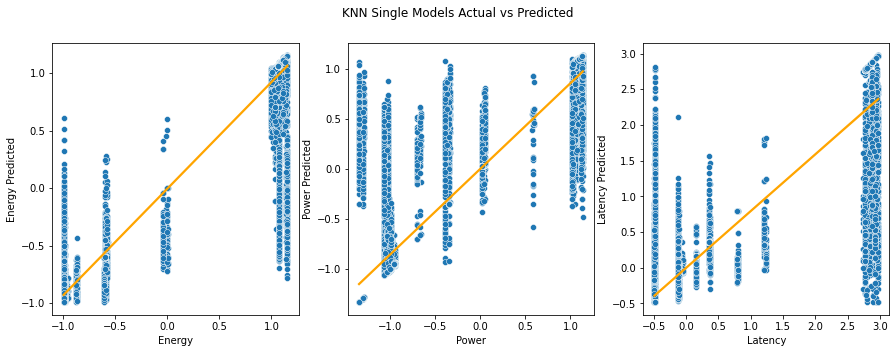

In [ ]:
# KNN Plot
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("KNN Single Models Actual vs Predicted")
plt.subplot(1,3,1)
ax0 = sns.scatterplot(x='Energy', y='Energy Predicted', data=KNN_single_target_evaluation_df)
sns.regplot(x='Energy', y='Energy Predicted',
            scatter=False, data=KNN_single_target_evaluation_df,
            ax=ax0, color="orange")

plt.subplot(1,3,2)
ax1 = sns.scatterplot(x='Power', y='Power Predicted', data=KNN_single_target_evaluation_df)
sns.regplot(x='Power', y='Power Predicted',
            scatter=False, data=KNN_single_target_evaluation_df,
            ax=ax1, color="orange")

plt.subplot(1,3,3)
ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=KNN_single_target_evaluation_df)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=KNN_single_target_evaluation_df,
            ax=ax2, color="orange")

## 250,000 Samples Per Algorithm


In [ ]:
# Select Sample size
sample_size = 3

### Hyperparameter Search

Energy Hyperparameter Search

In [ ]:
KNN_regressor_energy = KNeighborsRegressor(n_neighbors=10)
rand_grid_energy = RandomizedSearchCV(KNN_regressor_energy, param_grid, cv=3,
                                      scoring='neg_mean_squared_error', n_iter=5,
                                      random_state=SEED, verbose=1, n_jobs=-1)

rand_grid_energy.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Energy'])
rand_grid_energy.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


{'weights': 'distance',
 'p': 1,
 'n_neighbors': 48,
 'leaf_size': 28,
 'algorithm': 'kd_tree'}

Power Hyperparameter Search

In [ ]:
KNN_regressor_power = KNeighborsRegressor(n_neighbors=10)
rand_grid_power = RandomizedSearchCV(KNN_regressor_power, param_grid, cv=3,
                                      scoring='neg_mean_squared_error', n_iter=5,
                                      random_state=SEED, verbose=1, n_jobs=-1)

rand_grid_power.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Power'])
rand_grid_power.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


KeyboardInterrupt: ignored

Latency Hyperparameter Search

In [ ]:
KNN_regressor_latency = KNeighborsRegressor(n_neighbors=10)
rand_grid_latency = RandomizedSearchCV(KNN_regressor_latency, param_grid, cv=3,
                                      scoring='neg_mean_squared_error', n_iter=5,
                                      random_state=SEED, verbose=1, n_jobs=-1)

rand_grid_latency.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Latency'])
rand_grid_latency.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


{'weights': 'distance',
 'p': 1,
 'n_neighbors': 48,
 'leaf_size': 28,
 'algorithm': 'kd_tree'}

**Energy** KNN Model

In [ ]:
KNN_regressor_energy = KNeighborsRegressor(weights='distance', p=1, n_neighbors=48, 
                                          leaf_size=28, algorithm='kd_tree')
KNN_regressor_energy.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Energy'])

KNeighborsRegressor(algorithm='kd_tree', leaf_size=28, n_neighbors=48, p=1,
                    weights='distance')

**Power** KNN Model

In [ ]:
KNN_regressor_power = KNeighborsRegressor(weights='distance', p=1, n_neighbors=48, 
                                          leaf_size=28, algorithm='kd_tree')
KNN_regressor_power.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Power'])

KNeighborsRegressor(algorithm='kd_tree', leaf_size=28, n_neighbors=48, p=1,
                    weights='distance')

**Latency** KNN Model

In [ ]:
KNN_regressor_latency = KNeighborsRegressor(weights='distance', p=1, n_neighbors=48, 
                                          leaf_size=28, algorithm='kd_tree')
KNN_regressor_latency.fit(X_train_samples[sample_size], y_train_samples[sample_size]['Latency'])

KNeighborsRegressor(algorithm='kd_tree', leaf_size=28, n_neighbors=48, p=1,
                    weights='distance')

Evaluate KNN Models

In [ ]:
# Prediction
y_test_pred_KNN_energy = KNN_regressor_energy.predict(X_test_samples[sample_size])
y_test_pred_KNN_power = KNN_regressor_power.predict(X_test_samples[sample_size])
y_test_pred_KNN_latency = KNN_regressor_latency.predict(X_test_samples[sample_size])

#Scoring
print('Mean Squared Error Energy : {}'.format(round(mse(y_test_samples[sample_size]['Energy'], y_test_pred_KNN_energy), 5)))
print('Mean Squared Error Power : {}'.format(round(mse(y_test_samples[sample_size]['Power'], y_test_pred_KNN_power), 5)))
print('Mean Squared Error Latency : {}'.format(round(mse(y_test_samples[sample_size]['Latency'], y_test_pred_KNN_latency), 5)))

Mean Squared Error Energy : 0.02684
Mean Squared Error Power : 0.07092
Mean Squared Error Latency : 0.10176


Visualize Results

In [ ]:
KNN_single_target_pred = {'Energy Predicted': y_test_pred_KNN_energy, 
                              'Power Predicted': y_test_pred_KNN_power, 
                              'Latency Predicted': y_test_pred_KNN_latency}
KNN_single_target_pred = pd.DataFrame(KNN_single_target_pred)


KNN_single_target_evaluation_df = y_test_reset_index_samples[sample_size].join(KNN_single_target_pred)

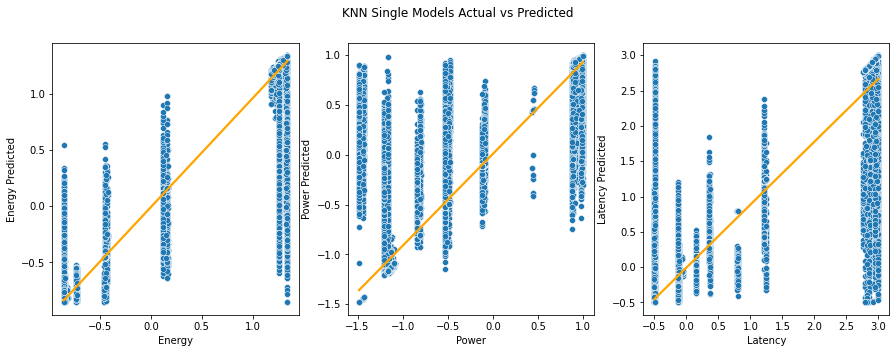

In [ ]:
# KNN Plot
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("KNN Single Models Actual vs Predicted")
plt.subplot(1,3,1)
ax0 = sns.scatterplot(x='Energy', y='Energy Predicted', data=KNN_single_target_evaluation_df)
sns.regplot(x='Energy', y='Energy Predicted',
            scatter=False, data=KNN_single_target_evaluation_df,
            ax=ax0, color="orange")

plt.subplot(1,3,2)
ax1 = sns.scatterplot(x='Power', y='Power Predicted', data=KNN_single_target_evaluation_df)
sns.regplot(x='Power', y='Power Predicted',
            scatter=False, data=KNN_single_target_evaluation_df,
            ax=ax1, color="orange")

plt.subplot(1,3,3)
ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=KNN_single_target_evaluation_df)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=KNN_single_target_evaluation_df,
            ax=ax2, color="orange")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x720 with 0 Axes>

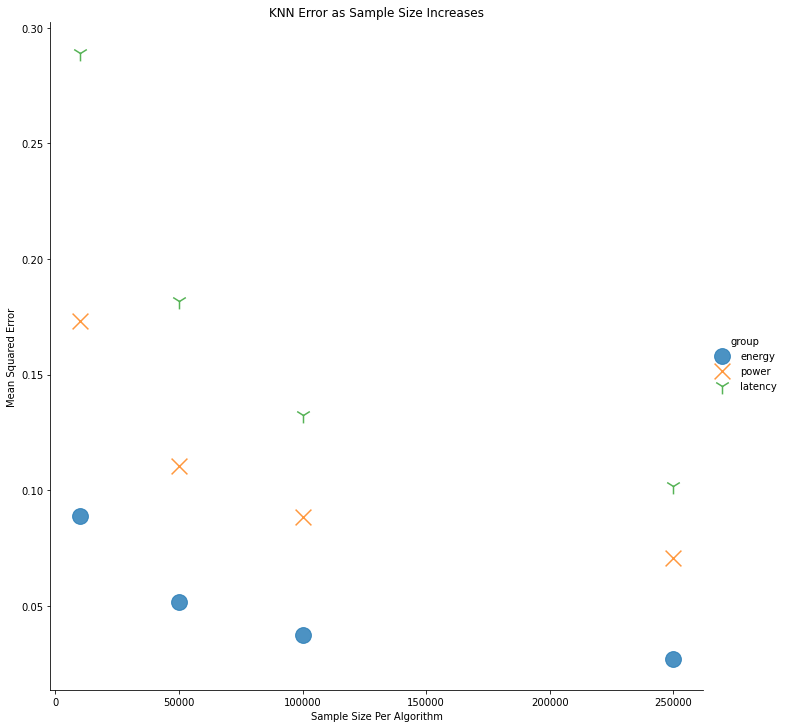

In [ ]:
error_groups = ['energy','power','latency', 'energy','power','latency', 'energy','power','latency', 'energy','power','latency']
error = [.0889, .17336, .28924, .05151, .11065, .18188, .03748, .08829, .1327, .02684, .07092, .10176]
sizes = [10000, 10000, 10000, 50000, 50000, 50000, 100000, 100000, 100000, 250000, 250000, 250000]
rf_results_df = pd.DataFrame({'error': error, 'sizes':sizes, 'group': error_groups})

plt.figure(figsize=(15,10))
ax = sns.lmplot('sizes', 'error', data=rf_results_df, fit_reg=False, height=10, hue='group', markers=["o","x","1"], scatter_kws={"s": 250})

ax.set(xlabel='Sample Size Per Algorithm', ylabel='Mean Squared Error', title='KNN Error as Sample Size Increases')
plt.show()

# Node

Import Packages

In [ ]:
from qhoptim.pyt import QHAdam
from node.lib.utils import check_numpy

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
optimizer_params = { 'nus':(0.7, 1.0), 'betas':(0.95, 0.998) }

In [ ]:
def get_model_initialization(sample_size):
  '''Return a model object'''
  model = nn.Sequential(
      lib.DenseBlock(X_train_samples[sample_size].shape[1], 256, num_layers=12, tree_dim=3, depth=8, flatten_output=False,
                    choice_function=lib.entmax15, bin_function=lib.entmoid15),
      lib.Lambda(lambda x: x[..., 0].mean(dim=-1)),  # average first channels of every tree

  ).to(device)
  
  return model

In [ ]:
def train_node_model(sample_size, target):
  # Set Parameters
  loss_history, mse_history = [], []
  best_mse = float('inf')
  best_step_mse = 0
  early_stopping_rounds = 1000
  report_frequency = 100

  # Clear GPU cache
  gc.collect()

  # Create Model
  model = get_model_initialization(sample_size)

  # Initialize Trainer
  experiment_name = target + '_'+ str(sample_size)
  trainer = lib.Trainer(
      model=model, loss_function=F.mse_loss,
      experiment_name=experiment_name,
      warm_start=False,
      Optimizer=QHAdam,
      optimizer_params=optimizer_params,
      verbose=True,
      n_last_checkpoints=5
  )


  # Train
  for batch in lib.iterate_minibatches(np.float32(X_train_samples[sample_size]),
                                      np.float32(y_train_samples[sample_size]['Energy']), 
                                      batch_size=256,
                                      shuffle=True,
                                      epochs=float('inf')):
    
      metrics = trainer.train_on_batch(*batch, device=device)

      loss_history.append(metrics['loss'])

      if trainer.step % report_frequency == 0:
          trainer.save_checkpoint()
          trainer.average_checkpoints(out_tag='avg')
          trainer.load_checkpoint(tag='avg')
          mse = trainer.evaluate_mse(
              np.float32(X_test_samples[sample_size]), np.float32(y_test_samples[sample_size]['Energy']), device=device, batch_size=256)

          if mse < best_mse:
              best_mse = mse
              best_step_mse = trainer.step
              trainer.save_checkpoint(tag='best_mse')
          mse_history.append(mse)

          trainer.load_checkpoint()  # last
          trainer.remove_old_temp_checkpoints()

          print("Loss %.5f" % (metrics['loss']))
          print("Val MSE: %0.5f" % (mse))

      if trainer.step > best_step_mse + early_stopping_rounds:
          print('BREAK. There is no improvment for {} steps'.format(early_stopping_rounds))
          print("Best step: ", best_step_mse)
          print("Best Val MSE: %0.5f" % (best_mse))
          break
      
  return trainer

## 10,000 Samples Per Algorithm

In [ ]:
sample_size = 0

Energy Model

In [ ]:
energy_trainer = train_node_model(sample_size, 'Energy')

/content/node/lib/odst.py:72: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  bin_codes = (indices.view(1, -1) // offsets.view(-1, 1) % 2).to(torch.float32)
/content/node/lib/odst.py:113: UserWarning: Data-aware initialization is performed on less than 1000 data points. This may cause instability.To avoid potential problems, run this model on a data batch with at least 1000 data samples.You can do so manually before training. Use with torch.no_grad() for memory efficiency.
  warn("Data-aware initialization is performed on less than 1000 data points. This may cause instability."
/usr/local/lib/python3.7/dist-packages/qhoptim/pyt/qhadam.py:133: UserWarning: This o

Saved logs/Energy_0/checkpoint_temp_100.pth
Loaded logs/Energy_0/checkpoint_avg.pth
Saved logs/Energy_0/checkpoint_best_mse.pth
Loaded logs/Energy_0/checkpoint_temp_100.pth
Loss 0.06649
Val MSE: 0.06009
Saved logs/Energy_0/checkpoint_temp_200.pth
Loaded logs/Energy_0/checkpoint_avg.pth
Saved logs/Energy_0/checkpoint_best_mse.pth
Loaded logs/Energy_0/checkpoint_temp_200.pth
Loss 0.03465
Val MSE: 0.03005
Saved logs/Energy_0/checkpoint_temp_300.pth
Loaded logs/Energy_0/checkpoint_avg.pth
Saved logs/Energy_0/checkpoint_best_mse.pth
Loaded logs/Energy_0/checkpoint_temp_300.pth
Loss 0.02618
Val MSE: 0.02325
Saved logs/Energy_0/checkpoint_temp_400.pth
Loaded logs/Energy_0/checkpoint_avg.pth
Saved logs/Energy_0/checkpoint_best_mse.pth
Loaded logs/Energy_0/checkpoint_temp_400.pth
Loss 0.00274
Val MSE: 0.02141
Saved logs/Energy_0/checkpoint_temp_500.pth
Loaded logs/Energy_0/checkpoint_avg.pth
Saved logs/Energy_0/checkpoint_best_mse.pth
Loaded logs/Energy_0/checkpoint_temp_500.pth
Loss 0.01104
Va

Power Energy

In [ ]:
power_trainer = train_node_model(sample_size, 'Power')

RuntimeError: ignored

Latency

In [ ]:
latency_trainer = train_node_model(sample_size, 'Latency')

### Evaluate

In [ ]:
model_target = 'Energy'
path = os.path.join('logs', model_target + '_'+str(sample_size),'checkpoint_best_mse.pth')

energy_model = get_model_initialization(sample_size)

energy_trainer_test = lib.Trainer(
    model=energy_model, loss_function=F.mse_loss,
    experiment_name=model_target+str(sample_size)+'_test',
    warm_start=False,
    Optimizer=QHAdam,
    optimizer_params=optimizer_params,
    verbose=True,
    n_last_checkpoints=5
)

energy_trainer_test.load_checkpoint(path=path)

mse, energy_pred = energy_trainer_test.evaluate_mse_pred(np.float32(X_test_samples[sample_size]), np.float32(y_test_samples[sample_size]['Energy']), device=device)
print(f'{model_target} Mean Squared Error: ', mse)

# Power
model_target = 'Power'
path = os.path.join('logs', model_target + '_'+str(sample_size),'checkpoint_best_mse.pth')

power_model = get_model_initialization(sample_size)

power_trainer_test = lib.Trainer(
    model=power_model, loss_function=F.mse_loss,
    experiment_name=model_target+str(sample_size)+'_test',
    warm_start=False,
    Optimizer=QHAdam,
    optimizer_params=optimizer_params,
    verbose=True,
    n_last_checkpoints=5
)

power_trainer_test.load_checkpoint(path=path)

mse, power_pred = power_trainer_test.evaluate_mse_pred(np.float32(X_test_samples[sample_size]), np.float32(y_test_samples[sample_size]['Energy']), device=device)
print(f'{model_target} Mean Squared Error: ', mse)

# Latency
model_target = 'Latency'
path = os.path.join('logs', model_target + '_'+str(sample_size),'checkpoint_best_mse.pth')

latency_model = get_model_initialization(sample_size)

latency_trainer_test = lib.Trainer(
    model=latency_model, loss_function=F.mse_loss,
    experiment_name=model_target+str(sample_size)+'_test',
    warm_start=False,
    Optimizer=QHAdam,
    optimizer_params=optimizer_params,
    verbose=True,
    n_last_checkpoints=5
)

latency_trainer_test.load_checkpoint(path=path)

mse, latency_pred = latency_trainer_test.evaluate_mse_pred(np.float32(X_test_samples[sample_size]), np.float32(y_test_samples[sample_size]['Energy']), device=device)
print(f'{model_target} Mean Squared Error: ', mse)

/content/node/lib/odst.py:72: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  bin_codes = (indices.view(1, -1) // offsets.view(-1, 1) % 2).to(torch.float32)


Loaded logs/Energy_0/checkpoint_best_mse.pth
Energy Mean Squared Error:  0.006243928
Loaded logs/Power_0/checkpoint_best_mse.pth
Power Mean Squared Error:  0.0057594846
Loaded logs/Latency_0/checkpoint_best_mse.pth
Latency Mean Squared Error:  0.005238067


In [ ]:
NODE_single_target_pred = {'Energy Predicted': energy_pred, 
                              'Power Predicted': power_pred, 
                              'Latency Predicted': latency_pred}
NODE_single_target_pred = pd.DataFrame(NODE_single_target_pred)


NODE_single_target_evaluation_df = y_test_reset_index_samples[sample_size].join(NODE_single_target_pred)

In [ ]:
%matplotlib inline

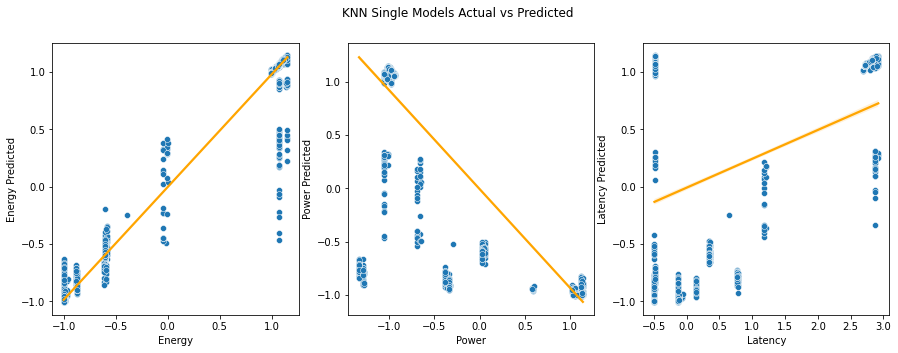

In [ ]:
# NODE Plot
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("KNN Single Models Actual vs Predicted")
plt.subplot(1,3,1)
ax0 = sns.scatterplot(x='Energy', y='Energy Predicted', data=NODE_single_target_evaluation_df)
sns.regplot(x='Energy', y='Energy Predicted',
            scatter=False, data=NODE_single_target_evaluation_df,
            ax=ax0, color="orange")

plt.subplot(1,3,2)
ax1 = sns.scatterplot(x='Power', y='Power Predicted', data=NODE_single_target_evaluation_df)
sns.regplot(x='Power', y='Power Predicted',
            scatter=False, data=NODE_single_target_evaluation_df,
            ax=ax1, color="orange")

plt.subplot(1,3,3)
ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=NODE_single_target_evaluation_df)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=NODE_single_target_evaluation_df,
            ax=ax2, color="orange")
plt.show()

## 50,000 Samples Per Algorithm 

In [ ]:
sample_size = 1

Energy

In [ ]:
energy_trainer = train_node_model(sample_size, 'Energy')

Saved logs/Energy_1/checkpoint_temp_100.pth
Loaded logs/Energy_1/checkpoint_avg.pth
Saved logs/Energy_1/checkpoint_best_mse.pth
Loaded logs/Energy_1/checkpoint_temp_100.pth
Loss 0.05056
Val MSE: 0.07173
Saved logs/Energy_1/checkpoint_temp_200.pth
Loaded logs/Energy_1/checkpoint_avg.pth
Saved logs/Energy_1/checkpoint_best_mse.pth
Loaded logs/Energy_1/checkpoint_temp_200.pth
Loss 0.01155
Val MSE: 0.03555
Saved logs/Energy_1/checkpoint_temp_300.pth
Loaded logs/Energy_1/checkpoint_avg.pth
Saved logs/Energy_1/checkpoint_best_mse.pth
Loaded logs/Energy_1/checkpoint_temp_300.pth
Loss 0.00855
Val MSE: 0.02942
Saved logs/Energy_1/checkpoint_temp_400.pth
Loaded logs/Energy_1/checkpoint_avg.pth
Saved logs/Energy_1/checkpoint_best_mse.pth
Loaded logs/Energy_1/checkpoint_temp_400.pth
Loss 0.02066
Val MSE: 0.02590
Saved logs/Energy_1/checkpoint_temp_500.pth
Loaded logs/Energy_1/checkpoint_avg.pth
Saved logs/Energy_1/checkpoint_best_mse.pth
Loaded logs/Energy_1/checkpoint_temp_500.pth
Loss 0.02843
Va

Power

In [ ]:
power_trainer = train_node_model(sample_size, 'Power')

Saved logs/Power_1/checkpoint_temp_100.pth
Loaded logs/Power_1/checkpoint_avg.pth
Saved logs/Power_1/checkpoint_best_mse.pth
Loaded logs/Power_1/checkpoint_temp_100.pth
Loss 0.03907
Val MSE: 0.04688
Saved logs/Power_1/checkpoint_temp_200.pth
Loaded logs/Power_1/checkpoint_avg.pth
Saved logs/Power_1/checkpoint_best_mse.pth
Loaded logs/Power_1/checkpoint_temp_200.pth
Loss 0.02347
Val MSE: 0.03697
Saved logs/Power_1/checkpoint_temp_300.pth
Loaded logs/Power_1/checkpoint_avg.pth
Saved logs/Power_1/checkpoint_best_mse.pth
Loaded logs/Power_1/checkpoint_temp_300.pth
Loss 0.03472
Val MSE: 0.02957
Saved logs/Power_1/checkpoint_temp_400.pth
Loaded logs/Power_1/checkpoint_avg.pth
Saved logs/Power_1/checkpoint_best_mse.pth
Loaded logs/Power_1/checkpoint_temp_400.pth
Loss 0.00470
Val MSE: 0.02604
Saved logs/Power_1/checkpoint_temp_500.pth
Loaded logs/Power_1/checkpoint_avg.pth
Saved logs/Power_1/checkpoint_best_mse.pth
Loaded logs/Power_1/checkpoint_temp_500.pth
Loss 0.01433
Val MSE: 0.02424
Saved

Latency

In [ ]:
latency_trainer = train_node_model(sample_size, 'Latency')

Saved logs/Latency_1/checkpoint_temp_100.pth
Loaded logs/Latency_1/checkpoint_avg.pth
Saved logs/Latency_1/checkpoint_best_mse.pth
Loaded logs/Latency_1/checkpoint_temp_100.pth
Loss 0.05853
Val MSE: 0.07428
Saved logs/Latency_1/checkpoint_temp_200.pth
Loaded logs/Latency_1/checkpoint_avg.pth
Loaded logs/Latency_1/checkpoint_temp_200.pth
Loss 0.14654
Val MSE: 0.10522
Saved logs/Latency_1/checkpoint_temp_300.pth
Loaded logs/Latency_1/checkpoint_avg.pth
Loaded logs/Latency_1/checkpoint_temp_300.pth
Loss 0.02269
Val MSE: 0.08437
Saved logs/Latency_1/checkpoint_temp_400.pth
Loaded logs/Latency_1/checkpoint_avg.pth
Saved logs/Latency_1/checkpoint_best_mse.pth
Loaded logs/Latency_1/checkpoint_temp_400.pth
Loss 0.01209
Val MSE: 0.05732
Saved logs/Latency_1/checkpoint_temp_500.pth
Loaded logs/Latency_1/checkpoint_avg.pth
Saved logs/Latency_1/checkpoint_best_mse.pth
Loaded logs/Latency_1/checkpoint_temp_500.pth
Loss 0.01492
Val MSE: 0.04051
Saved logs/Latency_1/checkpoint_temp_600.pth
Loaded log

### Evaluate

In [ ]:
model_target = 'Energy'
path = os.path.join('logs', model_target + '_'+str(sample_size),'checkpoint_best_mse.pth')

energy_model = get_model_initialization(sample_size)

energy_trainer_test = lib.Trainer(
    model=energy_model, loss_function=F.mse_loss,
    experiment_name=model_target+str(sample_size)+'_test',
    warm_start=False,
    Optimizer=QHAdam,
    optimizer_params=optimizer_params,
    verbose=True,
    n_last_checkpoints=5
)

energy_trainer_test.load_checkpoint(path=path)

mse, energy_pred = energy_trainer_test.evaluate_mse_pred(np.float32(X_test_samples[sample_size]), np.float32(y_test_samples[sample_size]['Energy']), device=device)
print(f'{model_target} Mean Squared Error: ', mse)

# Power
model_target = 'Power'
path = os.path.join('logs', model_target + '_'+str(sample_size),'checkpoint_best_mse.pth')

power_model = get_model_initialization(sample_size)

power_trainer_test = lib.Trainer(
    model=power_model, loss_function=F.mse_loss,
    experiment_name=model_target+str(sample_size)+'_test',
    warm_start=False,
    Optimizer=QHAdam,
    optimizer_params=optimizer_params,
    verbose=True,
    n_last_checkpoints=5
)

power_trainer_test.load_checkpoint(path=path)

mse, power_pred = power_trainer_test.evaluate_mse_pred(np.float32(X_test_samples[sample_size]), np.float32(y_test_samples[sample_size]['Energy']), device=device)
print(f'{model_target} Mean Squared Error: ', mse)

# Latency
model_target = 'Latency'
path = os.path.join('logs', model_target + '_'+str(sample_size),'checkpoint_best_mse.pth')

latency_model = get_model_initialization(sample_size)

latency_trainer_test = lib.Trainer(
    model=latency_model, loss_function=F.mse_loss,
    experiment_name=model_target+str(sample_size)+'_test',
    warm_start=False,
    Optimizer=QHAdam,
    optimizer_params=optimizer_params,
    verbose=True,
    n_last_checkpoints=5
)

latency_trainer_test.load_checkpoint(path=path)

mse, latency_pred = latency_trainer_test.evaluate_mse_pred(np.float32(X_test_samples[sample_size]), np.float32(y_test_samples[sample_size]['Energy']), device=device)
print(f'{model_target} Mean Squared Error: ', mse)

/content/node/lib/odst.py:72: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  bin_codes = (indices.view(1, -1) // offsets.view(-1, 1) % 2).to(torch.float32)


Loaded logs/Energy_1/checkpoint_best_mse.pth
Energy Mean Squared Error:  0.012229506
Loaded logs/Power_1/checkpoint_best_mse.pth
Power Mean Squared Error:  0.0070998045
Loaded logs/Latency_1/checkpoint_best_mse.pth
Latency Mean Squared Error:  0.0069169127


In [ ]:
NODE_single_target_pred = {'Energy Predicted': energy_pred, 
                              'Power Predicted': power_pred, 
                              'Latency Predicted': latency_pred}
NODE_single_target_pred = pd.DataFrame(NODE_single_target_pred)


NODE_single_target_evaluation_df = y_test_reset_index_samples[sample_size].join(NODE_single_target_pred)

In [ ]:
%matplotlib inline

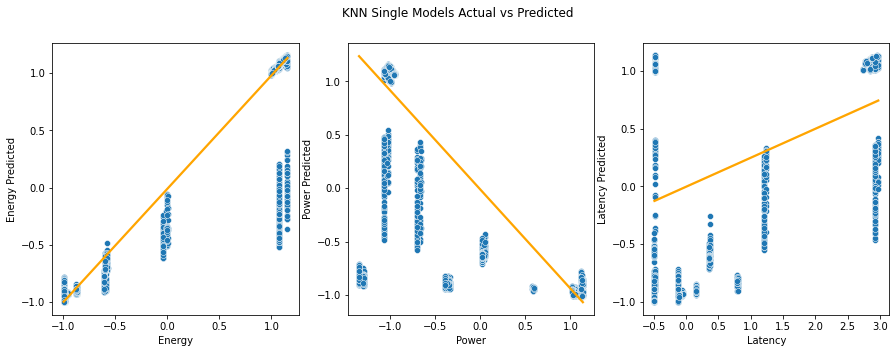

In [ ]:
# NODE Plot
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("KNN Single Models Actual vs Predicted")
plt.subplot(1,3,1)
ax0 = sns.scatterplot(x='Energy', y='Energy Predicted', data=NODE_single_target_evaluation_df)
sns.regplot(x='Energy', y='Energy Predicted',
            scatter=False, data=NODE_single_target_evaluation_df,
            ax=ax0, color="orange")

plt.subplot(1,3,2)
ax1 = sns.scatterplot(x='Power', y='Power Predicted', data=NODE_single_target_evaluation_df)
sns.regplot(x='Power', y='Power Predicted',
            scatter=False, data=NODE_single_target_evaluation_df,
            ax=ax1, color="orange")

plt.subplot(1,3,3)
ax2 = sns.scatterplot(x='Latency', y='Latency Predicted', data=NODE_single_target_evaluation_df)
sns.regplot(x='Latency', y='Latency Predicted',
            scatter=False, data=NODE_single_target_evaluation_df,
            ax=ax2, color="orange")
plt.show()

# Saving Models

In [ ]:
print(os.getcwd())

/content/drive/Shareddrives/Arch-gym/proxy_model


Save Linear Regression Model

In [ ]:
# Save Linear Regression Model
path = os.path.join(PROXY_MODEL_DIRECTORY, 'linear_regression_model')
pickle.dump(linear, open(path, 'wb'))

Save Multi-Target Random Forest Regression Model

In [ ]:
# Save Multi-Target Random Forest Regression Model
path = os.path.join(PROXY_MODEL_DIRECTORY, 'multitarget_rf_model')
pickle.dump(rf, open(path, 'wb'))

Save Single Target Random Forest Regression Models

In [ ]:
# Save Single Target Random Forest Regression Models
additional_info = '_ACO'
# Energy
path = os.path.join(PROXY_MODEL_DIRECTORY, 'energy_rf_model_'+str(data_sample_sizes_per_algorithm[sample_size])+additional_info+'.save')
pickle.dump(rf_energy, open(path, 'wb'))
# Power
path = os.path.join(PROXY_MODEL_DIRECTORY, 'power_rf_model_'+str(data_sample_sizes_per_algorithm[sample_size])+additional_info+'.save')
pickle.dump(rf_power, open(path, 'wb'))
# Latency
path = os.path.join(PROXY_MODEL_DIRECTORY, 'latency_rf_model_'+str(data_sample_sizes_per_algorithm[sample_size])+additional_info+'.save')
pickle.dump(rf_latency, open(path, 'wb'))

Save Single Target KNN Models

In [ ]:
# Save Single KNN Regression Models
# Energy
path = os.path.join(PROXY_MODEL_DIRECTORY, 'energy_KNN_model_250.save')
pickle.dump(KNN_regressor_energy, open(path, 'wb'))
# Power
path = os.path.join(PROXY_MODEL_DIRECTORY, 'power_KNN_model_250.save')
pickle.dump(KNN_regressor_power, open(path, 'wb'))
# Latency
path = os.path.join(PROXY_MODEL_DIRECTORY, 'latency_KNN_model_250.save')
pickle.dump(KNN_regressor_latency, open(path, 'wb'))

# Load Models

Save Single Target Random Forest Regression Models

In [ ]:
# Create path to model
energy_path = os.path.join(PROXY_MODEL_DIRECTORY, 'energy_rf_model_250')
power_path = os.path.join(PROXY_MODEL_DIRECTORY, 'power_rf_model_250')
latency_path = os.path.join(PROXY_MODEL_DIRECTORY, 'latency_rf_model_250')

# Load Models
rf_energy = pickle.load(open(energy_path, 'rb'))
rf_power = pickle.load(open(power_path, 'rb'))
rf_latency = pickle.load(open(latency_path, 'rb'))

# API Function

In [286]:
import os
import pickle
import joblib
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error
from scipy.special import inv_boxcox

def run_proxy_model(energy_model_name,
                    power_model_name,
                    latency_model_name,
                    actions,
                    numeric_data_transformer_name=None, 
                    target_data_transformer_name=None,
                    one_hot_encoder_name=None,
                    label_encoder_name_list=None, 
                    model_directory='./', 
                    transformer_directory='./', 
                    latency_lambda=None):
  '''Load models, transforms features, predicts energy/power/latency, 
      inverse transforms predictions, then returns prediction.
  
    Args:
      energy_model_name (str): file name of energy model 
      latency_model_name (str): file name of latency model
      power_model_name (str): file name of power model
      actions (pd.DataFrame): dataframe of features used to make a prediction
      numeric_data_transformer_name (str): file name holding numeric transformer data
      target_data_transformer_name (str): file name holding target transformer data
      one_hot_encoder_name (str): file name holding one hot encoder transformer data
      label_encoder_name_list (list): list holding file names holding label encoder
        transformer for each categorical feature. Must be passed in this order:
          0.) 'Arbiter' 1.) 'PagePolicy' 2.) 'RefreshPolicy' 3.) 'RespQueue' 4.) 'Scheduler' 5.) 'SchedulerBuffer'
      model_directory (str): directory name holding model files
      transformer_directory (str): directory name holding model data transformers
      latency_lambda (float): boxcox lambda value used to transform latency

    Returns:
      predicted: pd.DataFrame consisting of Energy, Power, and Latency columns
  '''
  # Set Categorical and Numerical Variables
  categorical_variables = ['Arbiter','PagePolicy','RefreshPolicy', 'RespQueue', 'Scheduler','SchedulerBuffer']
  numerical_variables = ['MaxActiveTransactions', 'RefreshMaxPostponed', 'RefreshMaxPulledin', 'RequestBufferSize']	

  # Create path to model
  energy_path = os.path.join(model_directory, energy_model_name)
  power_path = os.path.join(model_directory, power_model_name)
  latency_path = os.path.join(model_directory, latency_model_name)

  # Load Models
  energy_model = pickle.load(open(energy_path, 'rb'))
  power_model = pickle.load(open(power_path, 'rb'))
  latency_model = pickle.load(open(latency_path, 'rb'))

  #Categorical Data
  assert (one_hot_encoder_name is not None) or (label_encoder_name_list is not None), 'Must pass in Categorical Data Encoder File'
  if one_hot_encoder_name is not None:
    # Load One Hot Encoder
    encoding_path = os.path.join(transformer_directory, one_hot_encoder_name)
    enc = pickle.load(open(encoding_path, 'rb'))
    # One Hot Encode Categorical Variables
    X_categorical_data = enc.transform(actions[categorical_variables]).toarray()
    X_categorical_data = pd.DataFrame(X_categorical_data)
  elif label_encoder_name_list is not None: 
    X_categorical_data = pd.DataFrame()
    for label_encoder_name, categorical_variable in zip(label_encoder_name_list, categorical_variables):
      # Load Label Encoder
      encoding_path = os.path.join(transformer_directory, label_encoder_name) 
      enc = pickle.load(open(encoding_path, 'rb'))
      # Label Encode Categorical Variable
      encoded_categorical_data = enc.transform(actions[categorical_variable])
      # Add label encoded column to categorical df
      X_categorical_data[categorical_variable] = encoded_categorical_data

  # Transform Numerical Data
  if not numeric_data_transformer_name == None:
    # Get Transformer Path
    numerical_data_transformer = os.path.join(transformer_directory, numeric_data_transformer_name)
    # Load Numerical Transformer
    standard_scaler_numerical_transformer = joblib.load(numerical_data_transformer)
    # Transform Numberical Features
    X_numerical_data = pd.DataFrame(standard_scaler_numerical_transformer.transform(actions[numerical_variables]), columns=[numerical_variables])
  else:
    X_numerical_data = actions[numerical_variables]
  
  # Join Numerical and Categorical Features
  X = X_numerical_data.join(X_categorical_data)

  # Predict Energy
  energy = energy_model.predict(X)
  # Predict Power
  power = power_model.predict(X)
  # Predict Latency
  latency = latency_model.predict(X)

  # Predictions
  predicted = pd.DataFrame({'Energy': energy, 'Power': power, 'Latency': latency})

  # Inverse Transform Prediction 
  if not target_data_transformer_name == None:
    # Get Transformer Path
    target_data_transformer = os.path.join(transformer_directory, target_data_transformer_name)
    # Load Numerical Transformer
    standard_scaler_target_transformer = joblib.load(target_data_transformer)
    # Transform Numberical Features
    predicted = standard_scaler_target_transformer.inverse_transform(predicted)
    predicted = pd.DataFrame(predicted, columns=['Energy', 'Power', 'Latency'])

  # Inverse Boxcox Transform Latency
  if not latency_lambda == None:
    predicted['Latency'] = inv_boxcox(predicted['Latency'], latency_lambda).tolist()

  return predicted

Test API Function

In [288]:
example_df_X = df.head(n=100)
example_df_y = df.head(n=100)[['Energy','Power','Latency']]

In [289]:
example_y_pred = run_proxy_model('energy_rf_model_250000.save',
                    'power_rf_model_250000.save',
                    'latency_rf_model_250000.save',
                    example_df_X,
                    numeric_data_transformer_name='standard_scaler_numerical_variables_401125_all_samples.save', 
                    target_data_transformer_name='standard_scaler_targets_401125_all_samples.save',
                    label_encoder_name_list = ['Arbiterlabel_encoder.pkl','PagePolicylabel_encoder.pkl',
                                               'RefreshPolicylabel_encoder.pkl', 'RespQueuelabel_encoder.pkl',
                                               'Schedulerlabel_encoder.pkl','SchedulerBufferlabel_encoder.pkl'],
                    model_directory='saved_proxy_models', 
                    transformer_directory='saved_proxy_models', 
                    latency_lambda=-0.08756824731385078)

print('Energy Error:', mean_squared_error(example_df_y['Energy'], example_y_pred['Energy']))
print('Power Error:', mean_squared_error(example_df_y['Power'], example_y_pred['Power']))
print('Latency Error:', mean_squared_error(example_df_y['Latency'], example_y_pred['Latency']))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature 

Energy Error: 3.928730329402402e-11
Power Error: 8.720364269152523e-30
Latency Error: 2.917096246072224e-29


In [290]:
example_df_X.to_csv('Example_DRAMSys_Proxy_Model_Data.csv', index=False)